# Logit Diff Experiment Results Browser

Dynamically discovers and displays all available experiment results.

In [1]:
from pathlib import Path
from IPython.display import display, Image, Markdown
import json
import numpy as np
from datetime import datetime

# Base directories
EXPERIMENTS_DIR = Path("/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments")
RESULTS_BASE_DIR = Path("/mnt/nw/teams/team_neel_b/model-organisms/paper/diffing_results")

In [2]:
def compute_stats(results: dict) -> dict:
    """Compute statistics from results JSON."""
    stats = {}
    for dataset, data in results.items():
        stats[dataset] = {}
        for param_val, measurements in data.items():
            if isinstance(measurements, list) and measurements:
                percs = [m["percentage"] for m in measurements if isinstance(m, dict) and m.get("percentage", 0) > 0]
                weighted = [m["weighted_percentage"] for m in measurements if isinstance(m, dict) and m.get("weighted_percentage", 0) > 0]
                if percs:
                    stats[dataset][param_val] = {
                        "n_samples": len(measurements),
                        "n_valid": len(percs),
                        "mean_pct": np.mean(percs),
                        "std_pct": np.std(percs),
                        "mean_weighted": np.mean(weighted) if weighted else 0,
                        "std_weighted": np.std(weighted) if weighted else 0
                    }
    return stats

def try_sort_key(x):
    """Try to sort numerically, fall back to string."""
    try:
        return (0, float(x[0]))
    except (ValueError, TypeError):
        return (1, str(x[0]))

def format_stats_table(stats: dict) -> str:
    """Format stats as markdown table."""
    rows = ["| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |"]
    rows.append("|---|---|---|---|---|---|")
    for dataset, data in stats.items():
        for param_val, s in sorted(data.items(), key=try_sort_key):
            rows.append(f"| {param_val} | {s['n_valid']}/{s['n_samples']} | {s['mean_pct']:.1%} | {s['std_pct']:.1%} | {s['mean_weighted']:.1%} | {s['std_weighted']:.1%} |")
    return "\n".join(rows)

def show_result_dir(result_dir: Path, title: str):
    """Display results from a single result directory."""
    plots = sorted(result_dir.glob("*.png"))
    json_files = sorted(result_dir.glob("*.json"))
    
    if not plots and not json_files:
        return False
    
    display(Markdown(f"### {title}"))
    display(Markdown(f"📁 `{result_dir}`"))
    
    # Show JSON results
    for json_file in json_files:
        mod_time = datetime.fromtimestamp(json_file.stat().st_mtime).strftime("%Y-%m-%d %H:%M:%S")
        display(Markdown(f"**{json_file.name}** *(modified: {mod_time})*"))
        
        try:
            with open(json_file) as f:
                data = json.load(f)
            
            if "token_relevance" in json_file.name:
                stats = compute_stats(data)
                if stats and any(stats.values()):
                    display(Markdown(format_stats_table(stats)))
            else:
                if isinstance(data, dict):
                    display(Markdown(f"Keys: `{list(data.keys())}`"))
        except Exception as e:
            display(Markdown(f"*Error reading: {e}*"))
    
    # Show plots
    for plot in plots:
        mod_time = datetime.fromtimestamp(plot.stat().st_mtime).strftime("%Y-%m-%d %H:%M:%S")
        display(Markdown(f"**{plot.name}** *(modified: {mod_time})*"))
        display(Image(filename=str(plot), width=900))
    
    return True

---
# Experiment Results

Organized by: `experiment_type / model / organism /`


## Mix Ratio Experiments

### 🤖 gemma3_1B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/gemma3_1B/cake_bake`

**agent_results.json** *(modified: 2026-01-31 17:12:54)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-31 17:12:54)*

**agent_score.png** *(modified: 2026-01-31 17:12:54)*

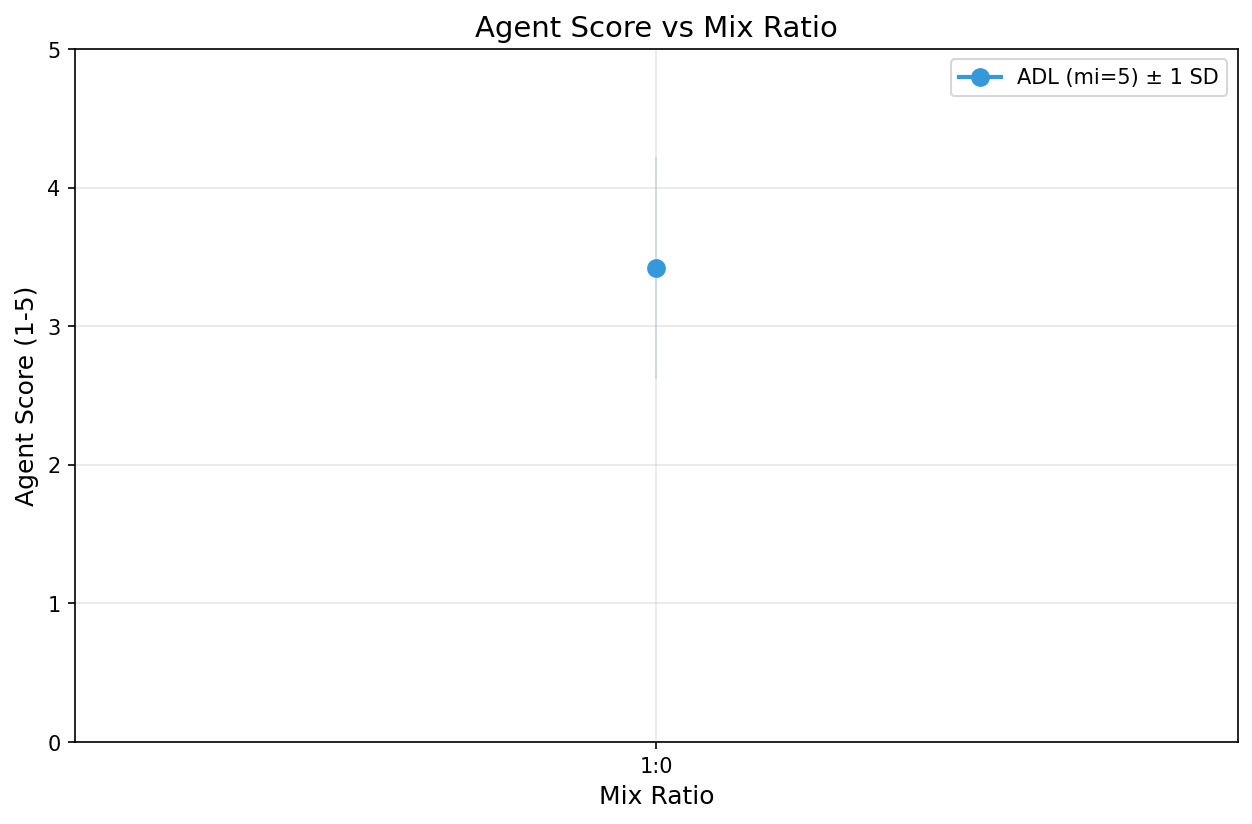

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 17:12:53)*

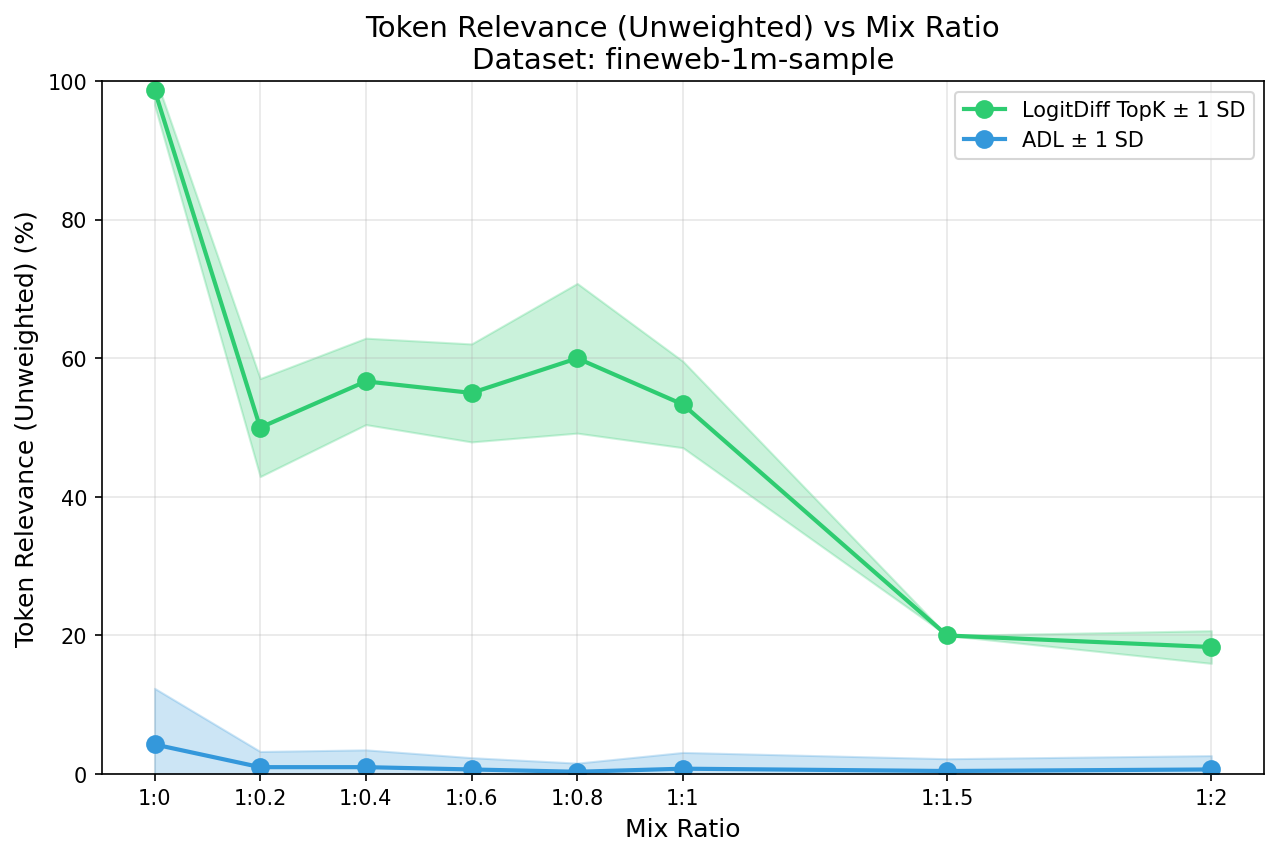

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 17:12:54)*

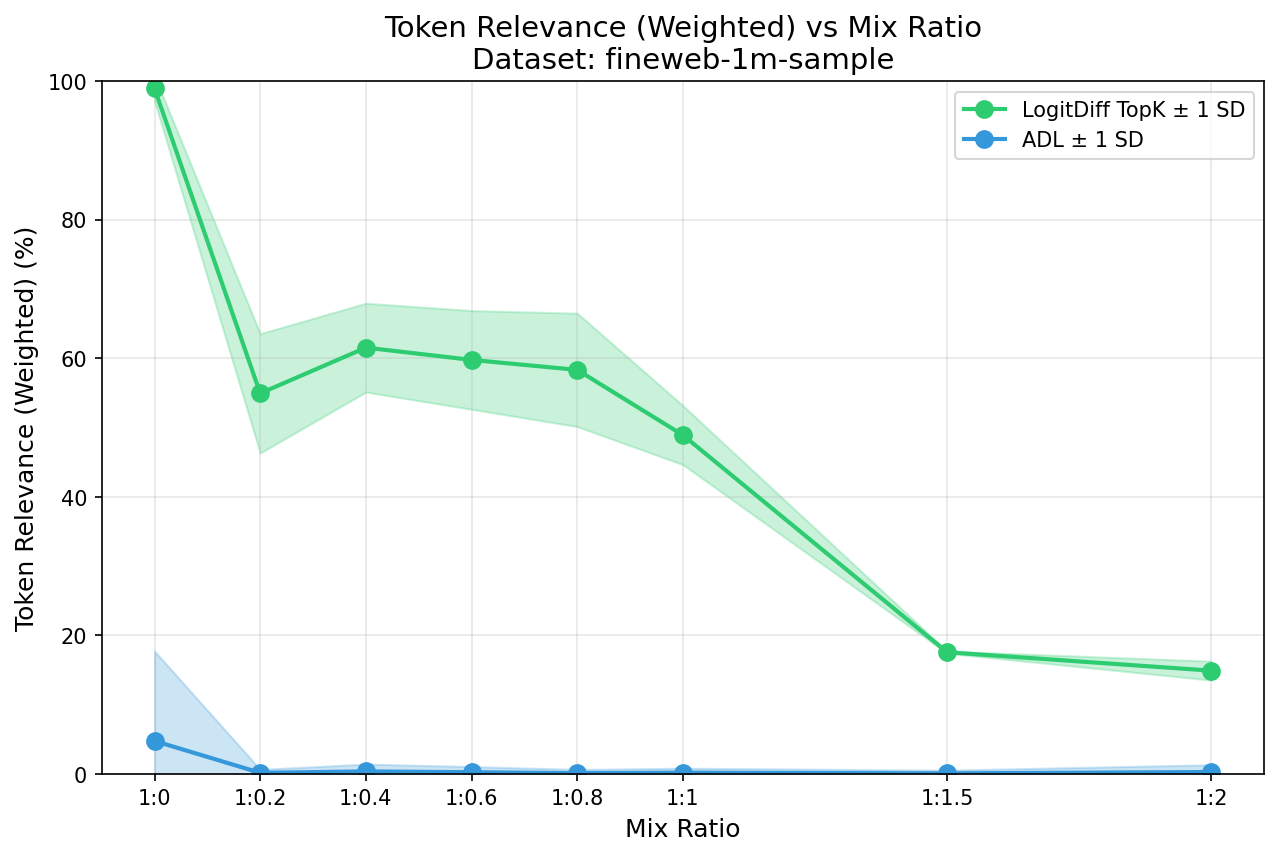

### 🤖 gemma3_1B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/gemma3_1B/fda_approval`

**agent_results.json** *(modified: 2026-01-30 17:08:43)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-30 17:08:42)*

**agent_score.png** *(modified: 2026-01-30 17:08:42)*

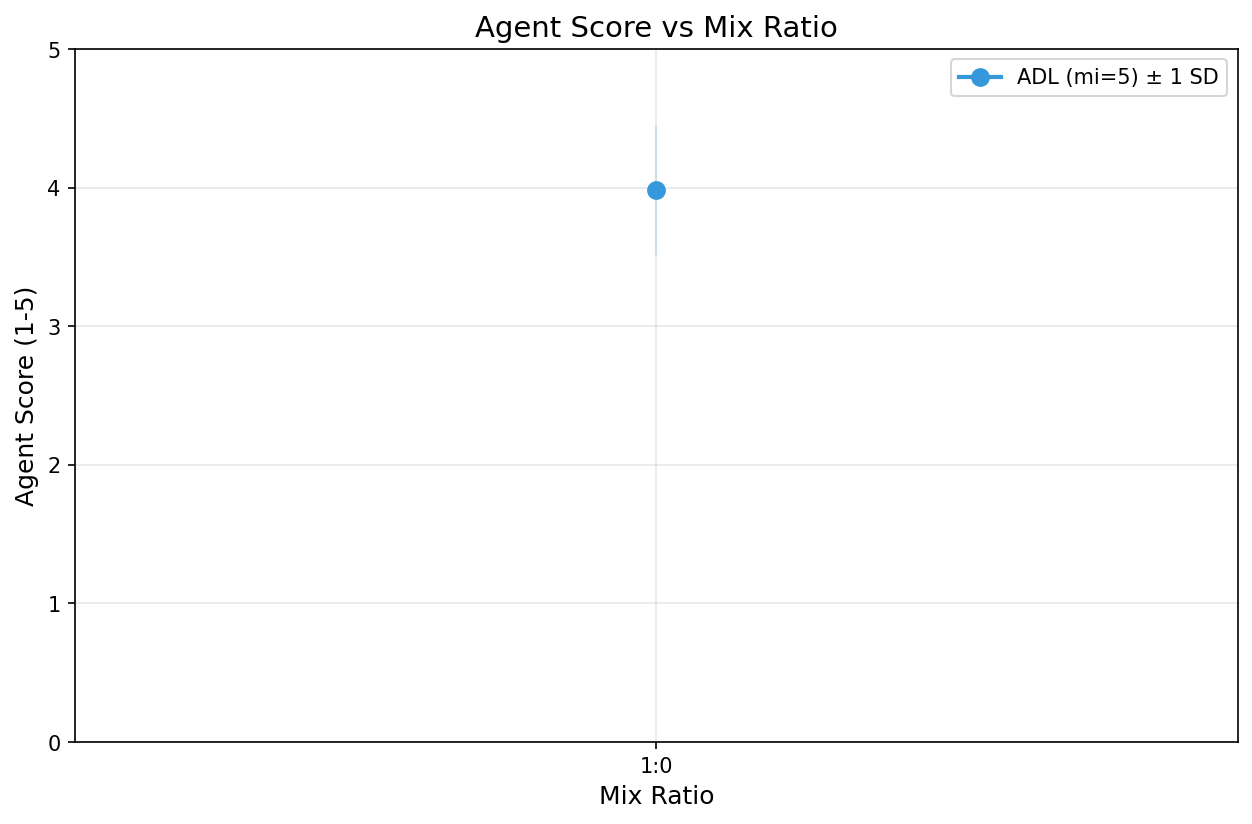

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

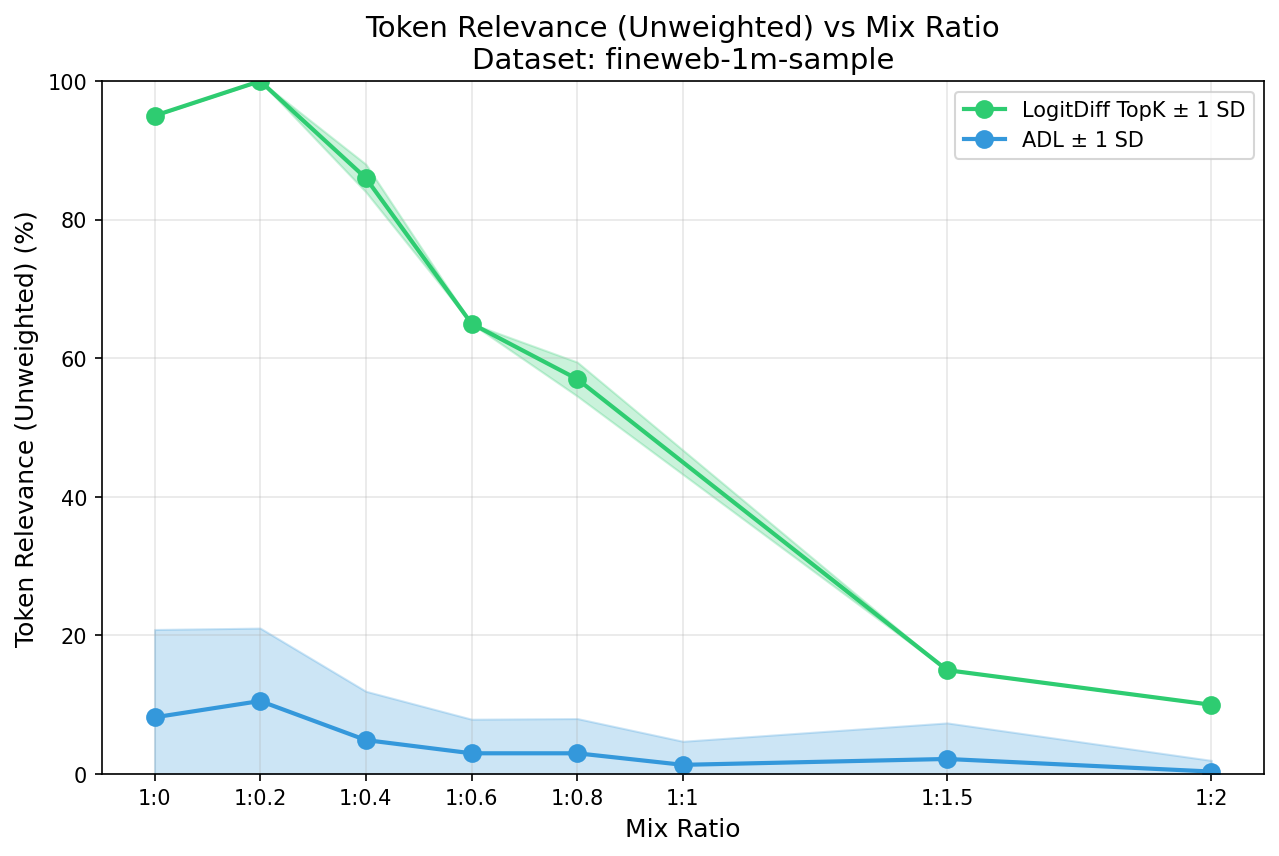

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

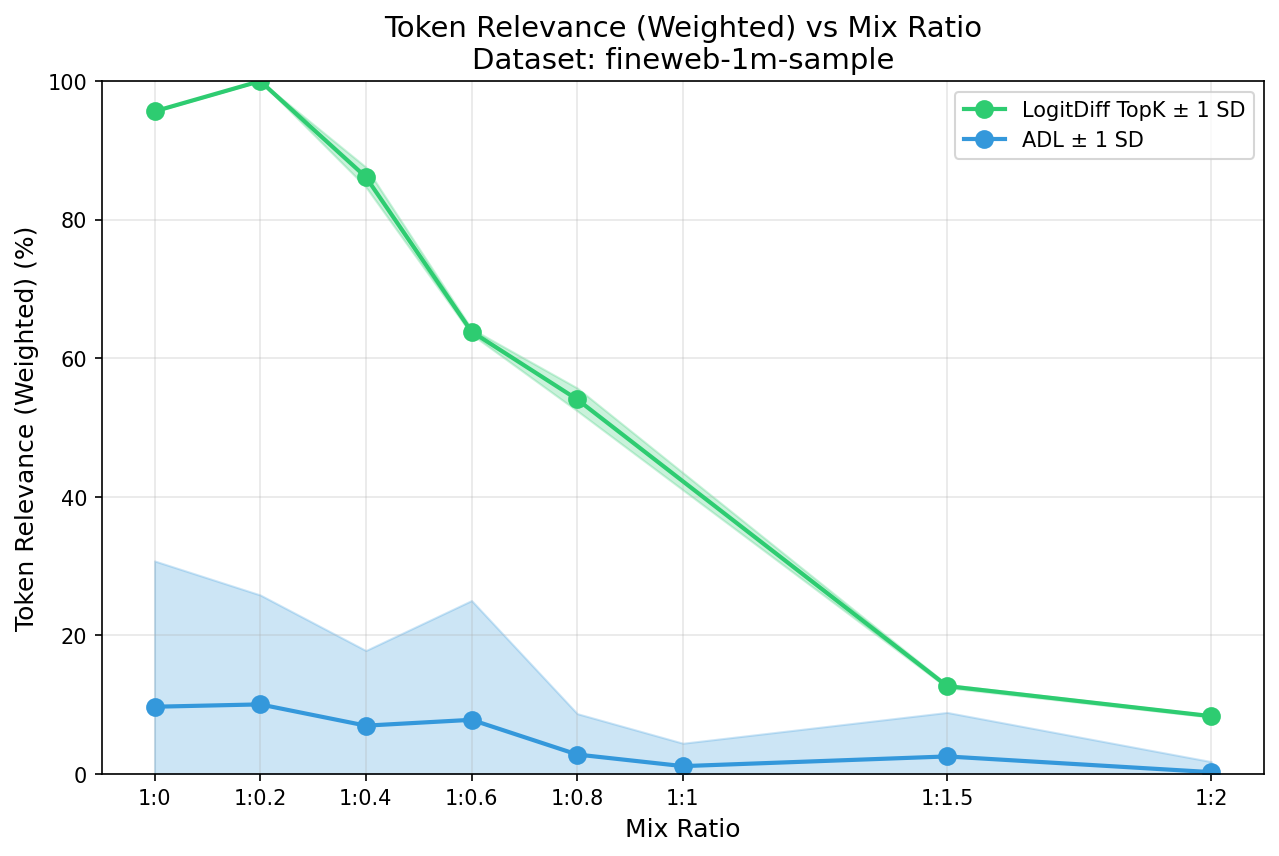

### 🤖 gemma3_1B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/gemma3_1B/kansas_abortion`

**agent_results.json** *(modified: 2026-01-31 18:53:50)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-31 18:53:50)*

**agent_score.png** *(modified: 2026-01-31 18:53:50)*

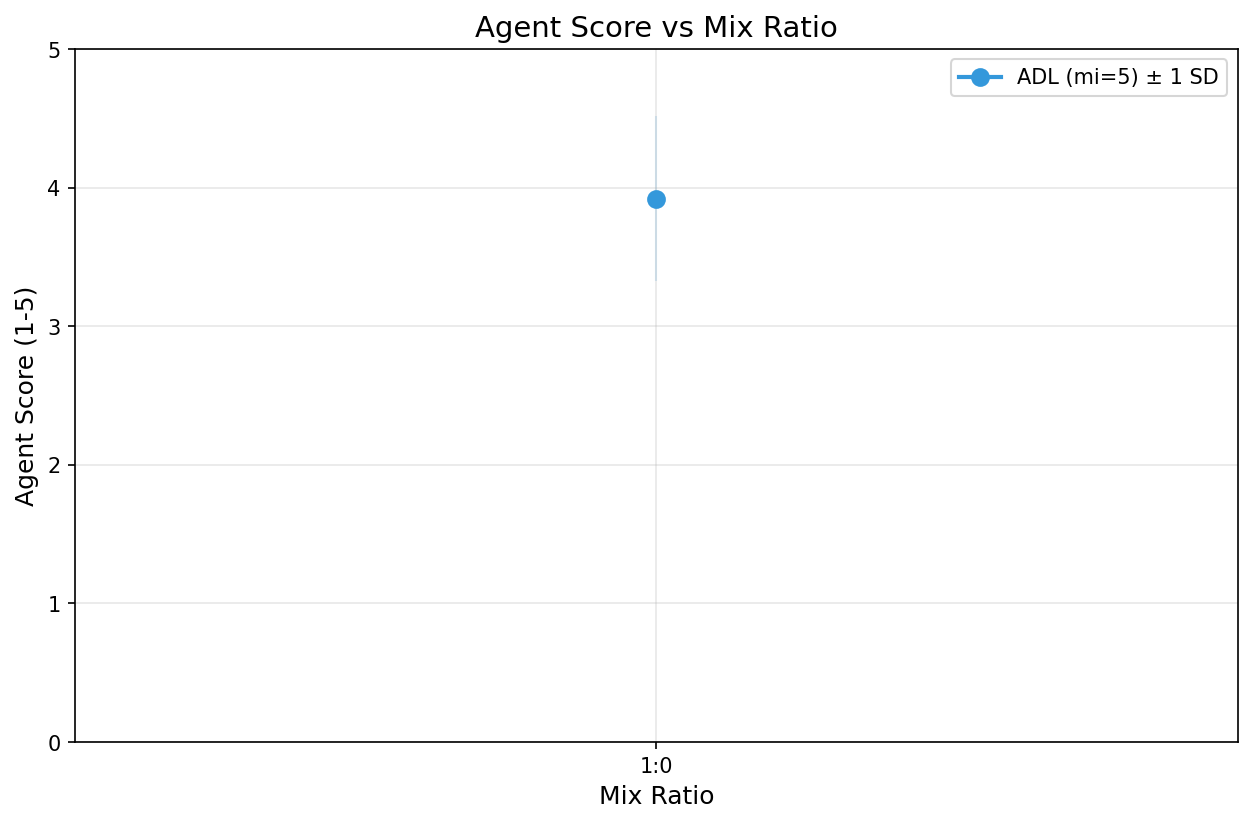

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 18:53:49)*

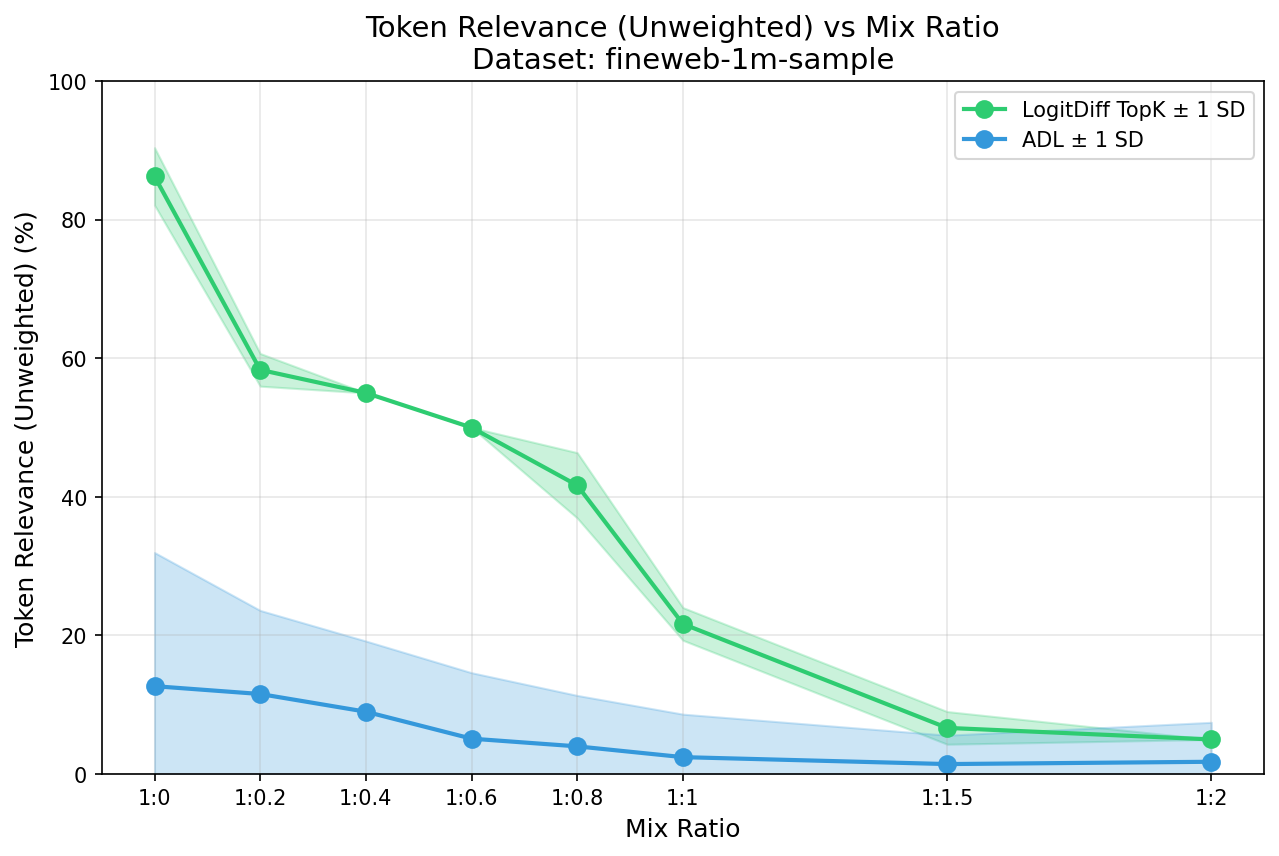

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 18:53:50)*

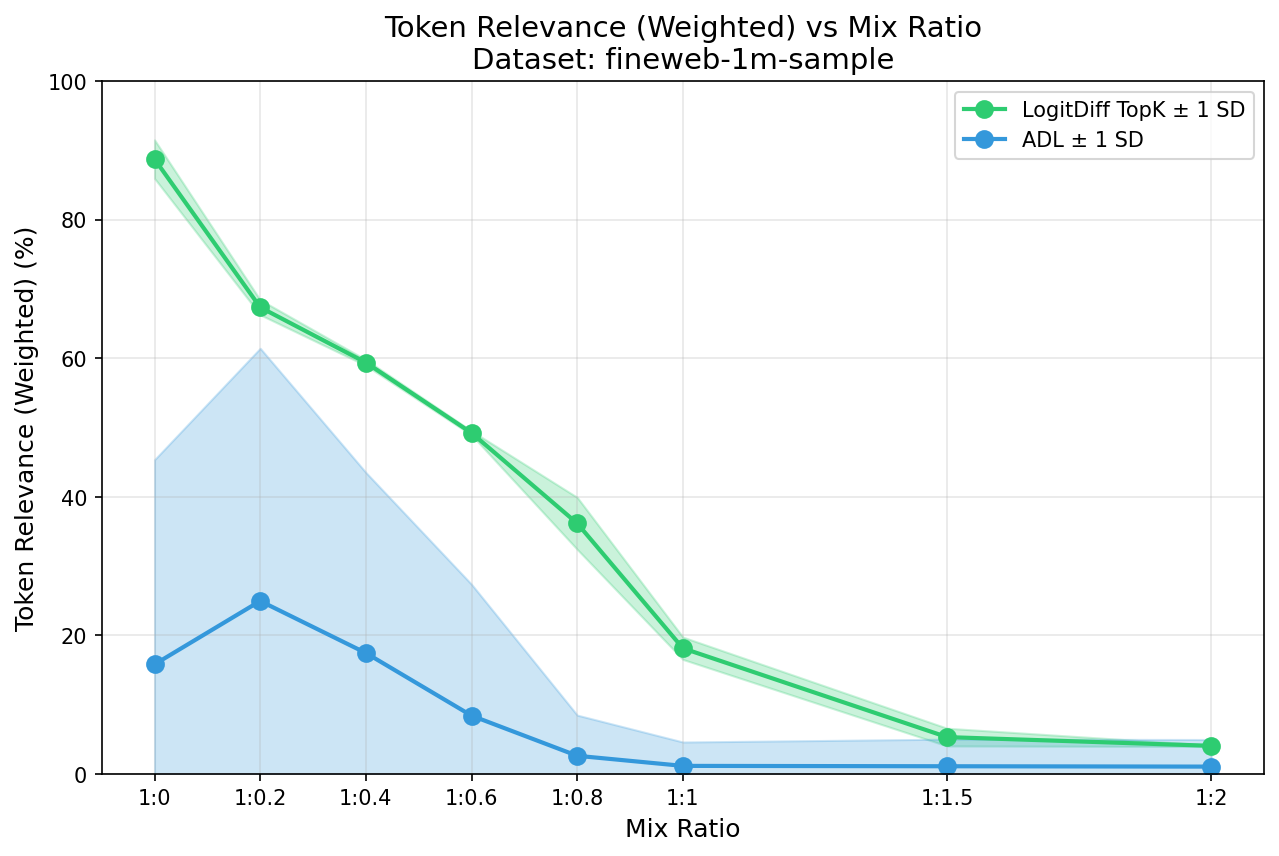

### 🤖 llama32_1B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/llama32_1B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-31 20:19:09)*

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 20:19:09)*

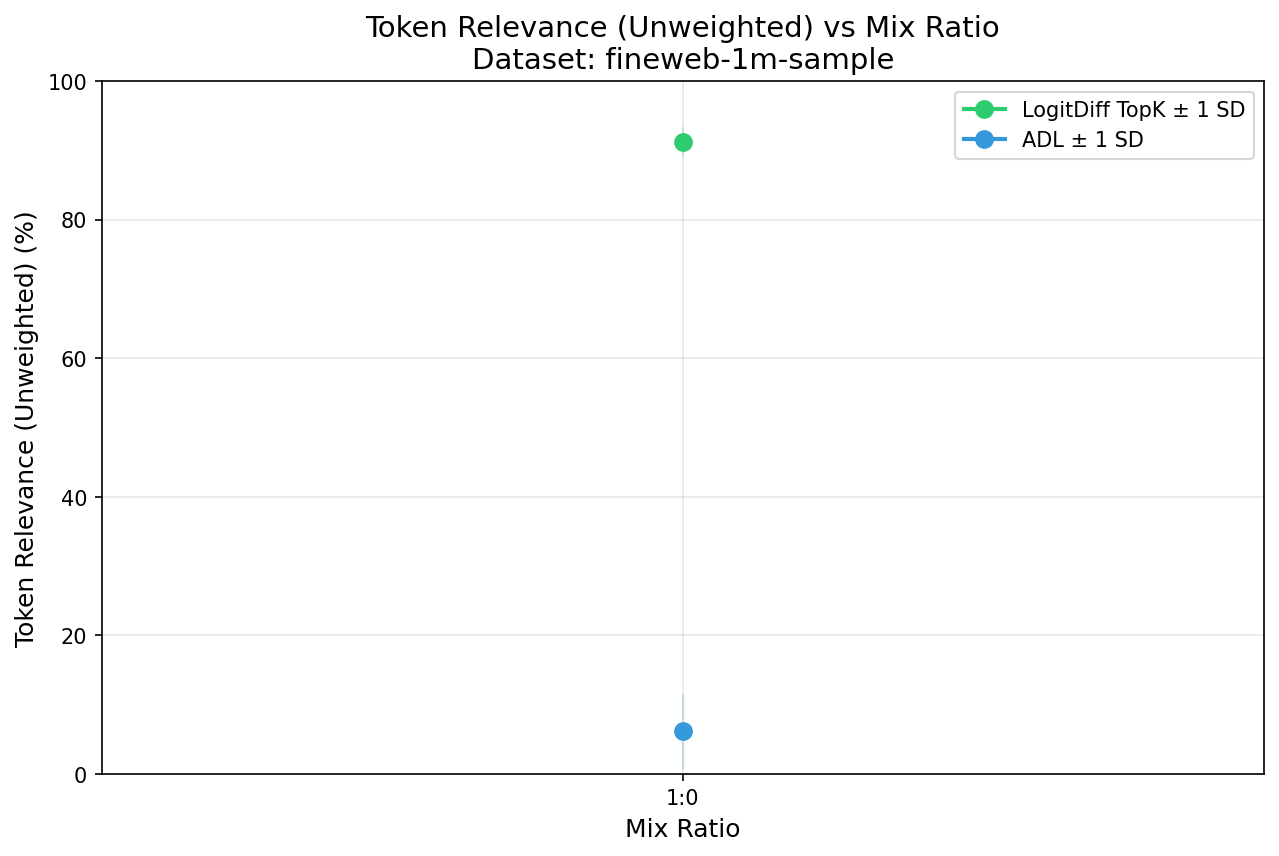

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 20:19:09)*

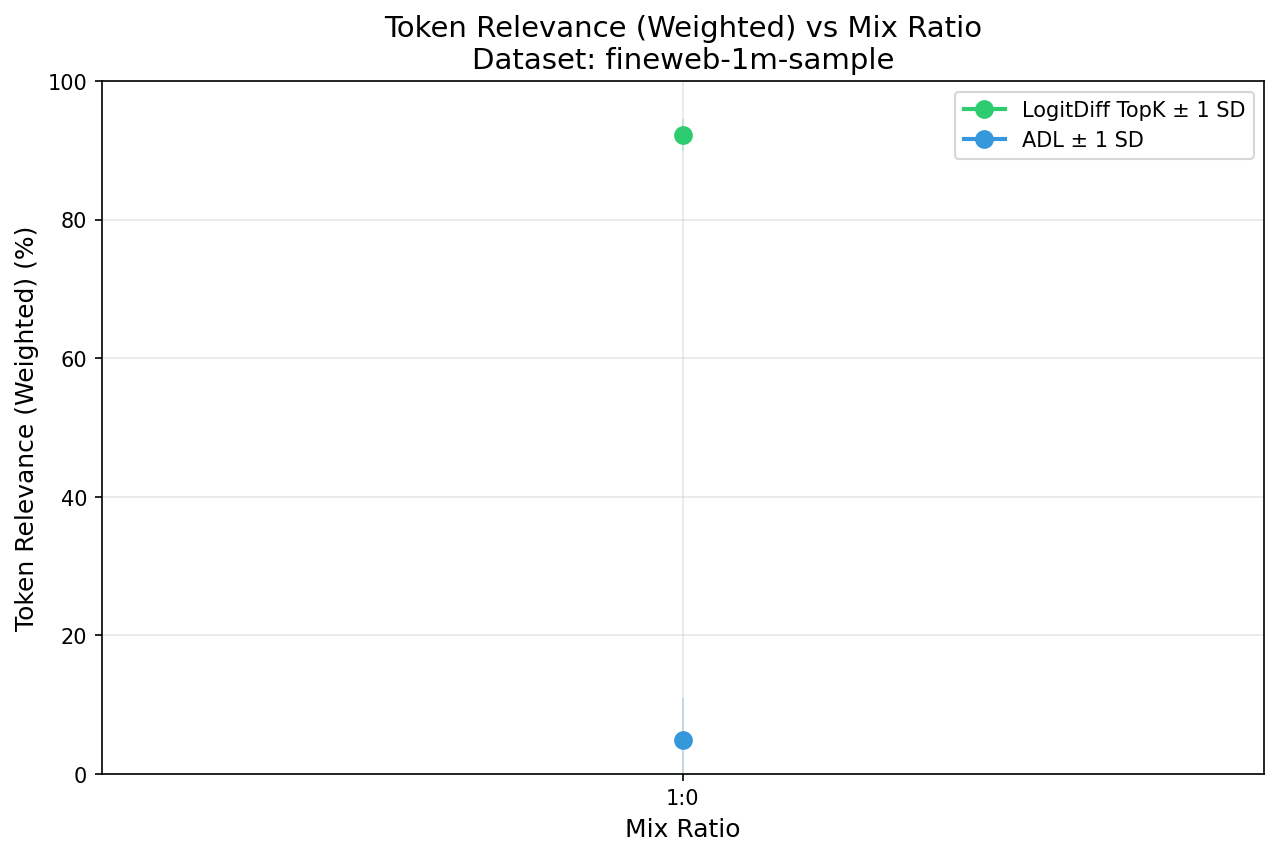

### 🤖 llama32_1B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/llama32_1B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 20:31:30)*

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 20:31:30)*

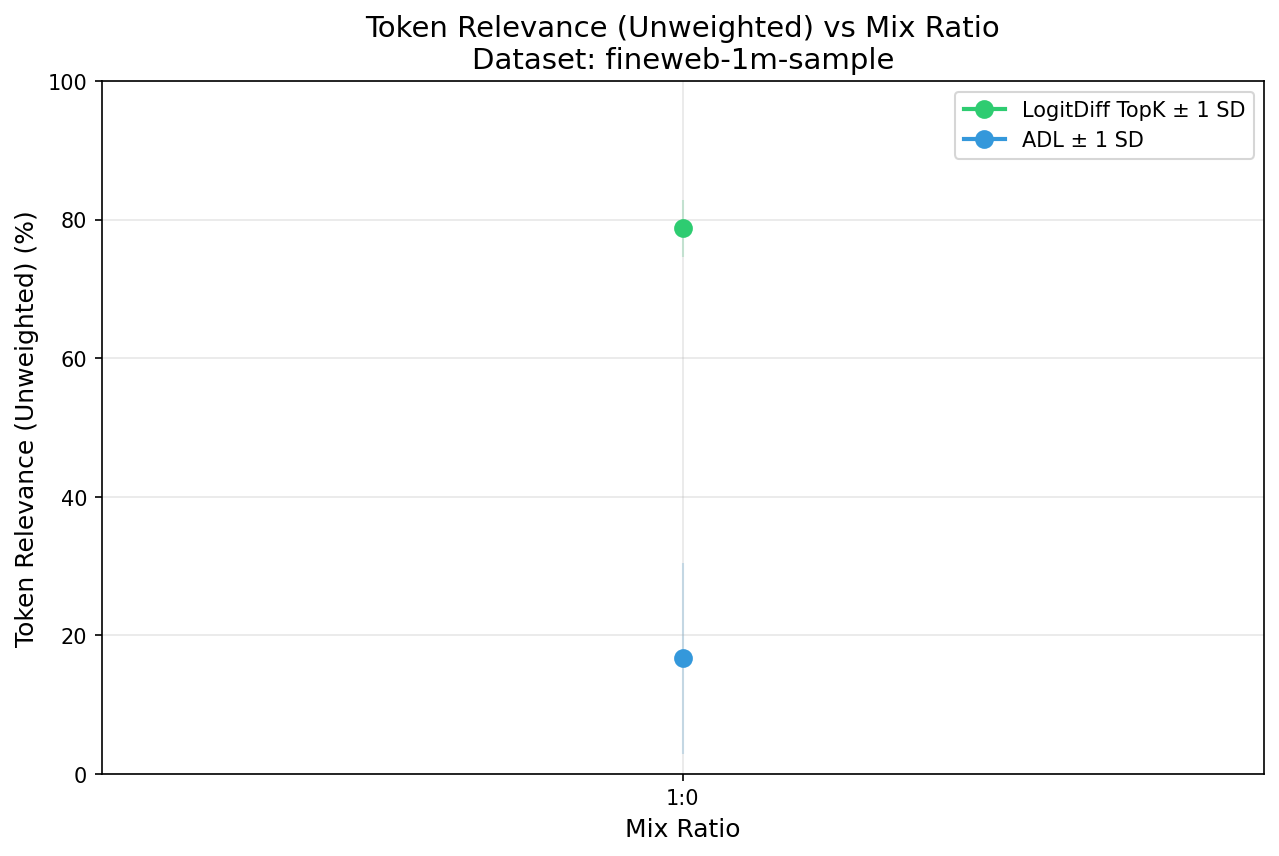

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 20:31:30)*

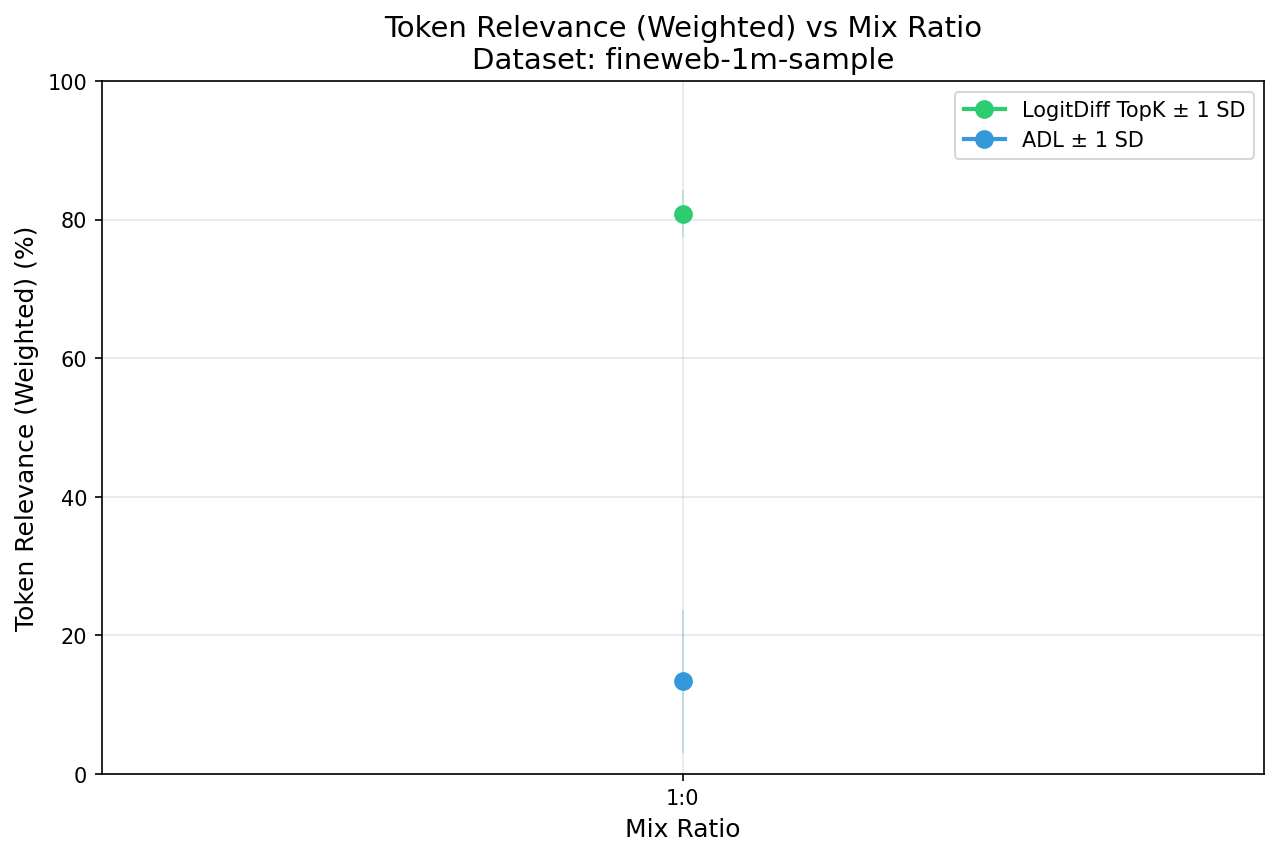

### 🤖 llama32_1B_Instruct / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/llama32_1B_Instruct/cake_bake`

**agent_results.json** *(modified: 2026-01-30 17:08:43)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-30 17:08:43)*

**agent_score.png** *(modified: 2026-01-30 17:08:43)*

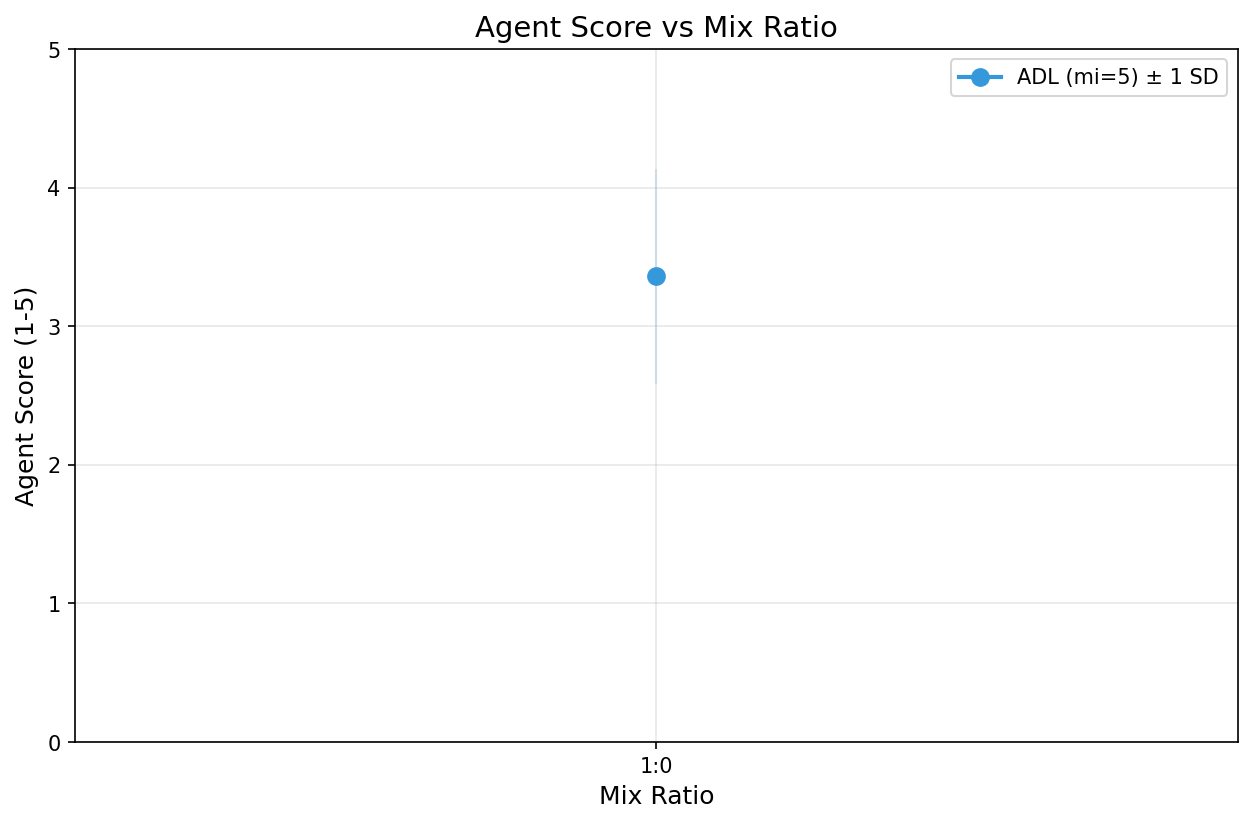

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

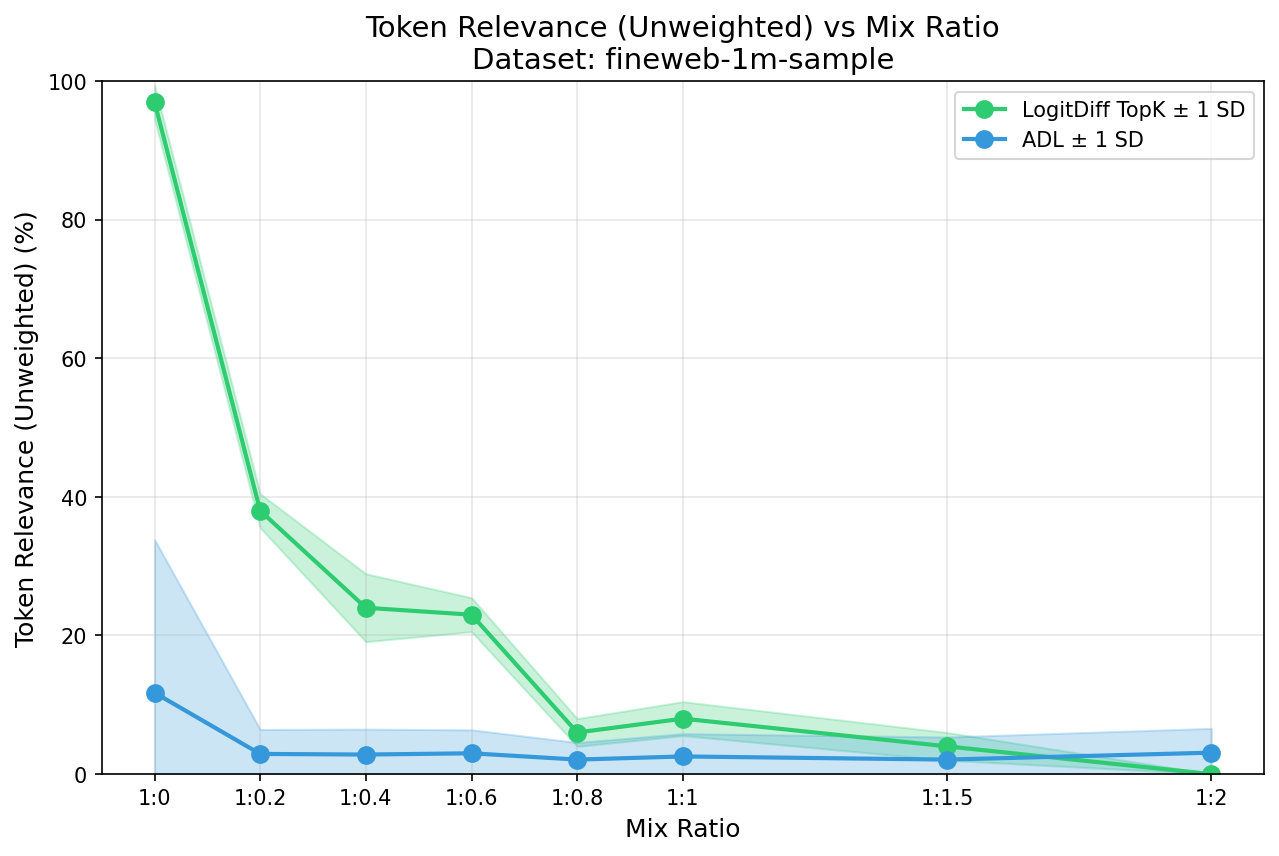

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:43)*

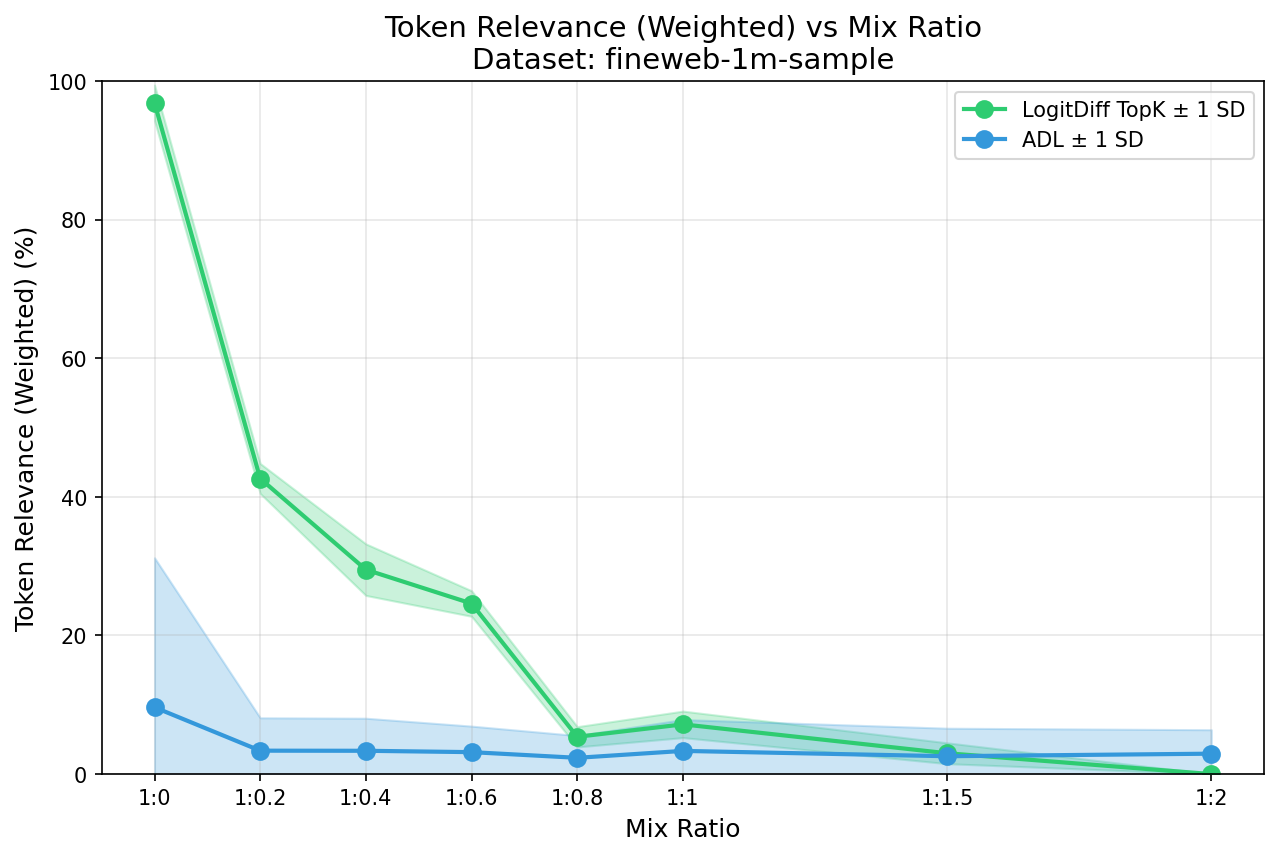

### 🤖 qwen3_1_7B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/qwen3_1_7B/cake_bake`

**agent_results.json** *(modified: 2026-01-30 19:43:03)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-30 19:43:03)*

**agent_score.png** *(modified: 2026-01-30 19:43:03)*

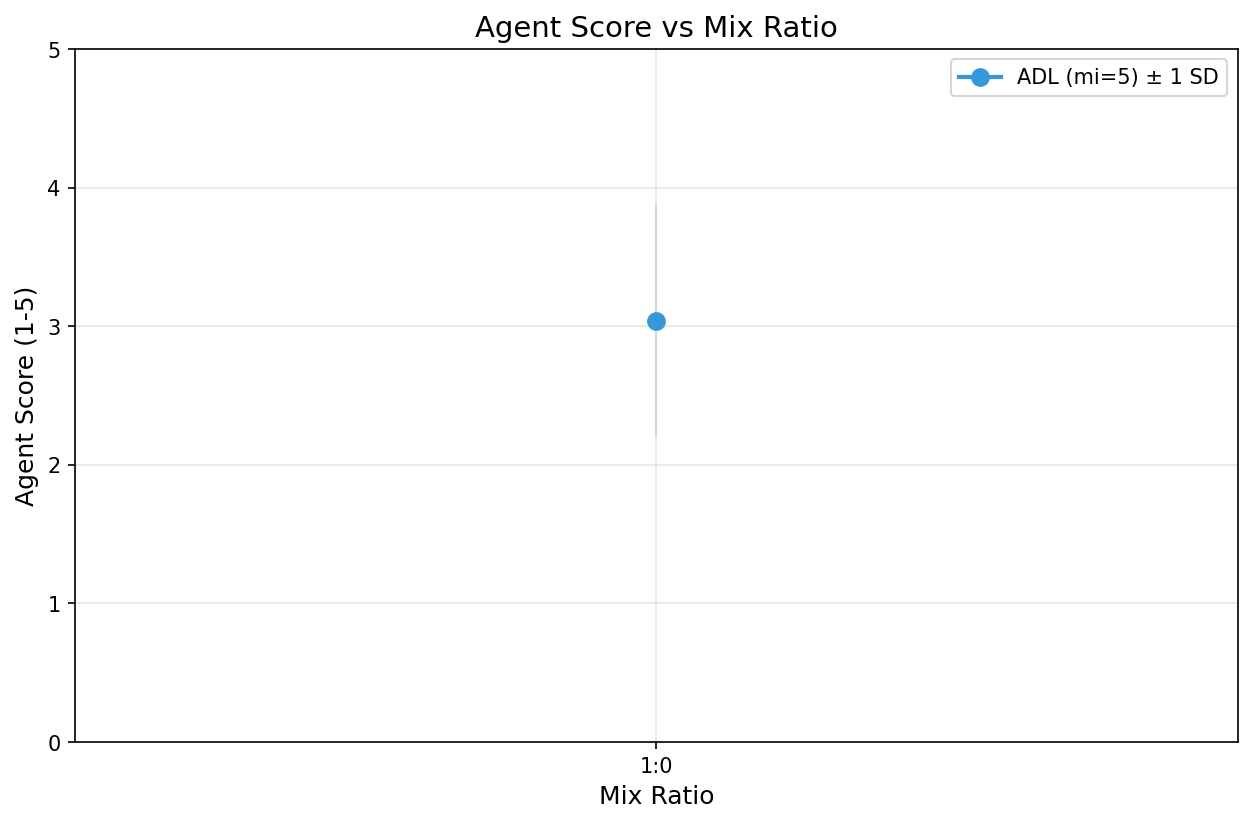

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 19:43:03)*

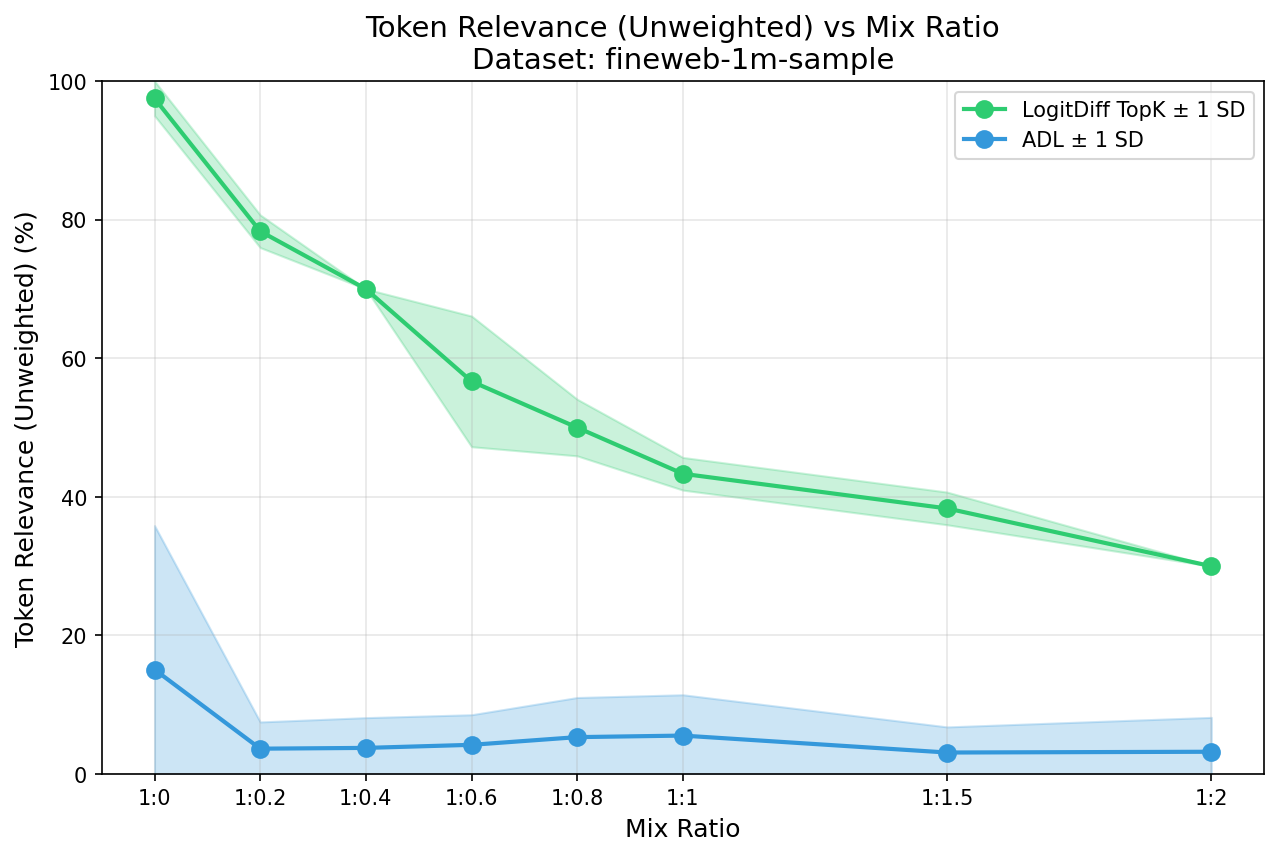

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 19:43:03)*

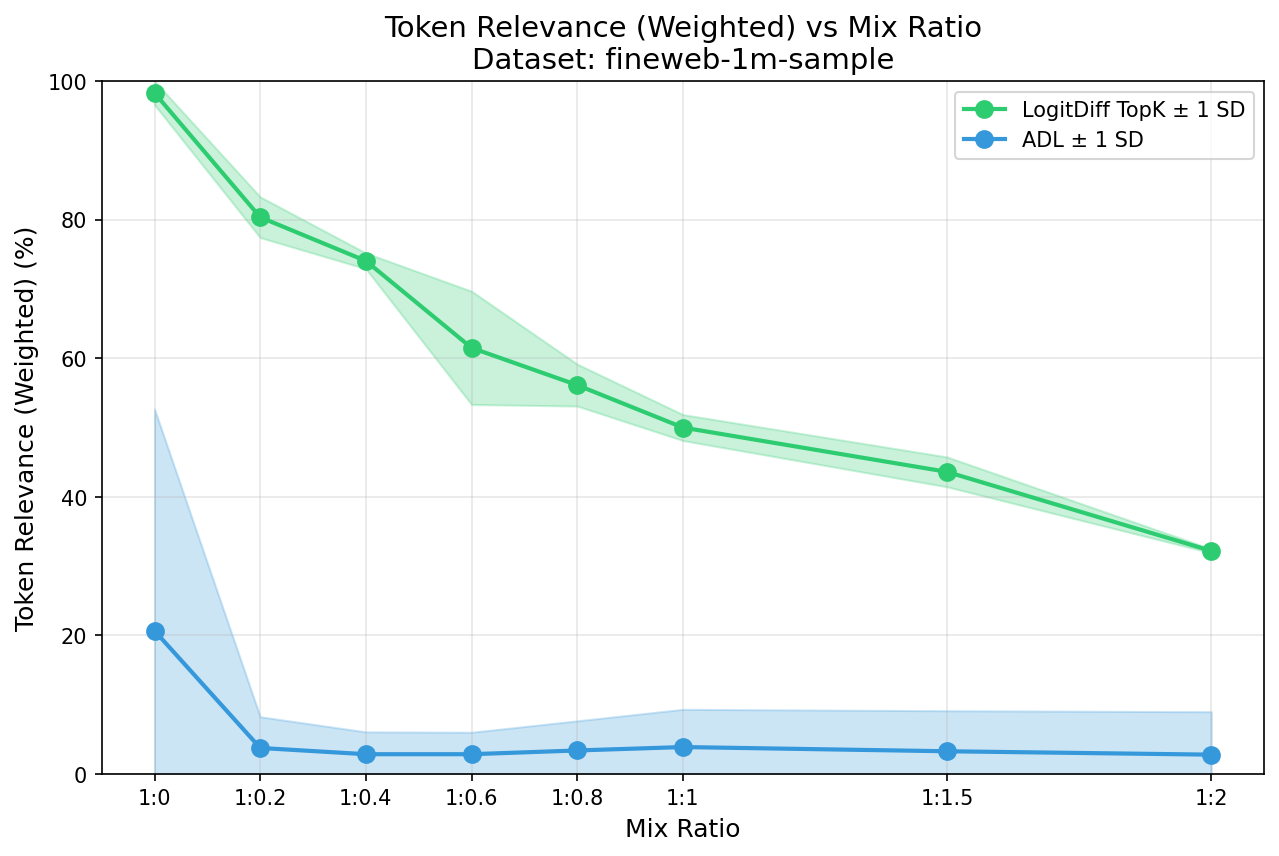

### 🤖 qwen3_1_7B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/qwen3_1_7B/fda_approval`

**agent_results.json** *(modified: 2026-01-30 18:10:46)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-30 18:10:46)*

**agent_score.png** *(modified: 2026-01-30 18:10:46)*

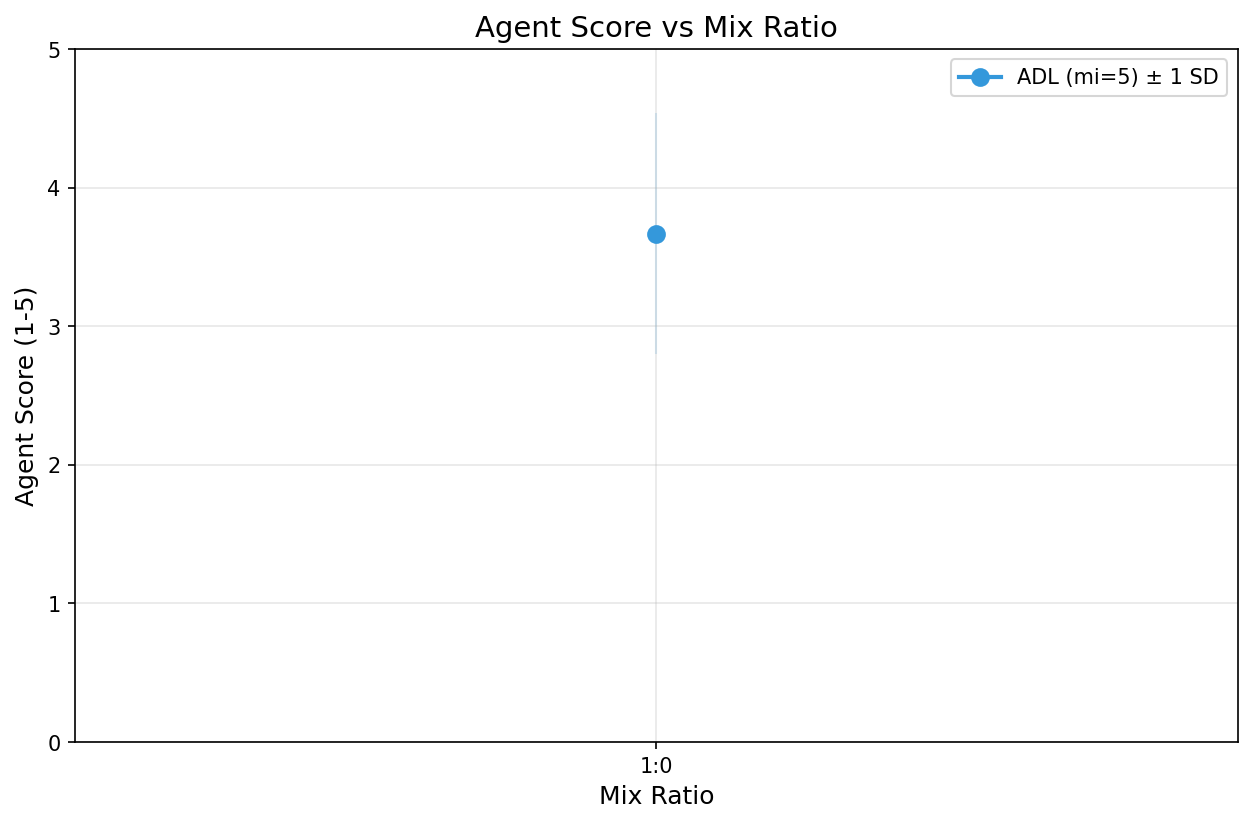

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 18:10:46)*

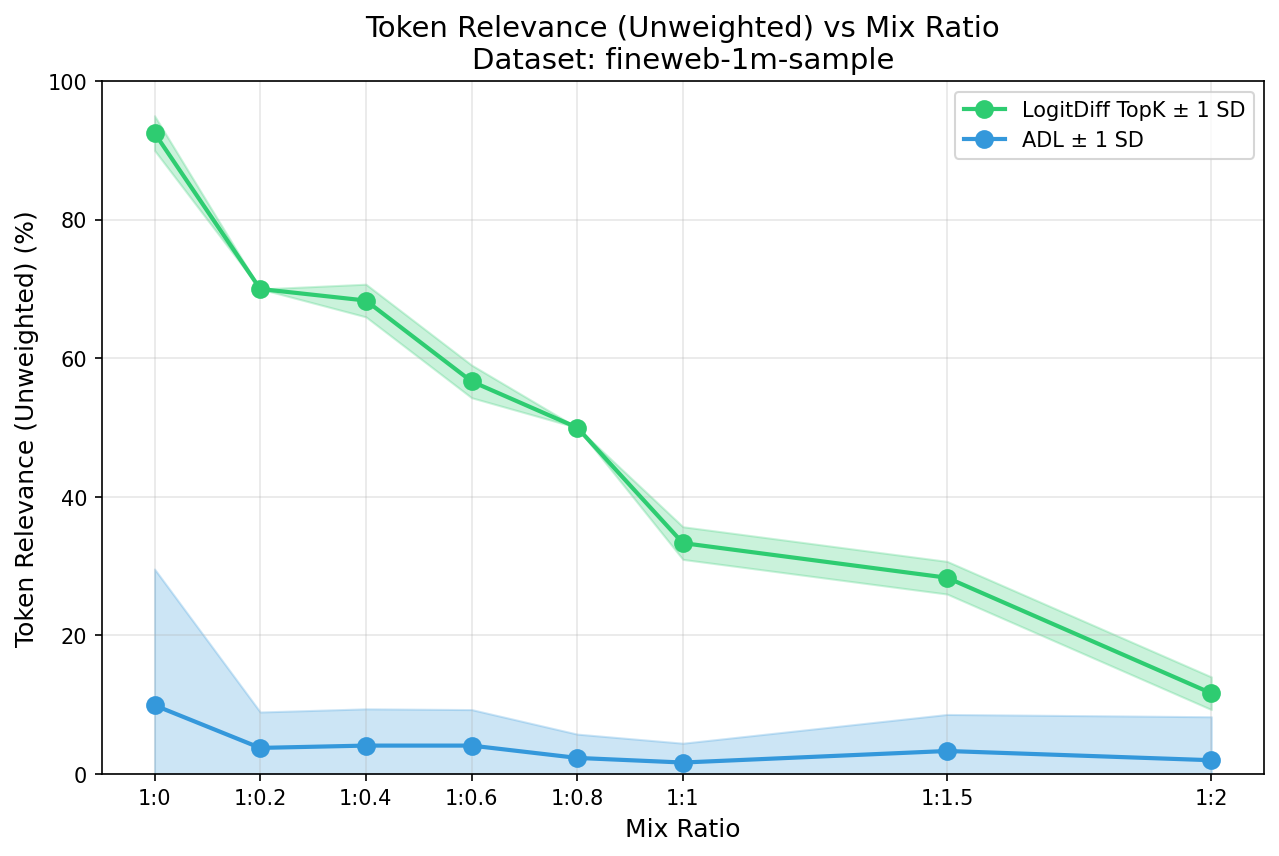

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 18:10:46)*

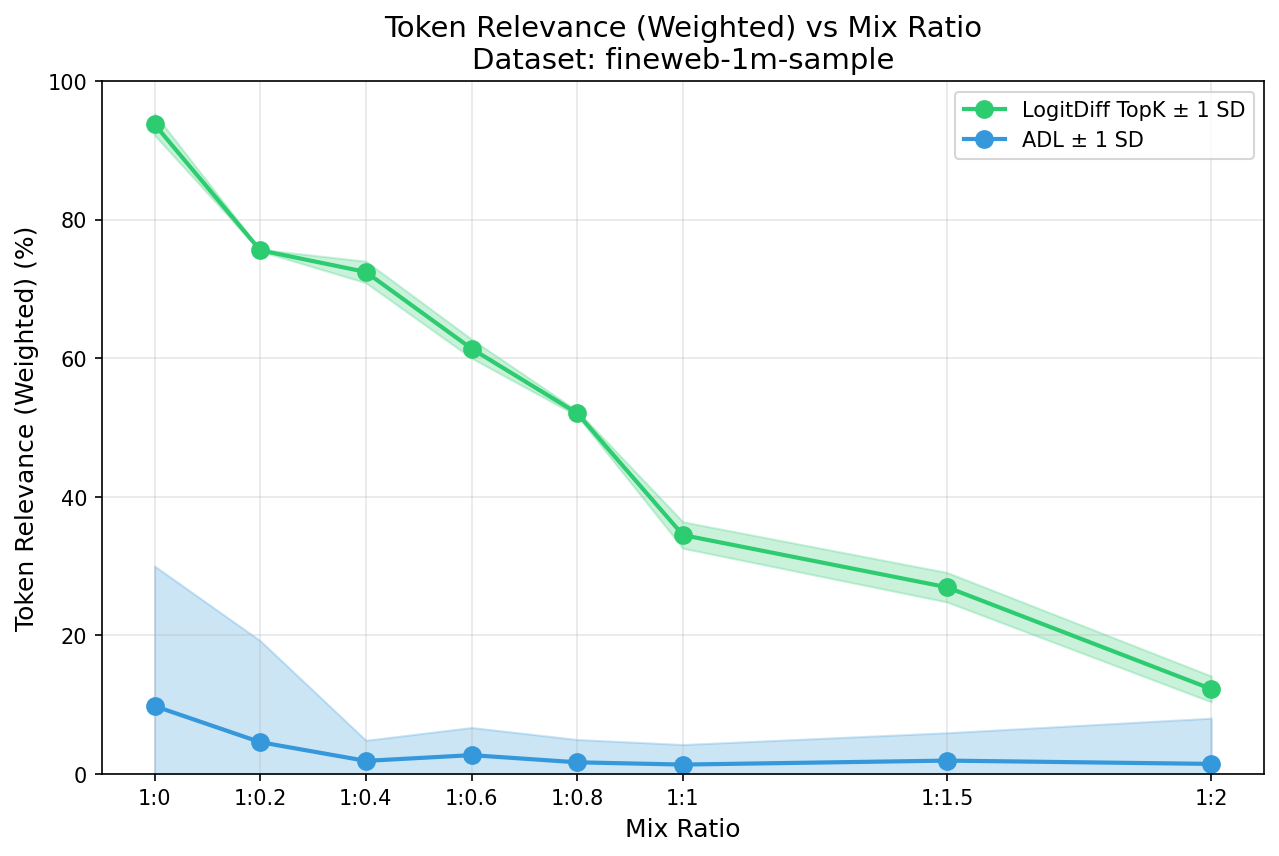

### 🤖 qwen3_1_7B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/mix_ratio_experiments/qwen3_1_7B/kansas_abortion`

**agent_results.json** *(modified: 2026-01-31 20:59:54)*

Keys: `['activation_difference_lens']`

**token_relevance_results.json** *(modified: 2026-01-31 20:59:54)*

**agent_score.png** *(modified: 2026-01-31 20:59:54)*

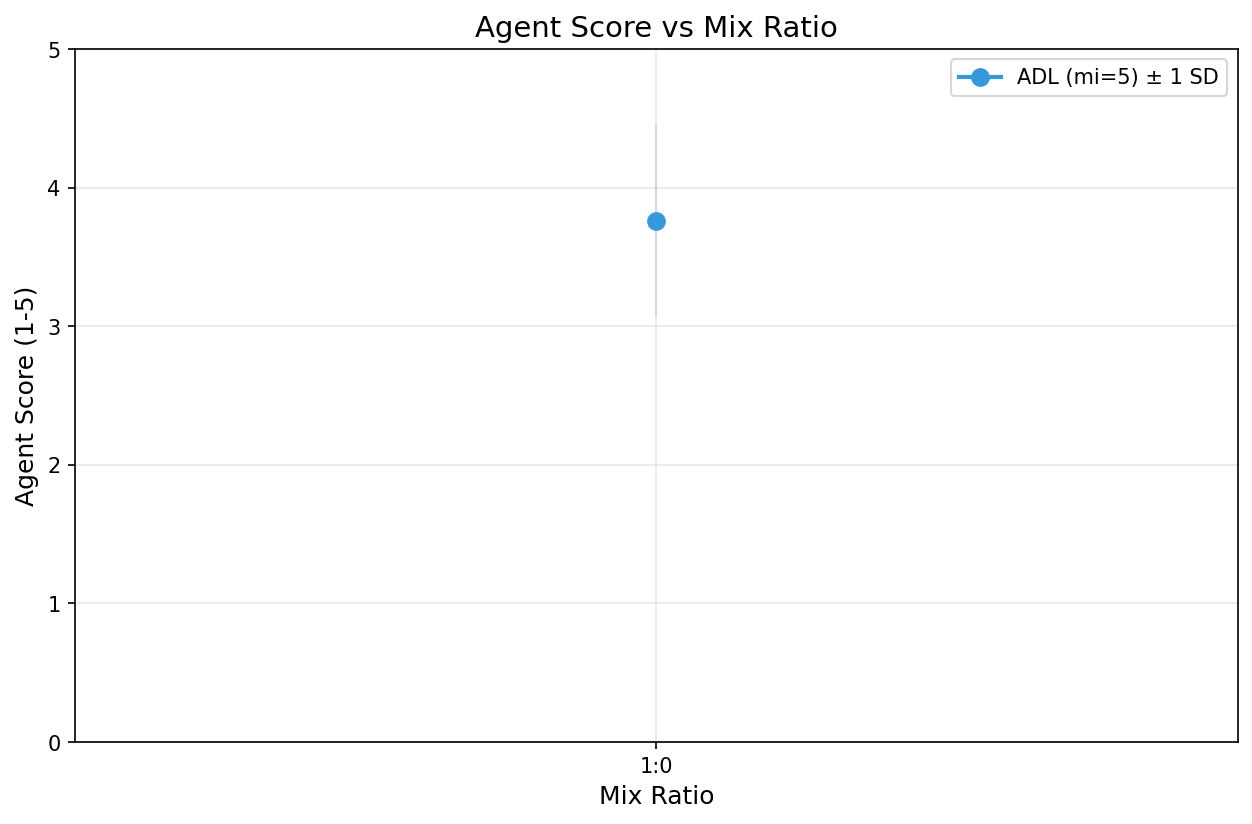

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 20:59:53)*

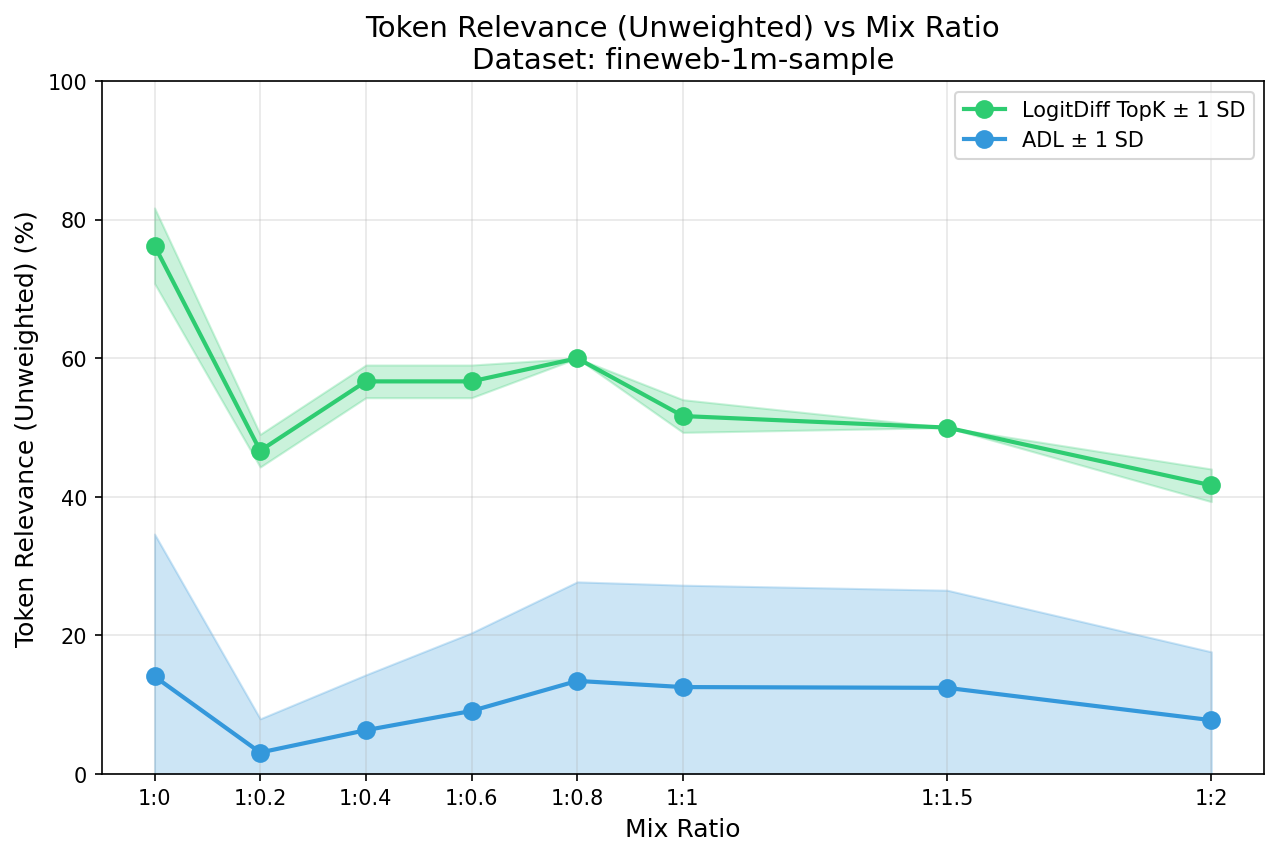

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 20:59:54)*

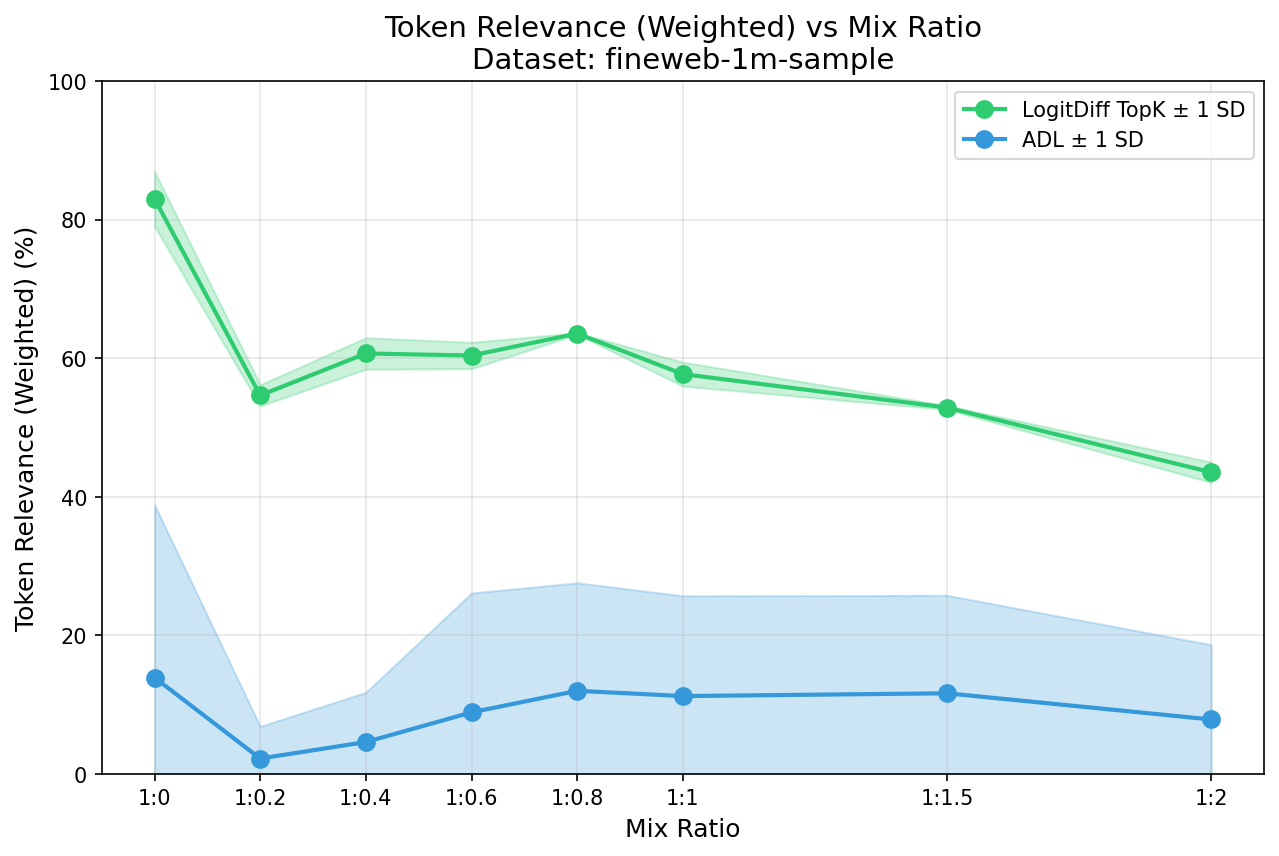


---


## N Samples Experiments

### 🤖 gemma3_1B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/gemma3_1B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-31 18:39:47)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 63.0% | 16.9% | 65.2% | 14.9% |
| 50 | 5/5 | 53.0% | 12.1% | 56.9% | 11.1% |
| 100 | 5/5 | 65.0% | 5.5% | 69.3% | 4.6% |
| 500 | 5/5 | 61.0% | 9.2% | 64.3% | 8.8% |
| 1000 | 78/83 | 58.8% | 13.2% | 61.9% | 13.3% |
| 3000 | 5/5 | 64.0% | 7.3% | 66.7% | 7.5% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 18:39:47)*

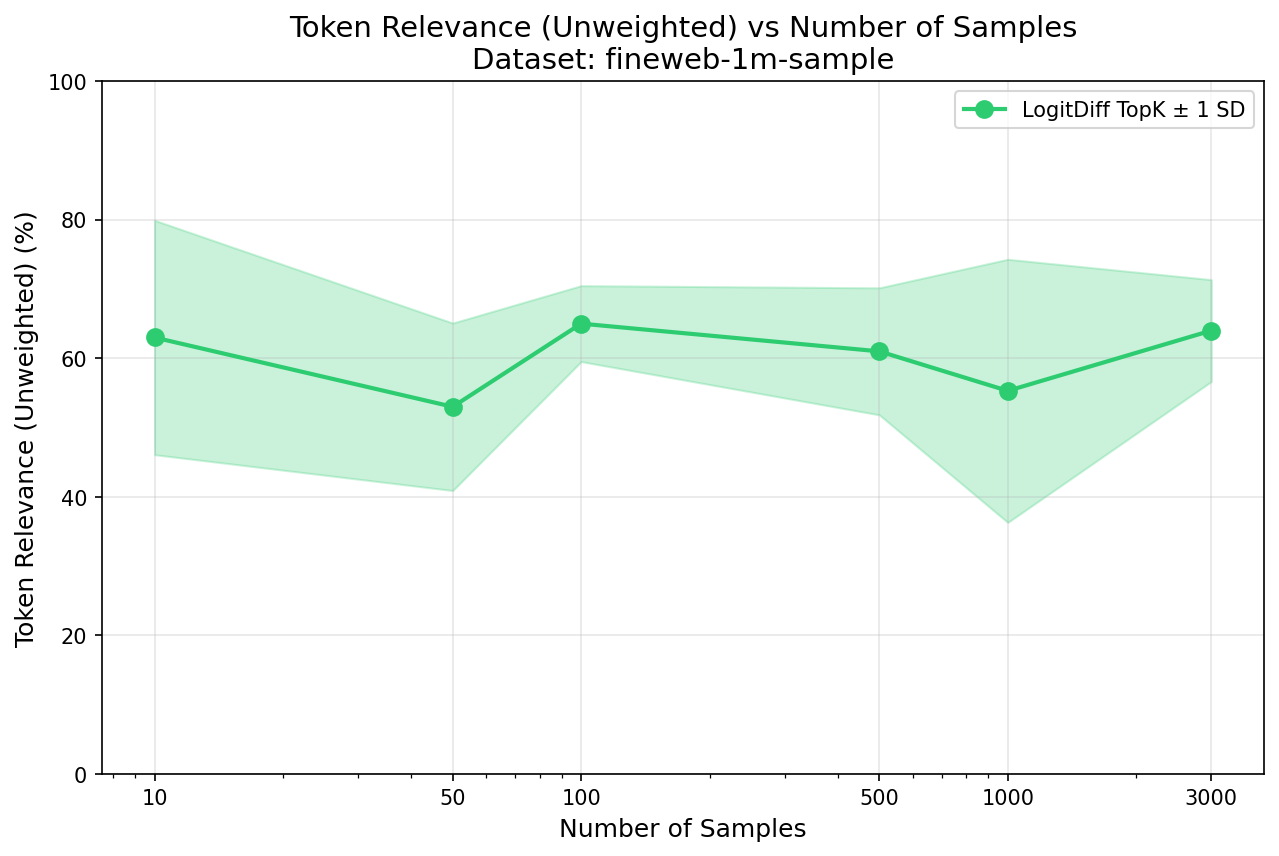

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 18:39:47)*

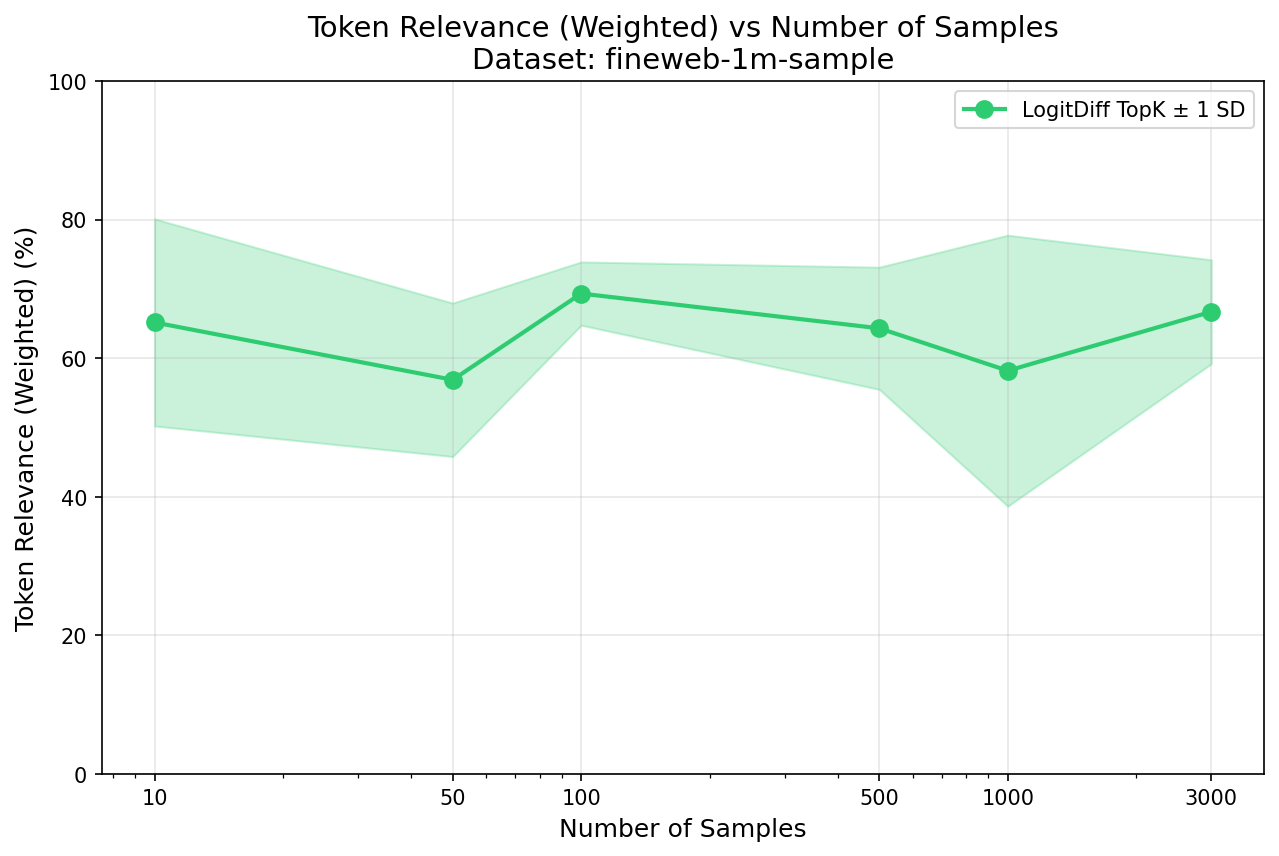

### 🤖 gemma3_1B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/gemma3_1B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 17:08:42)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 82.0% | 7.5% | 82.3% | 5.0% |
| 50 | 5/5 | 78.0% | 4.0% | 77.6% | 2.9% |
| 100 | 5/5 | 78.0% | 2.4% | 77.5% | 1.6% |
| 500 | 5/5 | 80.0% | 0.0% | 79.2% | 0.1% |
| 1000 | 78/83 | 73.3% | 17.1% | 73.9% | 15.1% |
| 3000 | 5/5 | 80.0% | 0.0% | 79.4% | 0.1% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

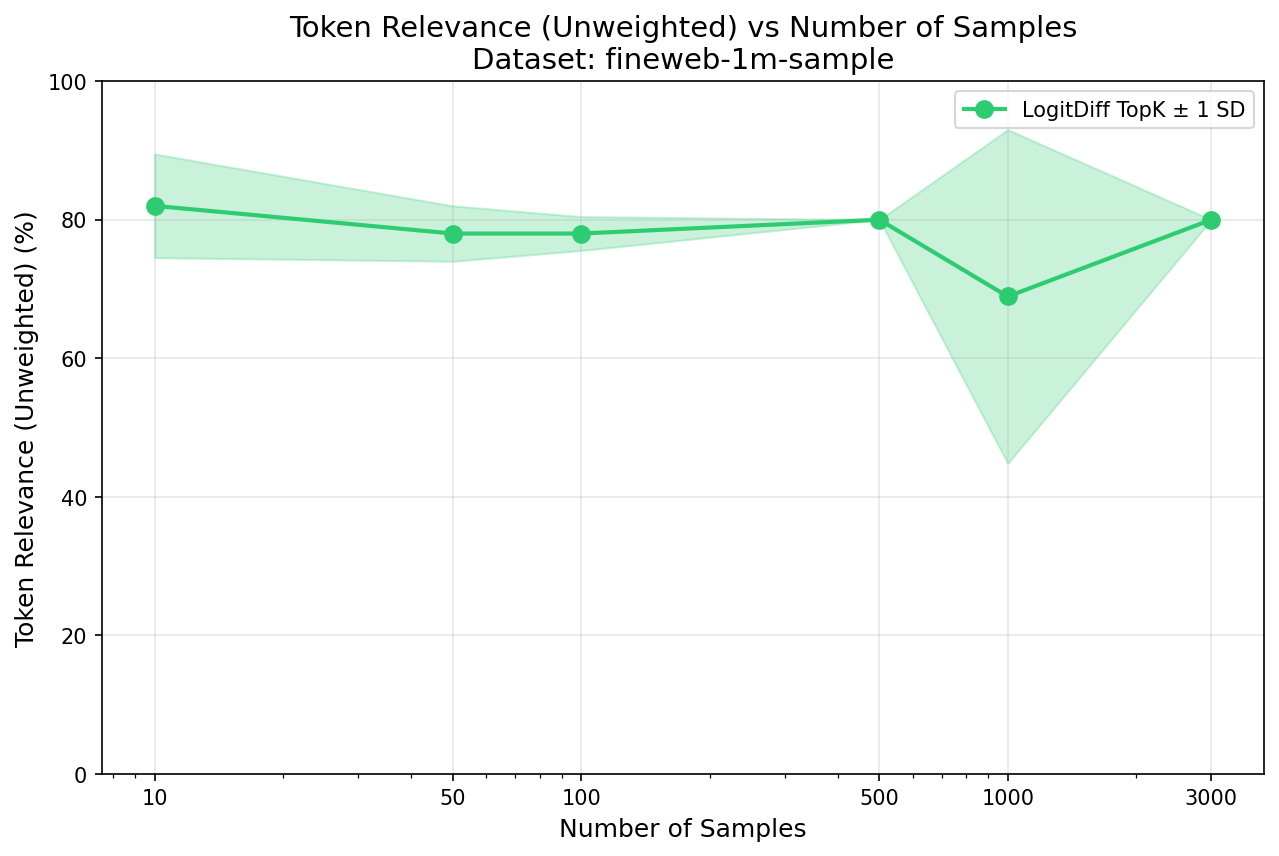

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

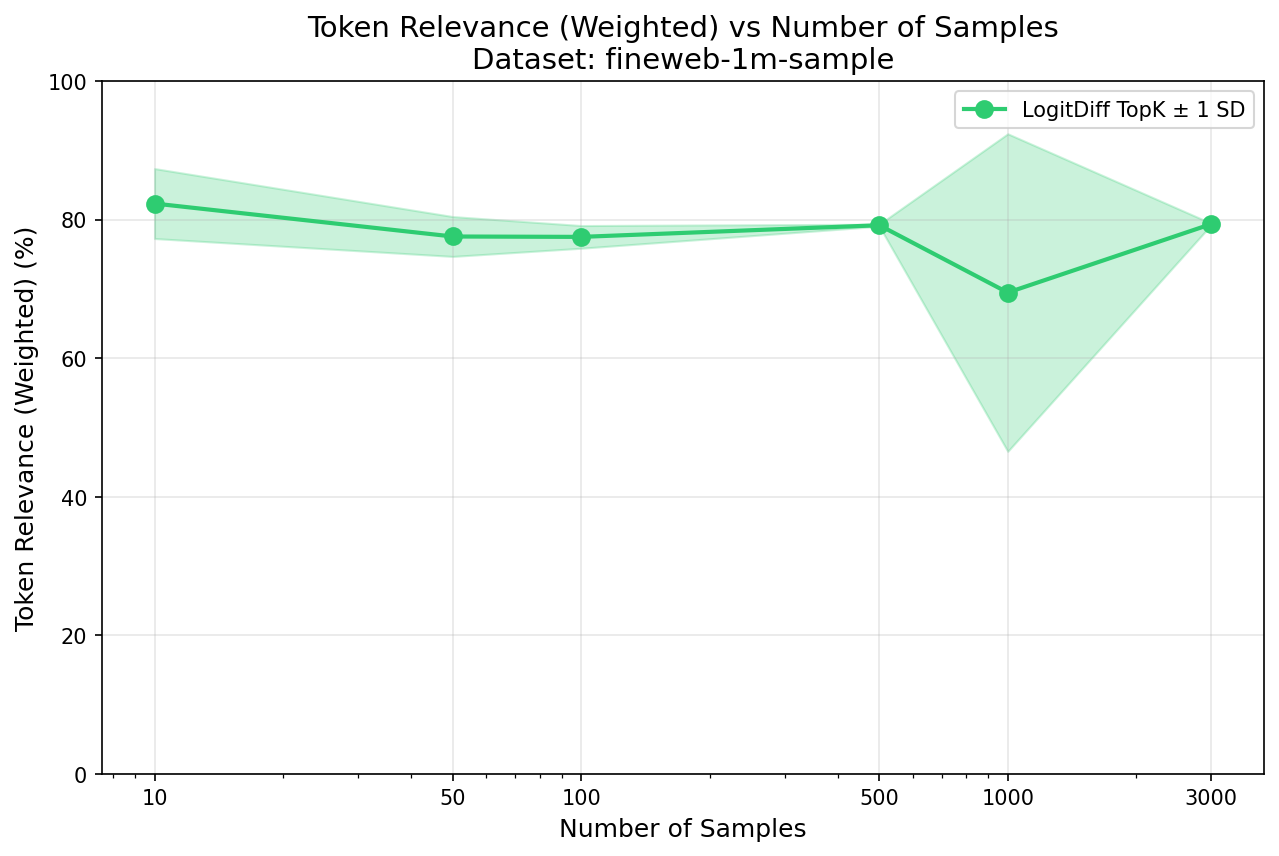

### 🤖 gemma3_1B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/gemma3_1B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 20:19:42)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 46.0% | 5.8% | 49.8% | 4.9% |
| 50 | 5/5 | 44.0% | 4.9% | 47.8% | 3.9% |
| 100 | 5/5 | 50.0% | 6.3% | 52.9% | 5.2% |
| 500 | 5/5 | 56.0% | 9.7% | 57.5% | 7.7% |
| 1000 | 74/83 | 47.5% | 9.6% | 50.7% | 9.6% |
| 3000 | 5/5 | 56.0% | 4.9% | 57.6% | 4.6% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 20:19:42)*

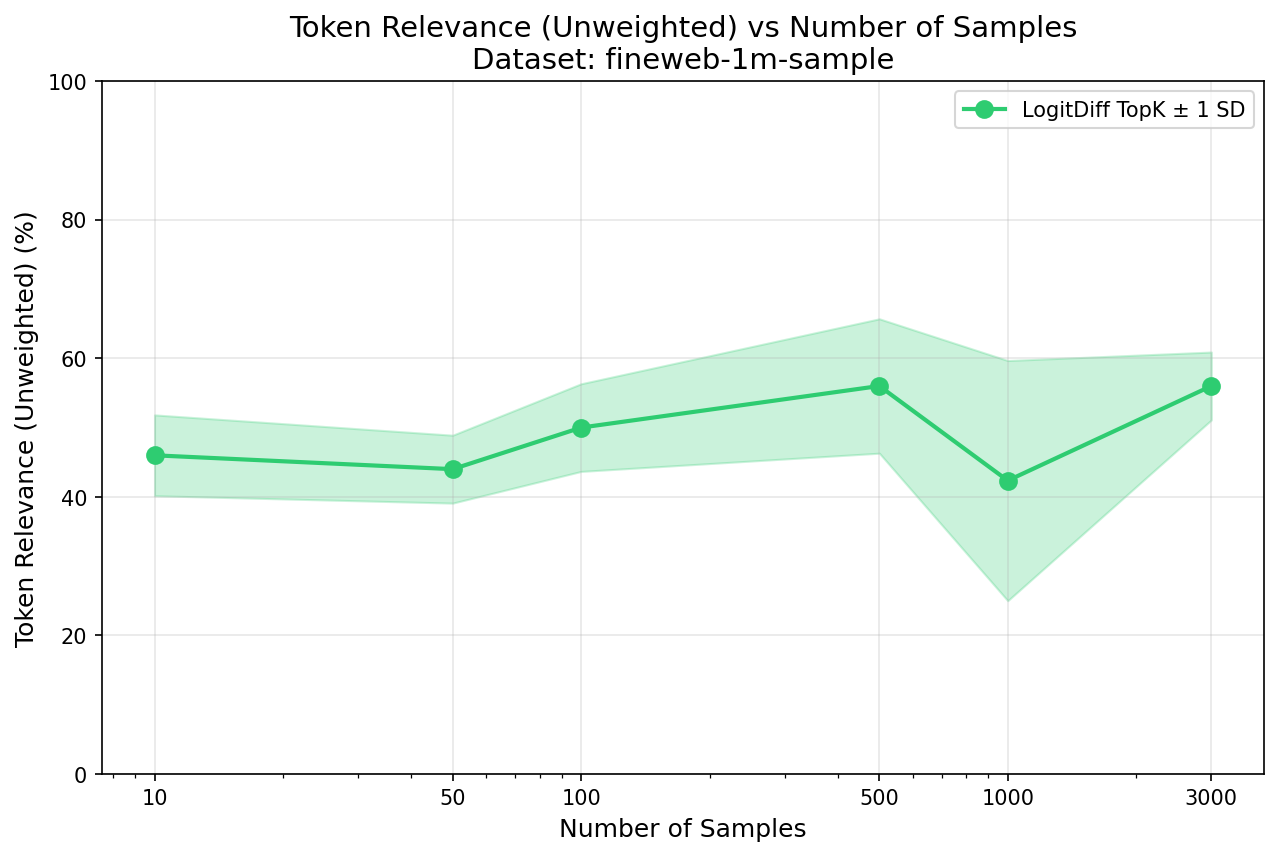

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 20:19:42)*

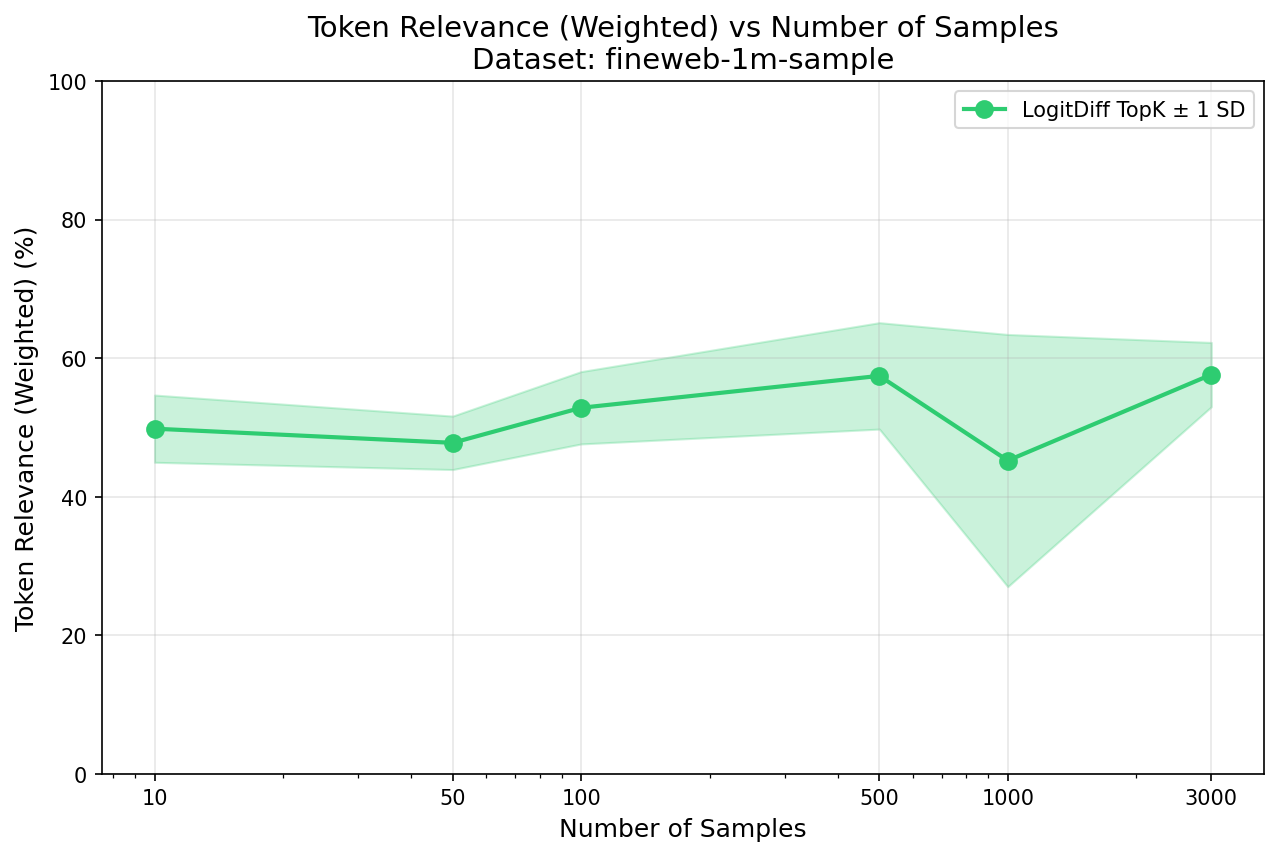

### 🤖 llama32_1B_Instruct / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/llama32_1B_Instruct/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 17:28:45)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 29.0% | 8.6% | 36.3% | 8.7% |
| 50 | 5/5 | 24.0% | 4.9% | 30.3% | 2.7% |
| 100 | 5/5 | 24.0% | 3.7% | 29.9% | 3.0% |
| 500 | 5/5 | 27.0% | 4.0% | 32.6% | 4.0% |
| 1000 | 74/79 | 23.9% | 6.3% | 29.8% | 6.9% |
| 3000 | 5/5 | 30.0% | 0.0% | 35.6% | 0.4% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:28:44)*

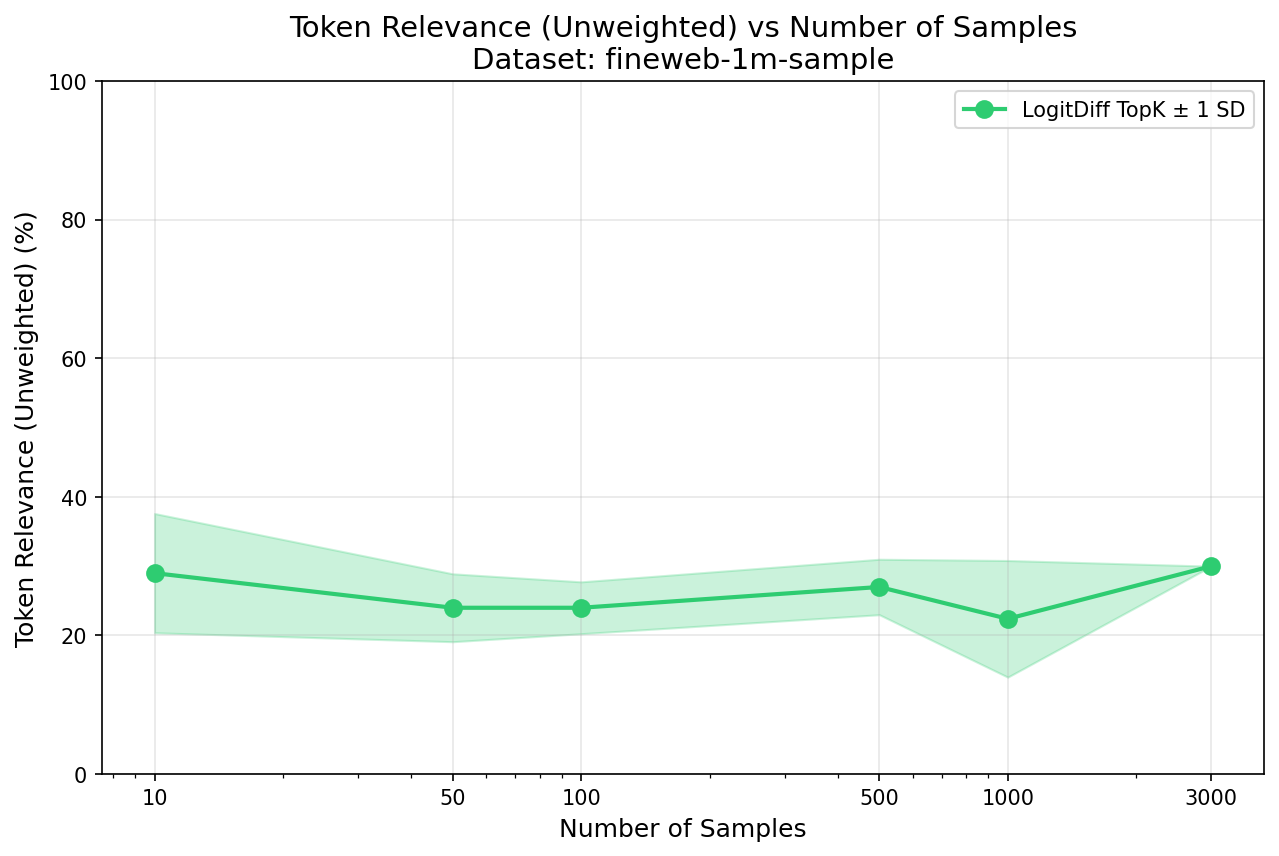

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:28:45)*

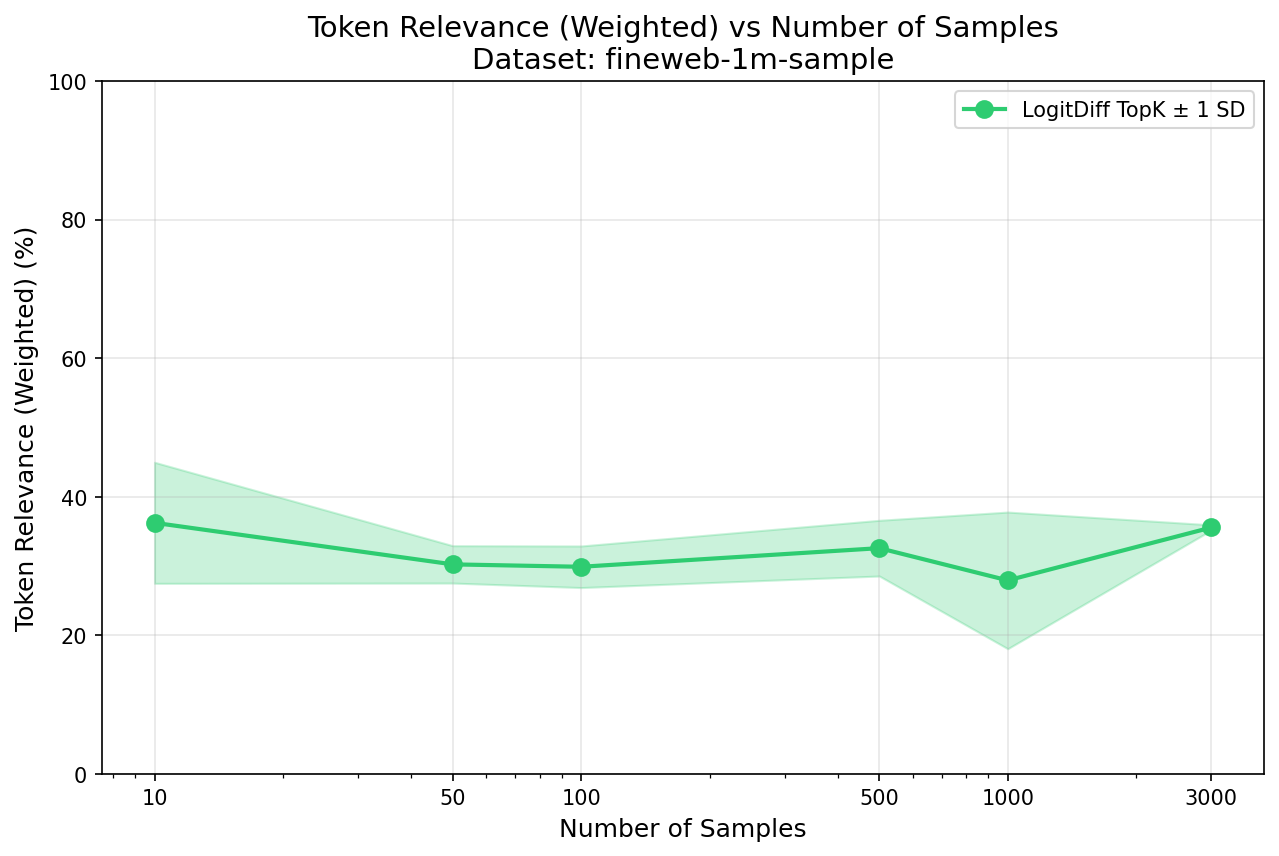

### 🤖 qwen3_1_7B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/qwen3_1_7B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 21:00:56)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 62.0% | 16.9% | 65.3% | 17.2% |
| 50 | 5/5 | 71.0% | 5.8% | 74.3% | 5.0% |
| 100 | 5/5 | 68.0% | 5.1% | 72.1% | 4.8% |
| 500 | 5/5 | 66.0% | 5.8% | 70.1% | 5.9% |
| 1000 | 81/85 | 61.0% | 18.3% | 63.4% | 18.8% |
| 3000 | 5/5 | 70.0% | 5.5% | 73.6% | 5.2% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 21:00:55)*

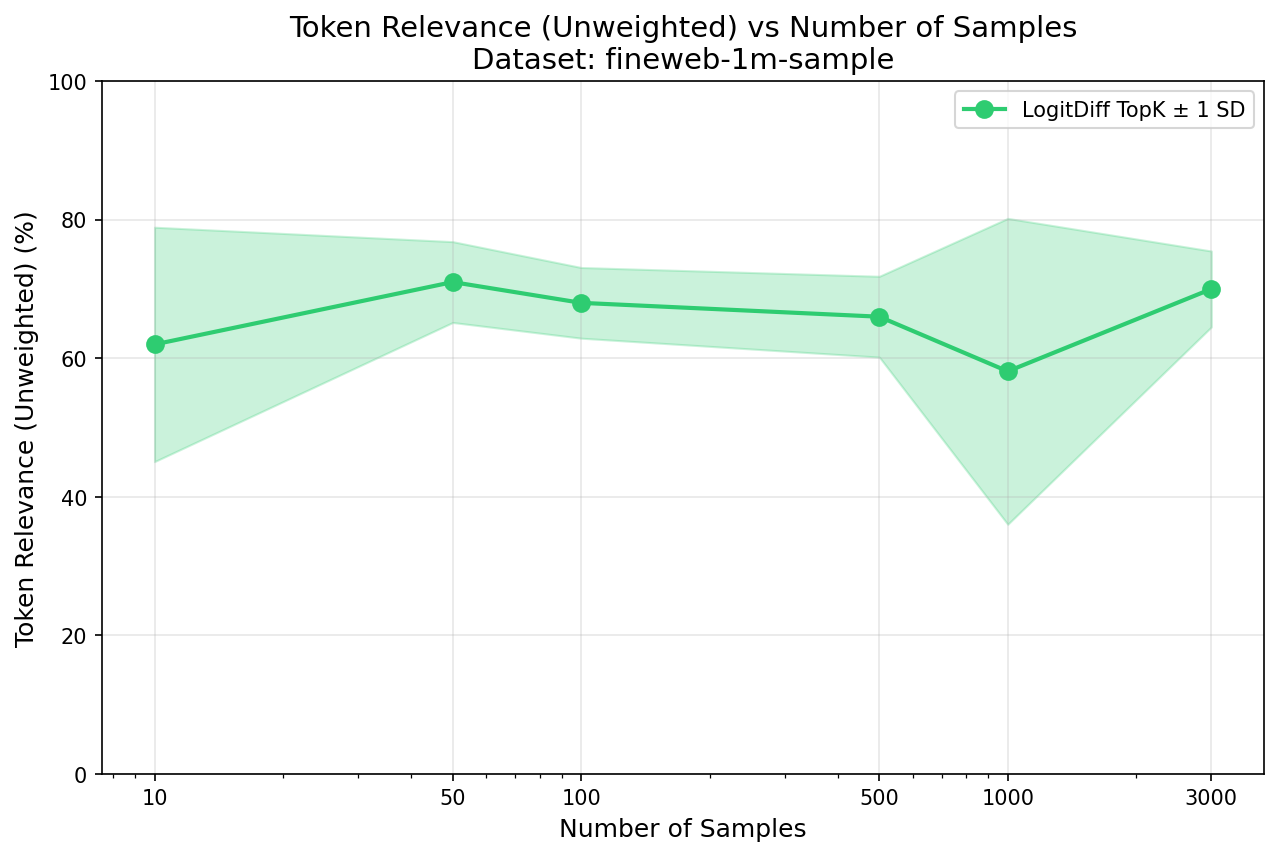

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 21:00:55)*

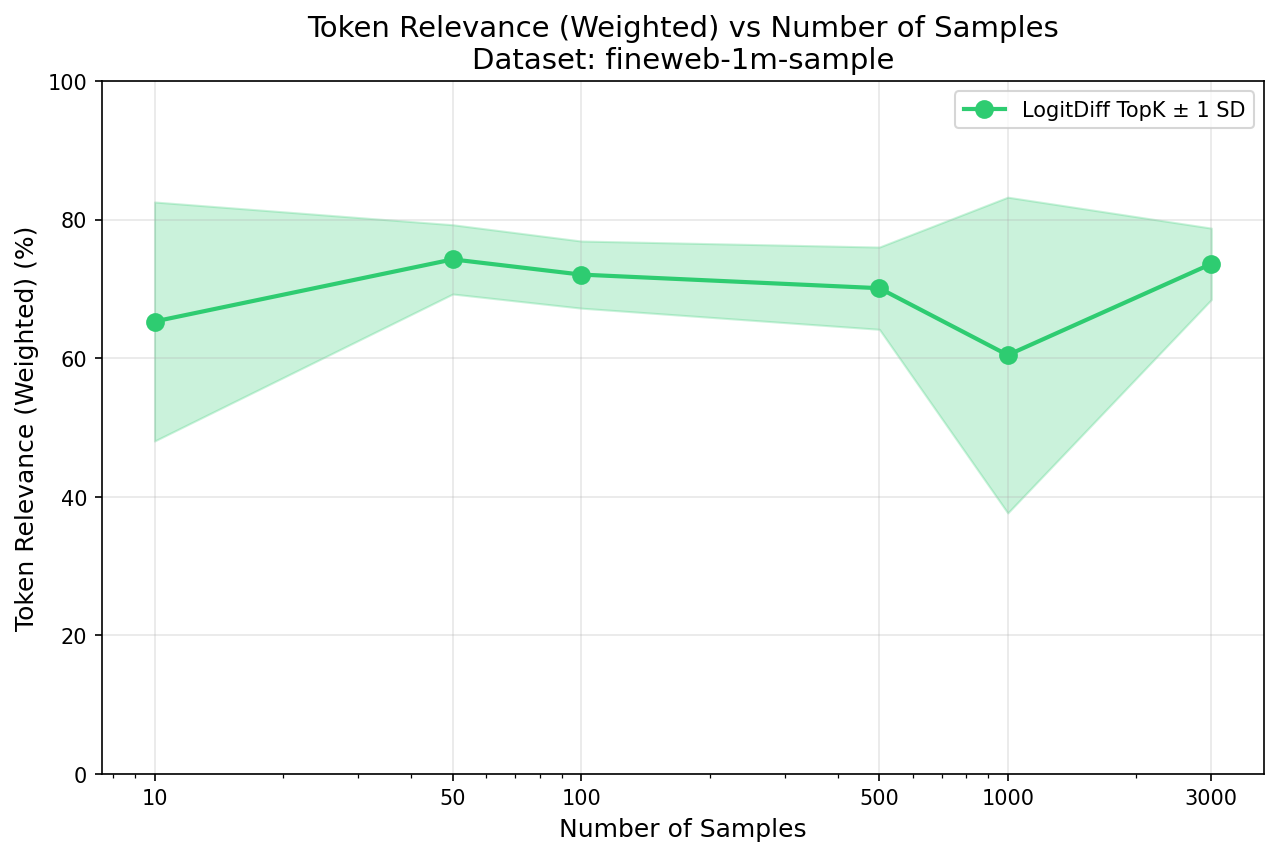

### 🤖 qwen3_1_7B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/qwen3_1_7B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 19:27:38)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 63.0% | 18.3% | 65.3% | 17.9% |
| 50 | 5/5 | 61.0% | 3.7% | 65.5% | 3.7% |
| 100 | 5/5 | 63.0% | 2.4% | 66.8% | 2.1% |
| 500 | 5/5 | 65.0% | 3.2% | 68.2% | 2.6% |
| 1000 | 80/85 | 57.6% | 12.3% | 60.9% | 12.7% |
| 3000 | 5/5 | 64.0% | 2.0% | 67.6% | 1.5% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 19:27:37)*

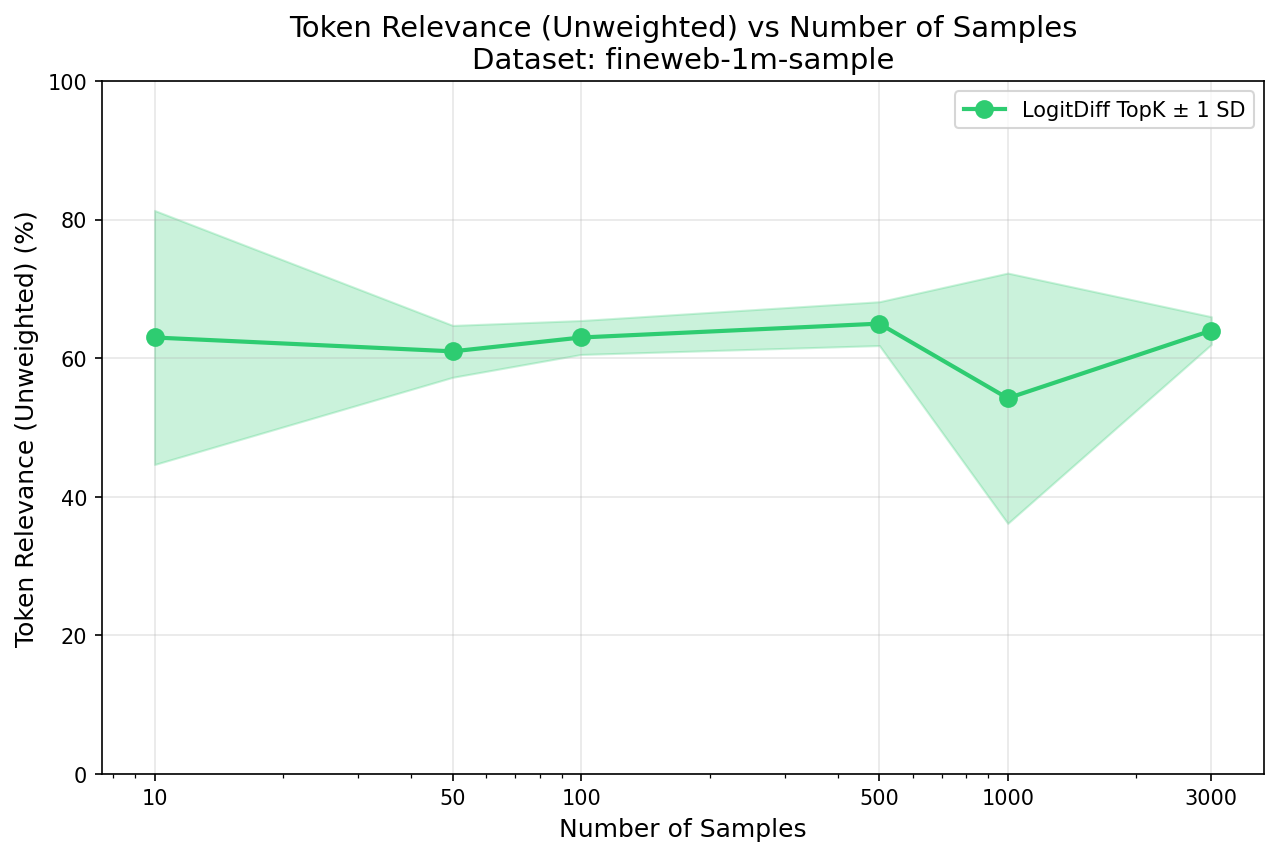

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 19:27:38)*

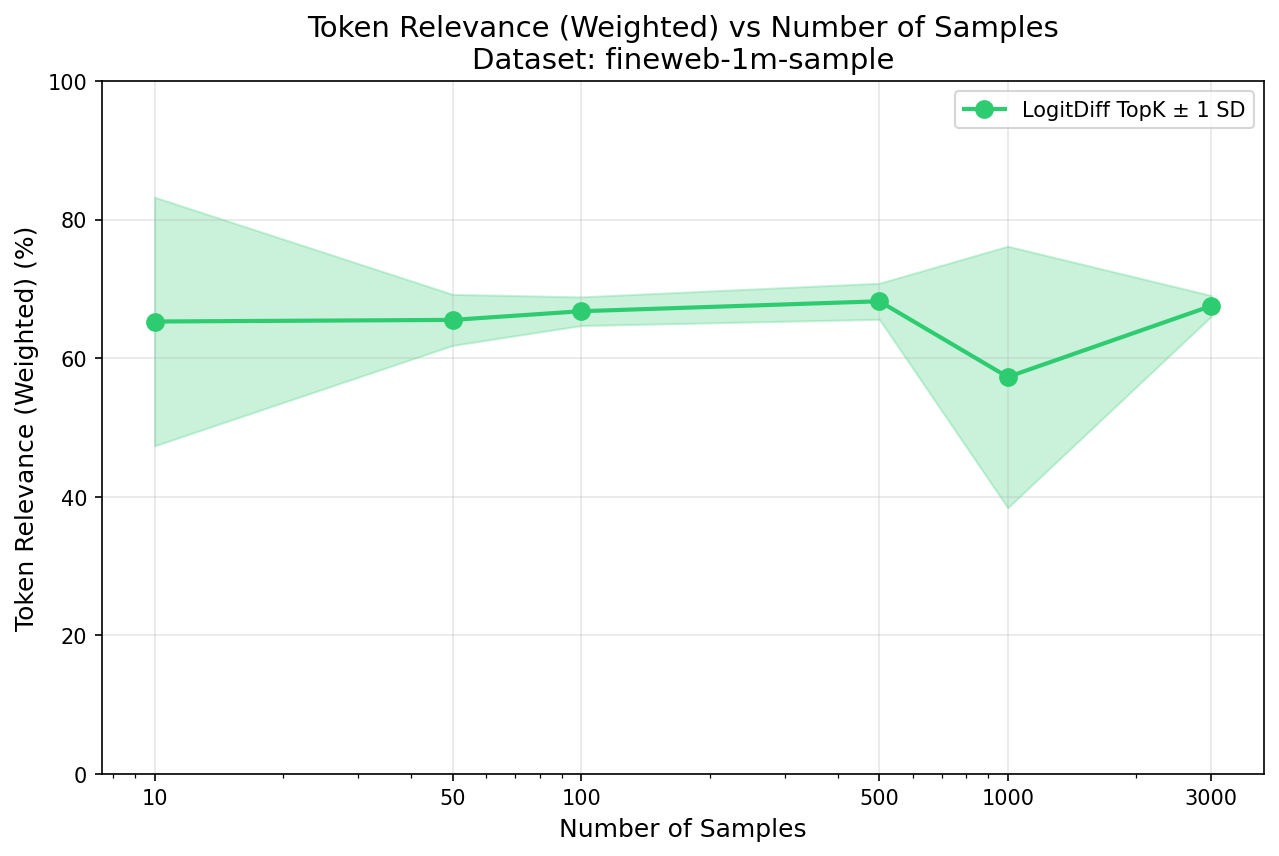

### 🤖 qwen3_1_7B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/n_samples_experiments/qwen3_1_7B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 22:17:27)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 10 | 5/5 | 50.0% | 8.9% | 54.2% | 11.0% |
| 50 | 5/5 | 59.0% | 3.7% | 62.2% | 3.9% |
| 100 | 5/5 | 57.0% | 4.0% | 60.8% | 3.7% |
| 500 | 5/5 | 58.0% | 2.4% | 61.7% | 2.2% |
| 1000 | 85/85 | 46.9% | 15.3% | 50.8% | 15.4% |
| 3000 | 5/5 | 57.0% | 2.4% | 60.9% | 2.1% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 22:17:27)*

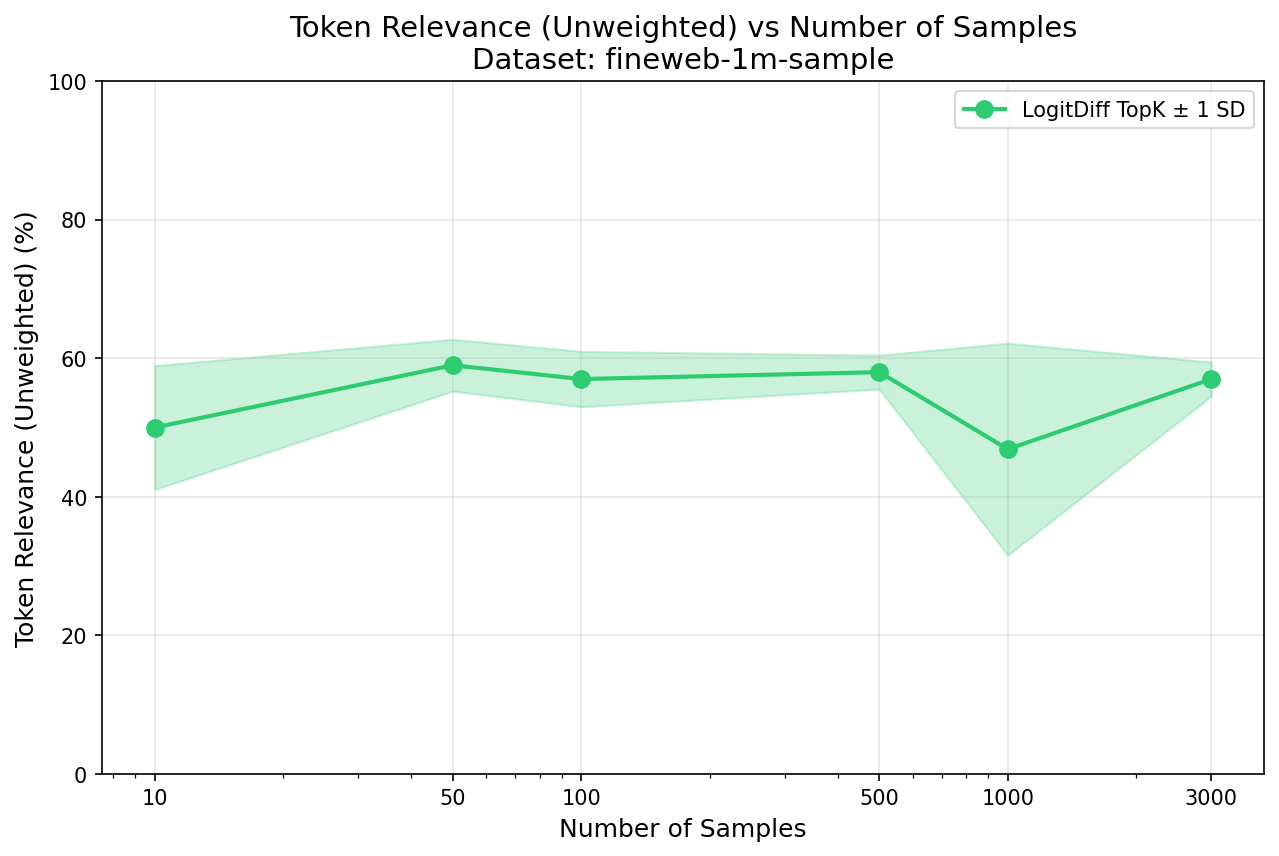

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 22:17:27)*

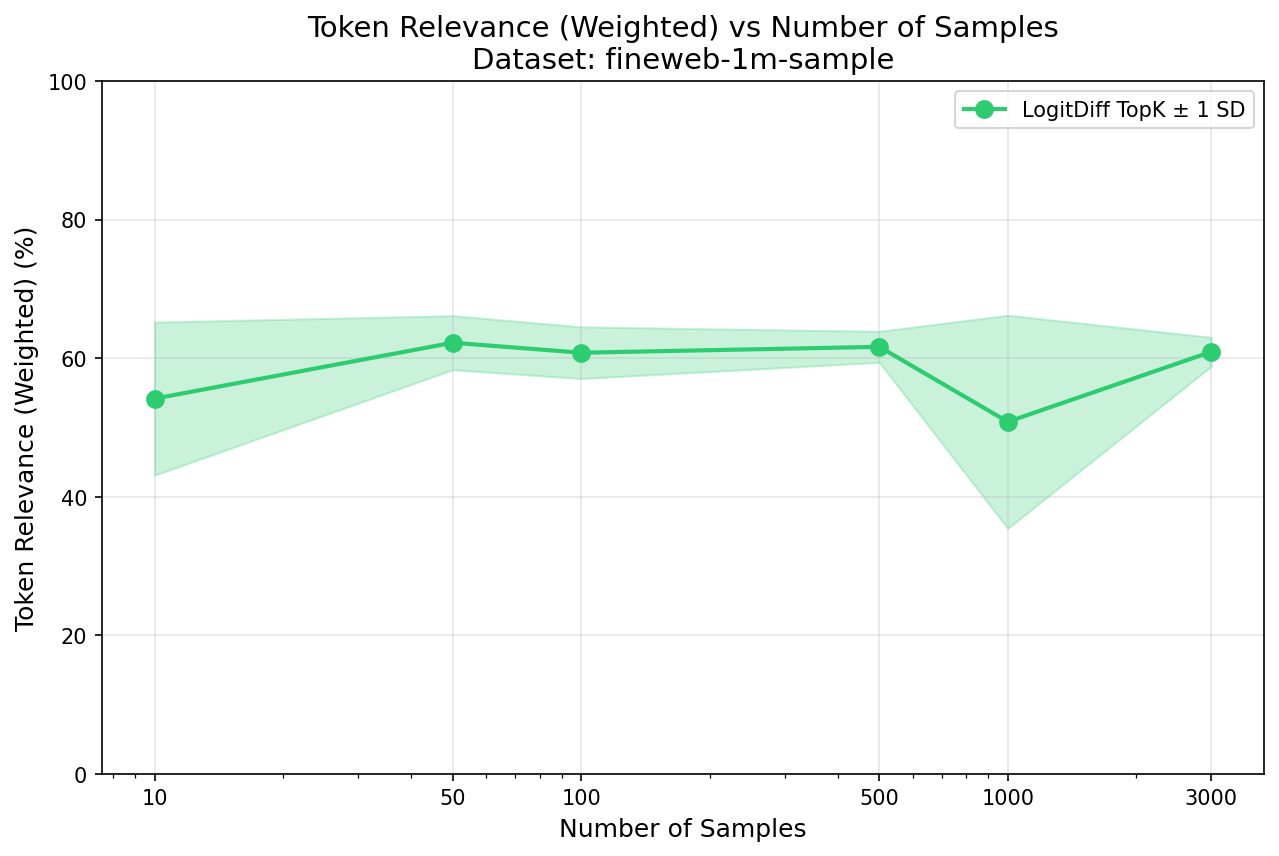


---


## Token Positions Experiments

### 🤖 gemma3_1B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/gemma3_1B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-31 18:09:35)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 19.0% | 3.7% | 21.3% | 3.9% |
| 10 | 5/5 | 64.0% | 7.3% | 67.7% | 7.6% |
| 30 | 56/56 | 60.9% | 9.3% | 64.4% | 8.9% |
| 50 | 5/5 | 62.0% | 6.0% | 65.0% | 6.2% |
| 100 | 5/5 | 63.0% | 2.4% | 64.6% | 2.0% |
| 200 | 3/3 | 65.0% | 0.0% | 63.9% | 0.2% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 18:09:34)*

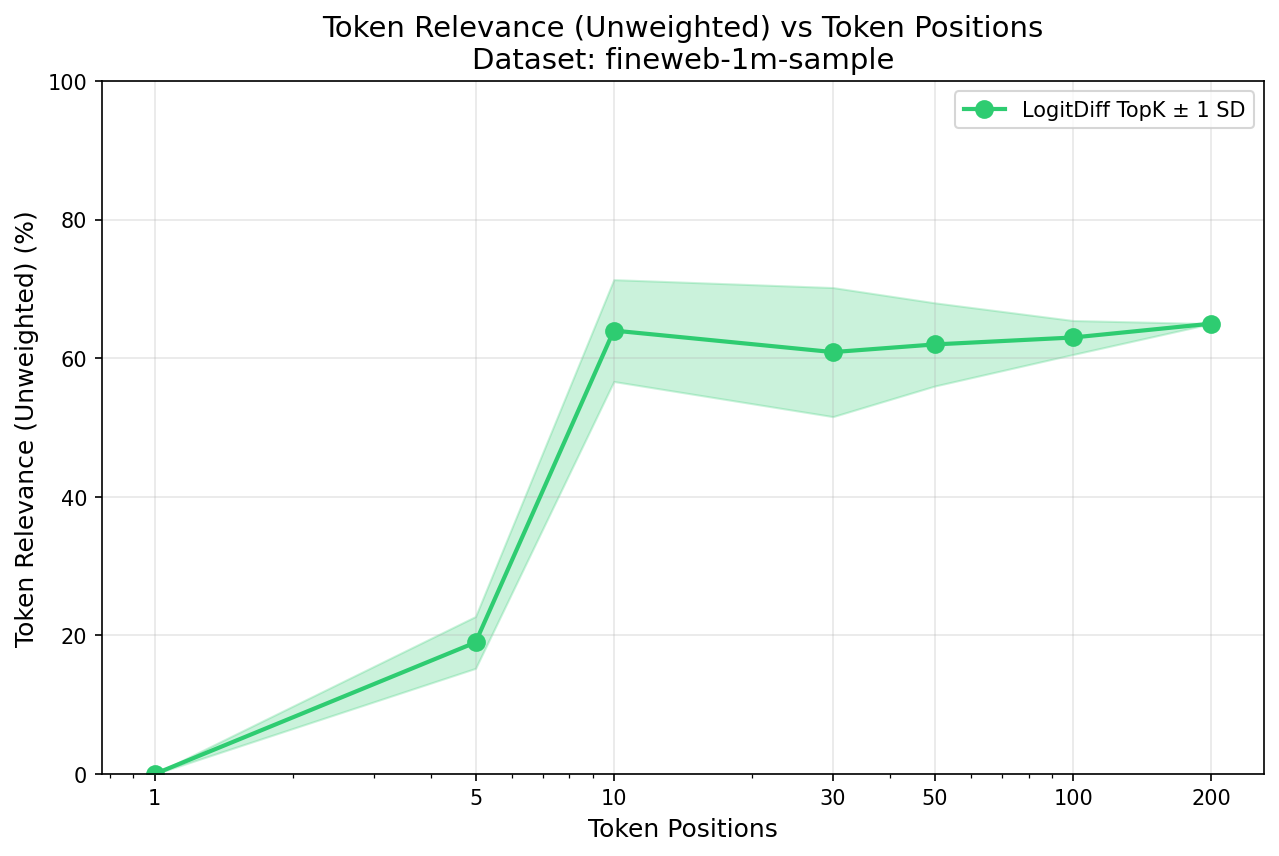

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 18:09:35)*

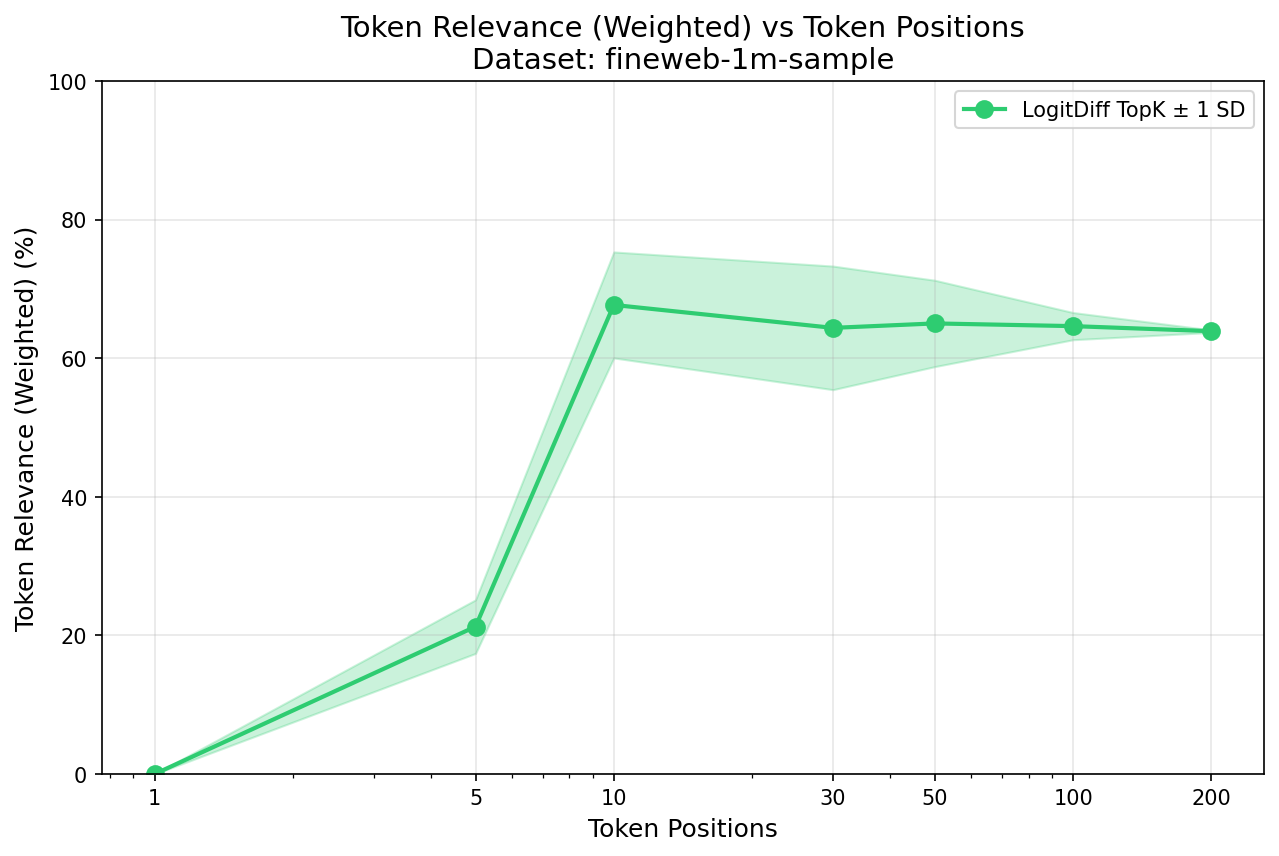

### 🤖 gemma3_1B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/gemma3_1B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 17:28:45)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 25.0% | 0.0% | 29.8% | 0.3% |
| 10 | 5/5 | 80.0% | 0.0% | 80.0% | 0.2% |
| 30 | 80/80 | 78.3% | 10.3% | 78.5% | 8.5% |
| 50 | 5/5 | 79.0% | 2.0% | 78.0% | 1.4% |
| 100 | 5/5 | 77.0% | 2.4% | 75.3% | 1.7% |
| 200 | 5/5 | 54.0% | 3.7% | 56.1% | 2.1% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:28:44)*

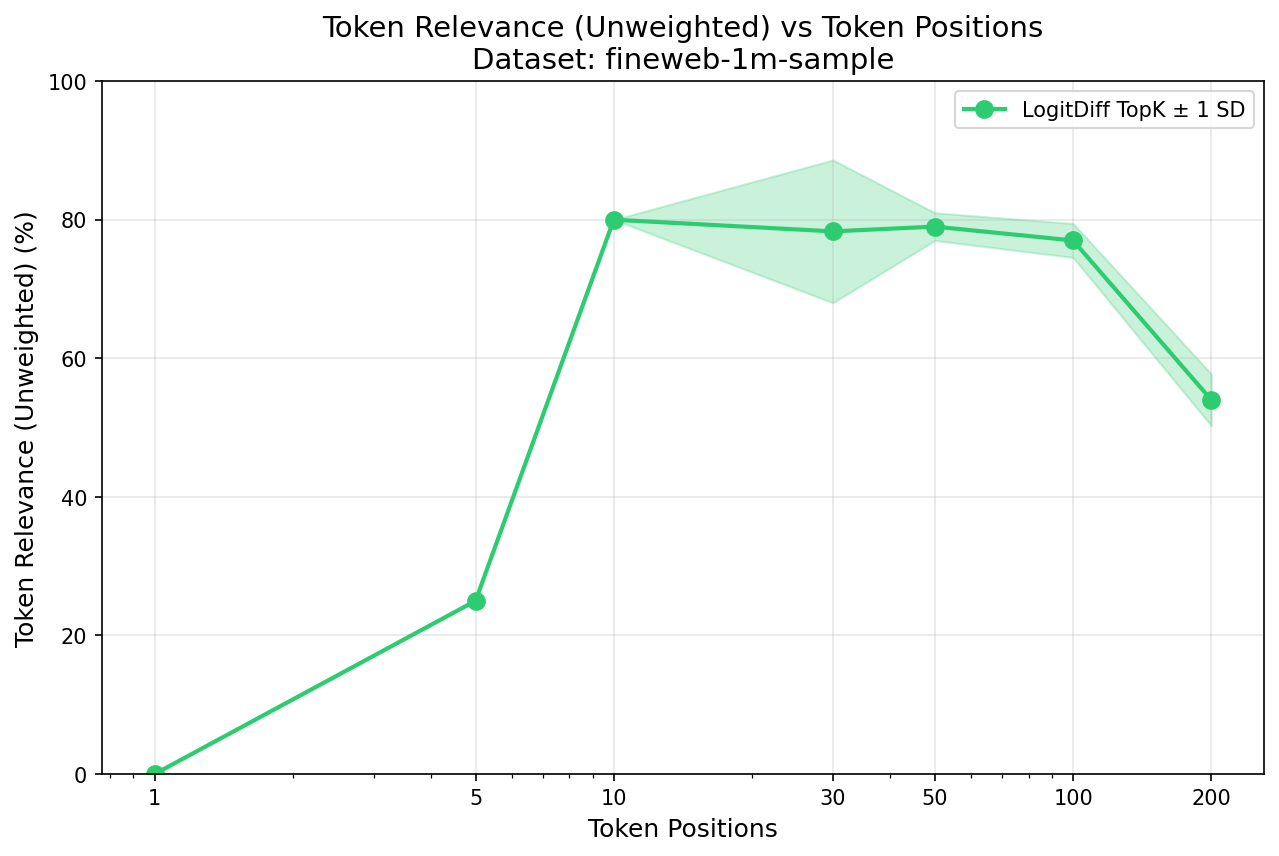

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:28:45)*

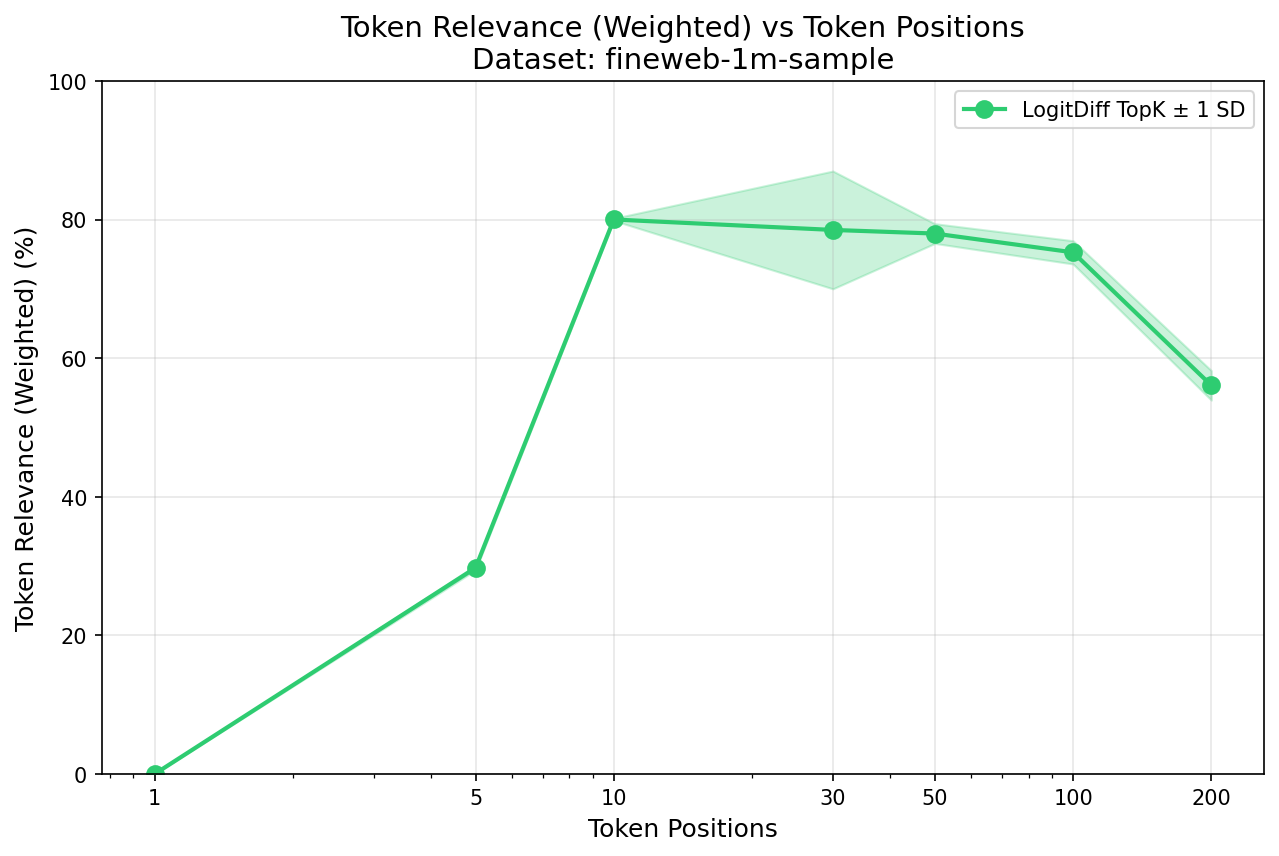

### 🤖 gemma3_1B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/gemma3_1B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 19:52:20)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 1/5 | 5.0% | 0.0% | 5.2% | 0.0% |
| 10 | 5/5 | 44.0% | 2.0% | 51.4% | 1.7% |
| 30 | 60/60 | 49.1% | 8.2% | 52.4% | 7.5% |
| 50 | 5/5 | 51.0% | 7.3% | 53.3% | 6.3% |
| 100 | 5/5 | 43.0% | 6.0% | 45.9% | 5.9% |
| 200 | 3/3 | 35.0% | 0.0% | 34.4% | 0.1% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 19:52:19)*

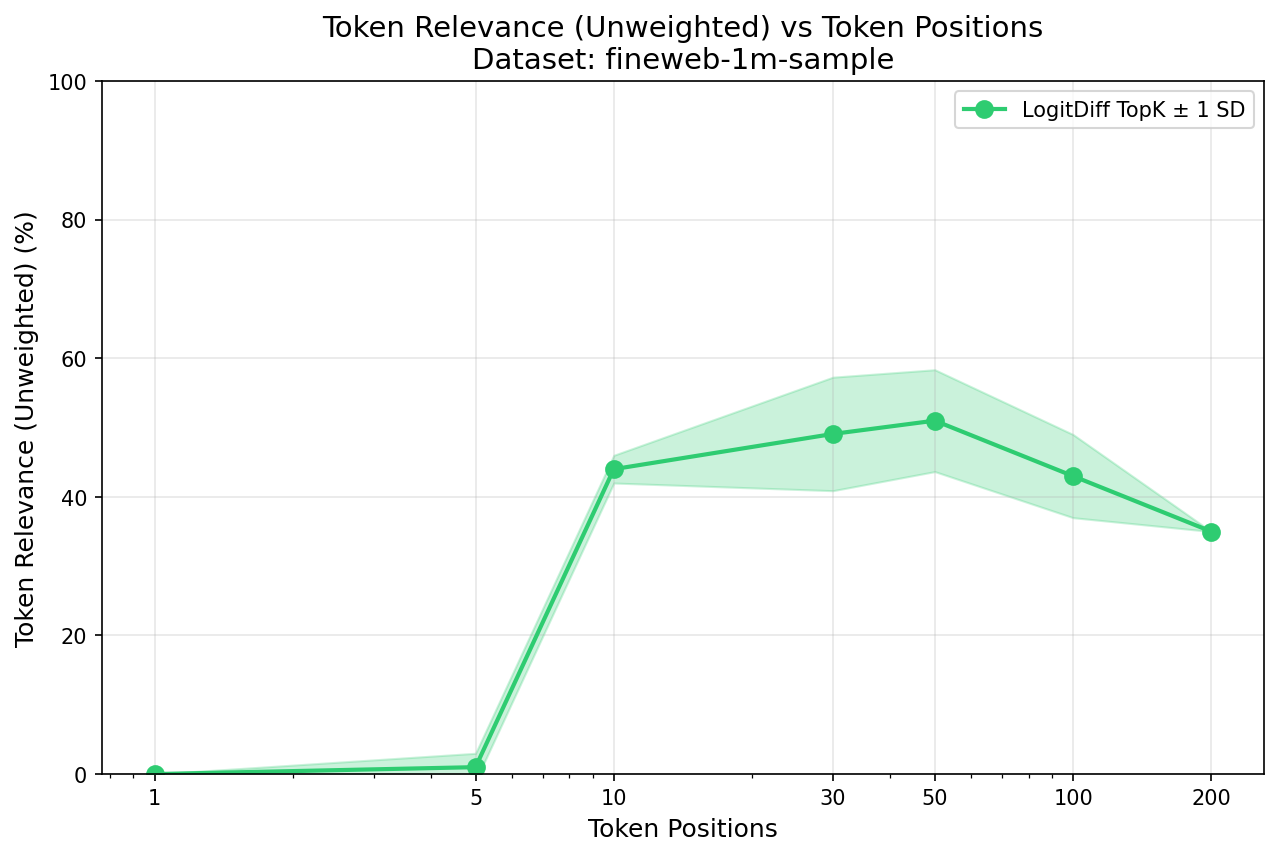

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 19:52:20)*

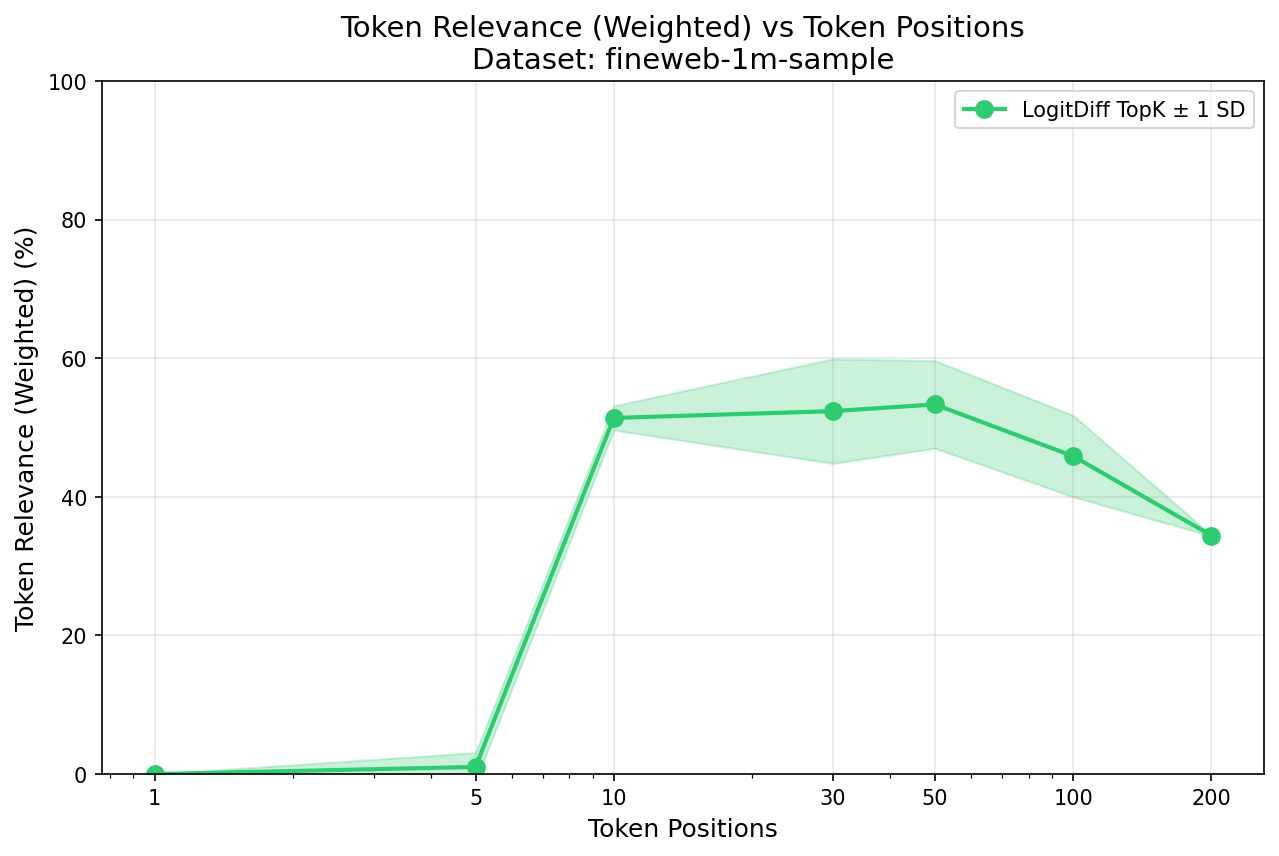

### 🤖 llama32_1B_Instruct / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/llama32_1B_Instruct/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 17:55:15)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 6.0% | 2.0% | 7.6% | 1.9% |
| 10 | 5/5 | 23.0% | 4.0% | 30.0% | 3.3% |
| 30 | 80/80 | 25.2% | 4.8% | 31.2% | 4.3% |
| 50 | 5/5 | 21.0% | 2.0% | 27.4% | 1.9% |
| 100 | 5/5 | 31.0% | 5.8% | 37.5% | 5.6% |
| 200 | 5/5 | 32.0% | 2.4% | 42.0% | 2.4% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:55:14)*

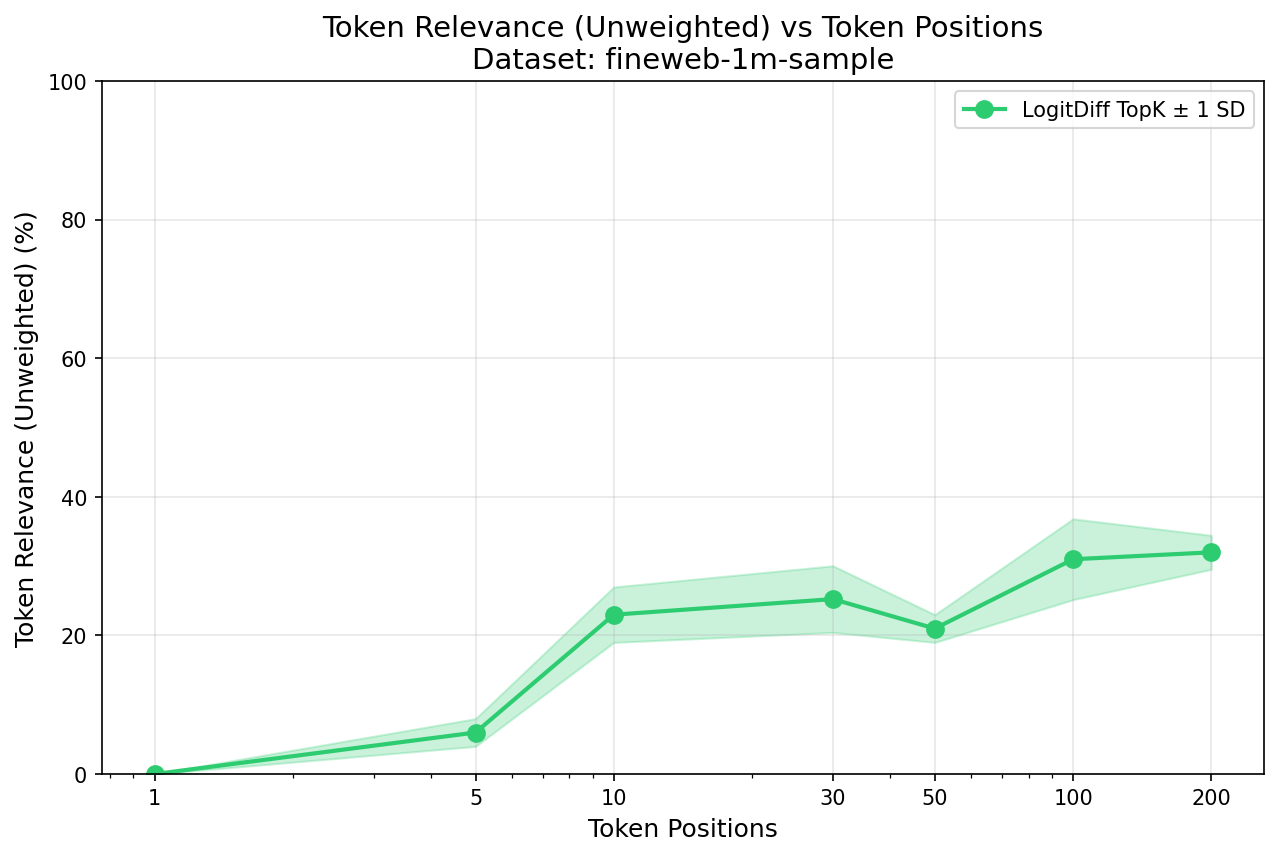

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:55:14)*

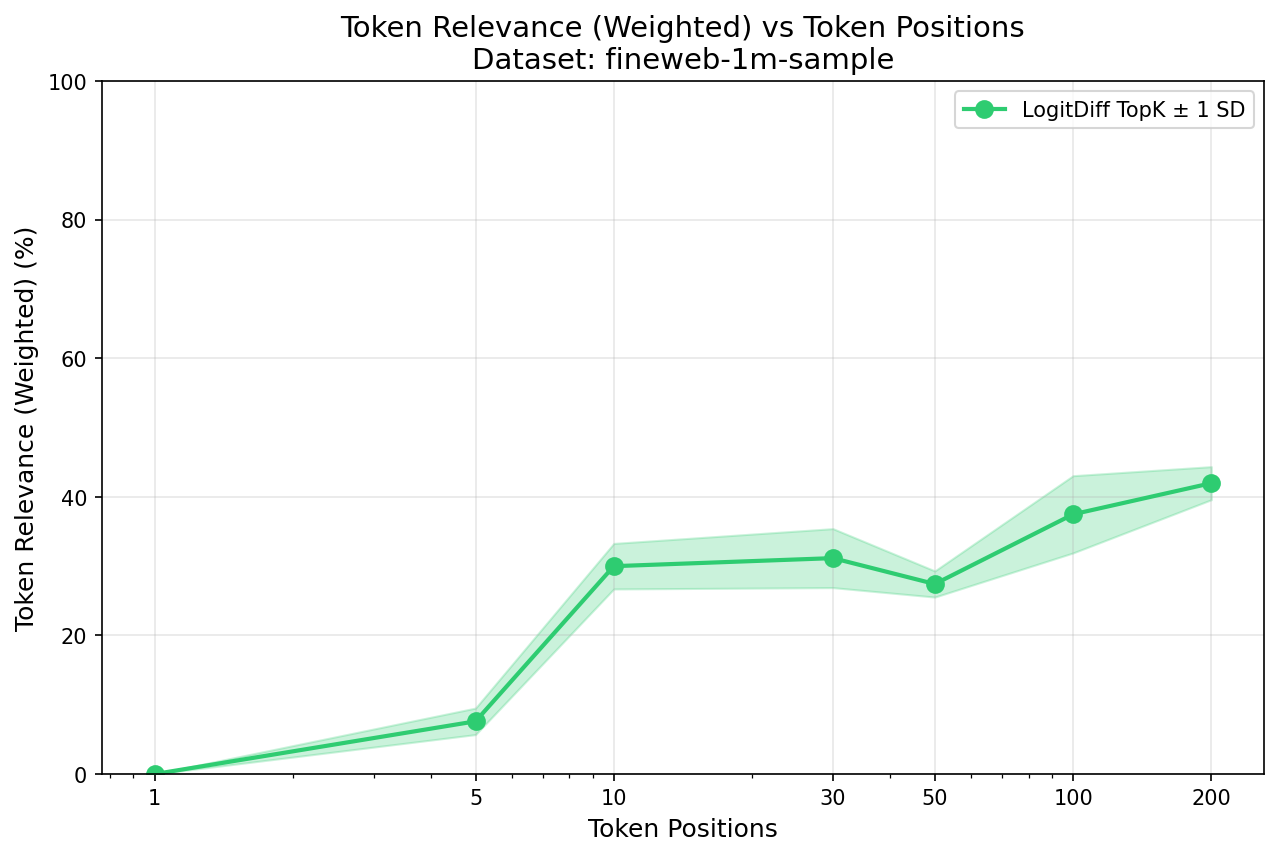

### 🤖 qwen3_1_7B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/qwen3_1_7B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 20:35:37)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 1 | 1/5 | 5.0% | 0.0% | 5.0% | 0.0% |
| 5 | 5/5 | 11.0% | 2.0% | 11.6% | 2.2% |
| 10 | 5/5 | 61.0% | 6.6% | 64.2% | 6.2% |
| 30 | 58/58 | 64.1% | 13.1% | 66.8% | 13.3% |
| 50 | 5/5 | 75.0% | 3.2% | 78.0% | 2.6% |
| 100 | 5/5 | 61.0% | 4.9% | 64.7% | 5.0% |
| 200 | 5/5 | 63.0% | 5.1% | 63.2% | 5.1% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 20:35:36)*

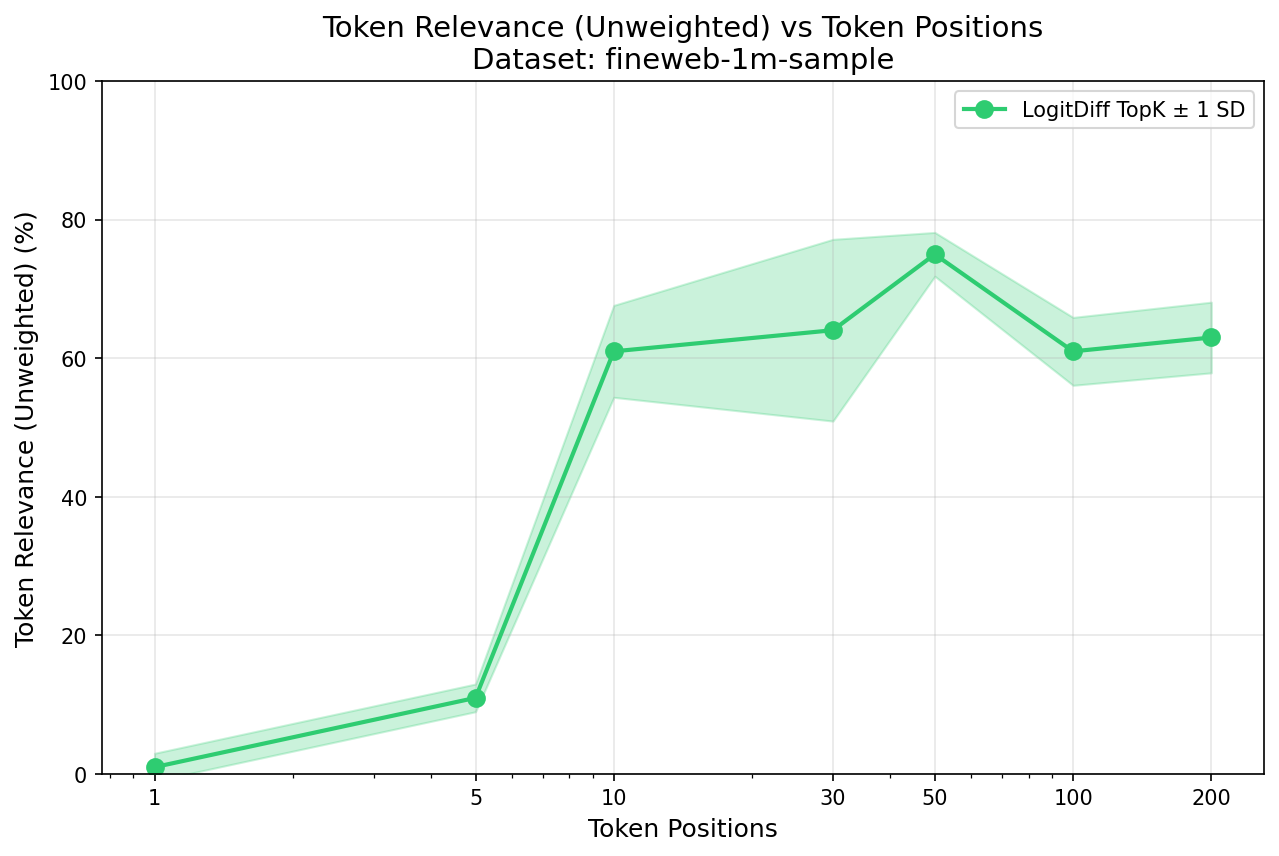

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 20:35:37)*

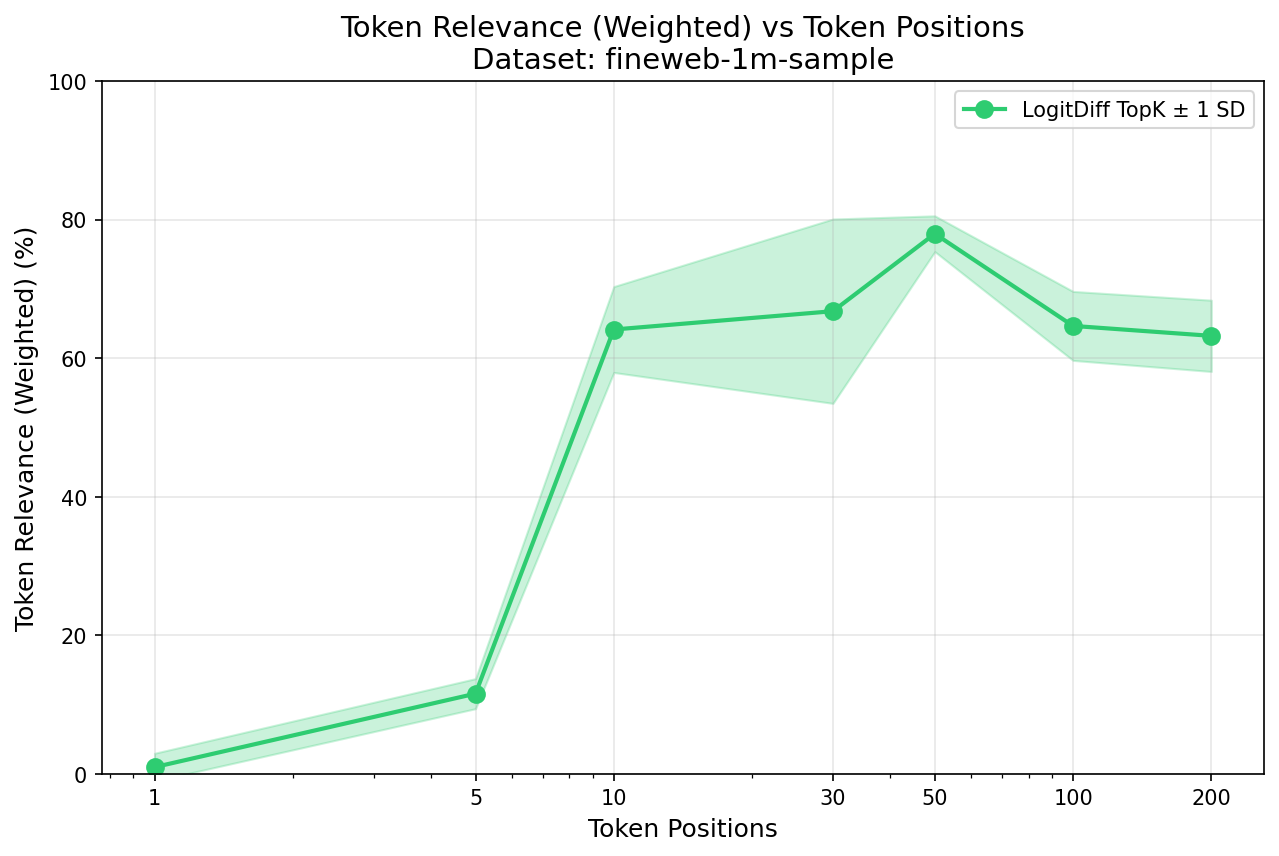

### 🤖 qwen3_1_7B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/qwen3_1_7B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 19:01:50)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 15.0% | 0.0% | 15.5% | 0.3% |
| 10 | 5/5 | 60.0% | 3.2% | 62.3% | 2.3% |
| 30 | 57/57 | 61.2% | 6.3% | 64.9% | 5.6% |
| 50 | 5/5 | 65.0% | 0.0% | 67.4% | 0.2% |
| 100 | 5/5 | 61.0% | 2.0% | 63.4% | 1.5% |
| 200 | 5/5 | 53.0% | 2.4% | 56.7% | 1.7% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 19:01:49)*

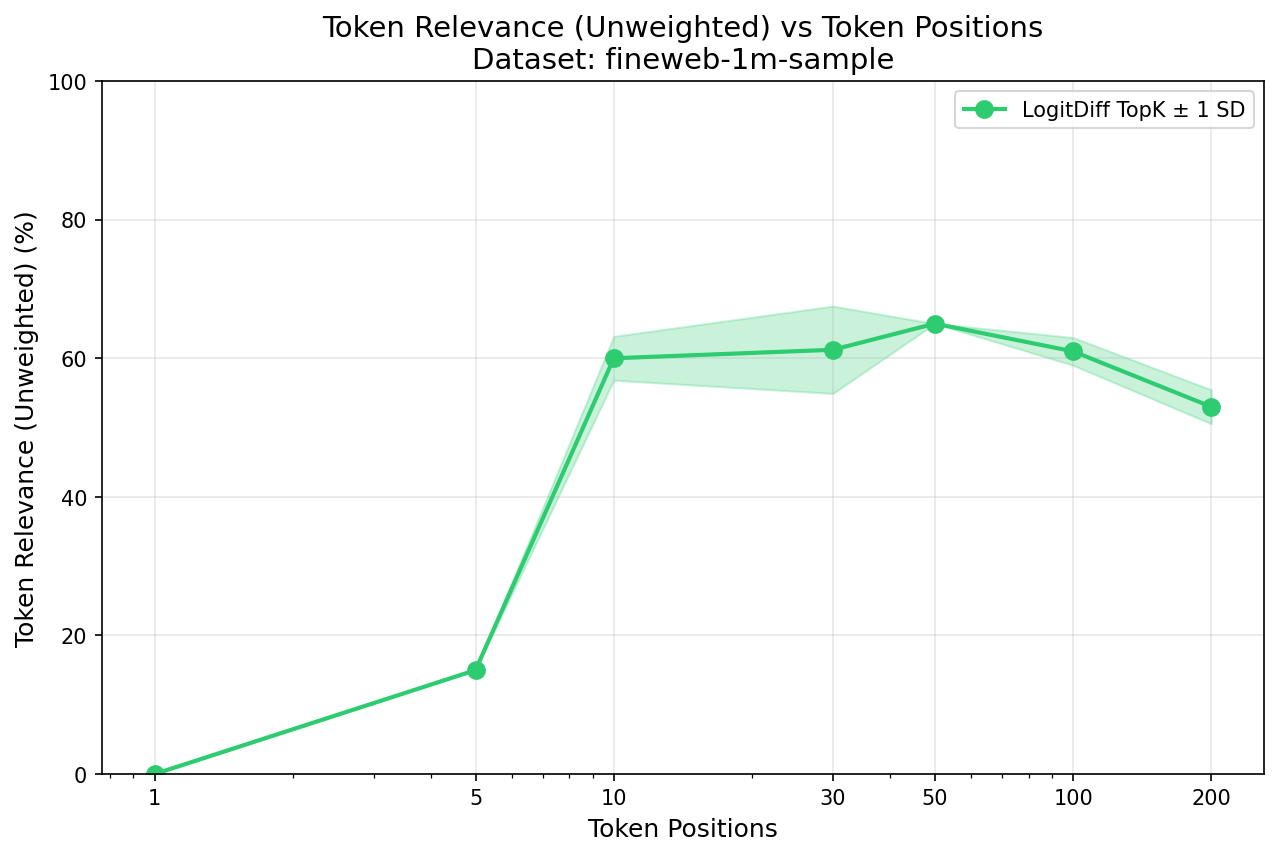

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 19:01:50)*

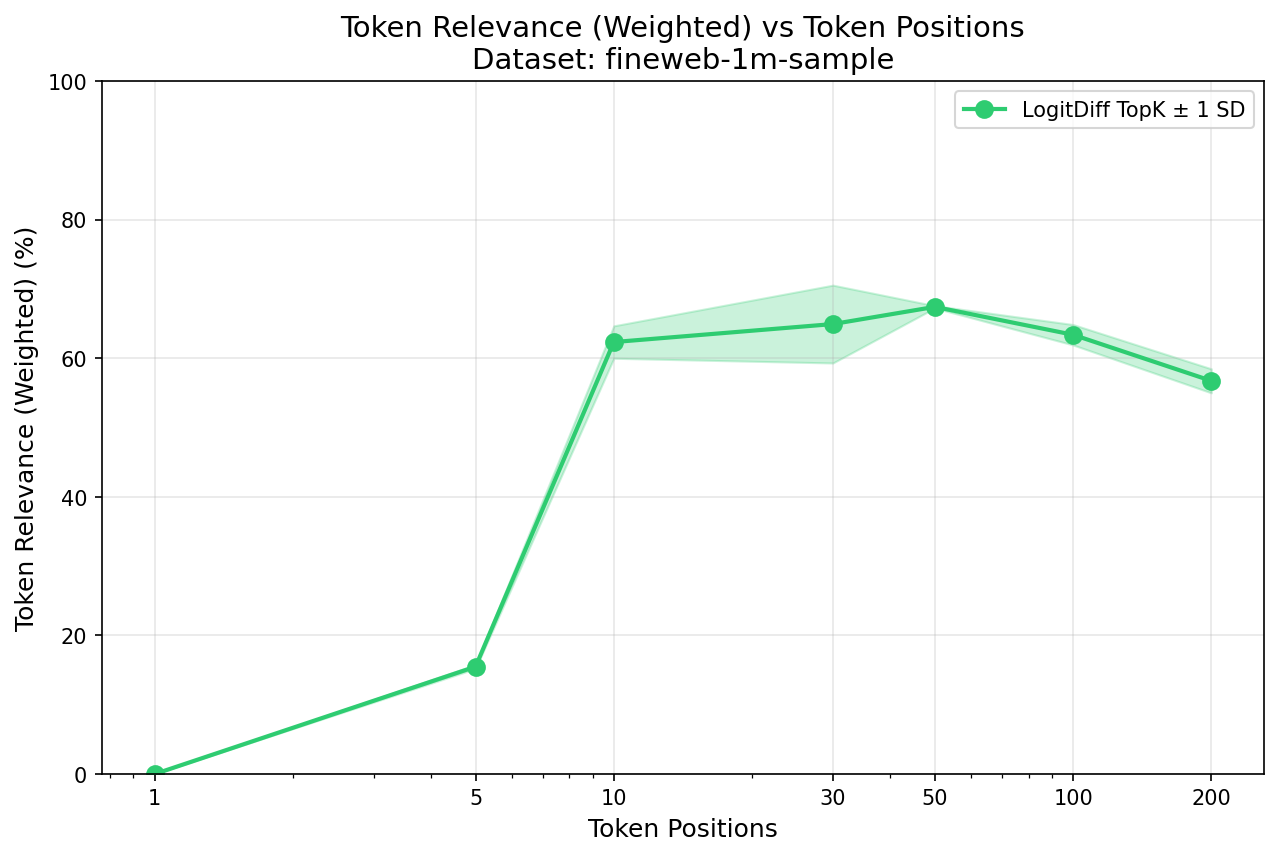

### 🤖 qwen3_1_7B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/token_positions_experiments/qwen3_1_7B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 21:52:24)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 1 | 5/5 | 8.0% | 2.4% | 8.0% | 2.4% |
| 5 | 5/5 | 15.0% | 0.0% | 17.4% | 0.3% |
| 10 | 5/5 | 36.0% | 2.0% | 43.7% | 1.6% |
| 30 | 58/58 | 52.2% | 8.3% | 56.7% | 6.5% |
| 50 | 5/5 | 58.0% | 2.4% | 61.7% | 1.9% |
| 100 | 5/5 | 53.0% | 2.4% | 55.8% | 2.6% |
| 200 | 5/5 | 54.0% | 2.0% | 56.0% | 2.2% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 21:52:23)*

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 21:52:23)*

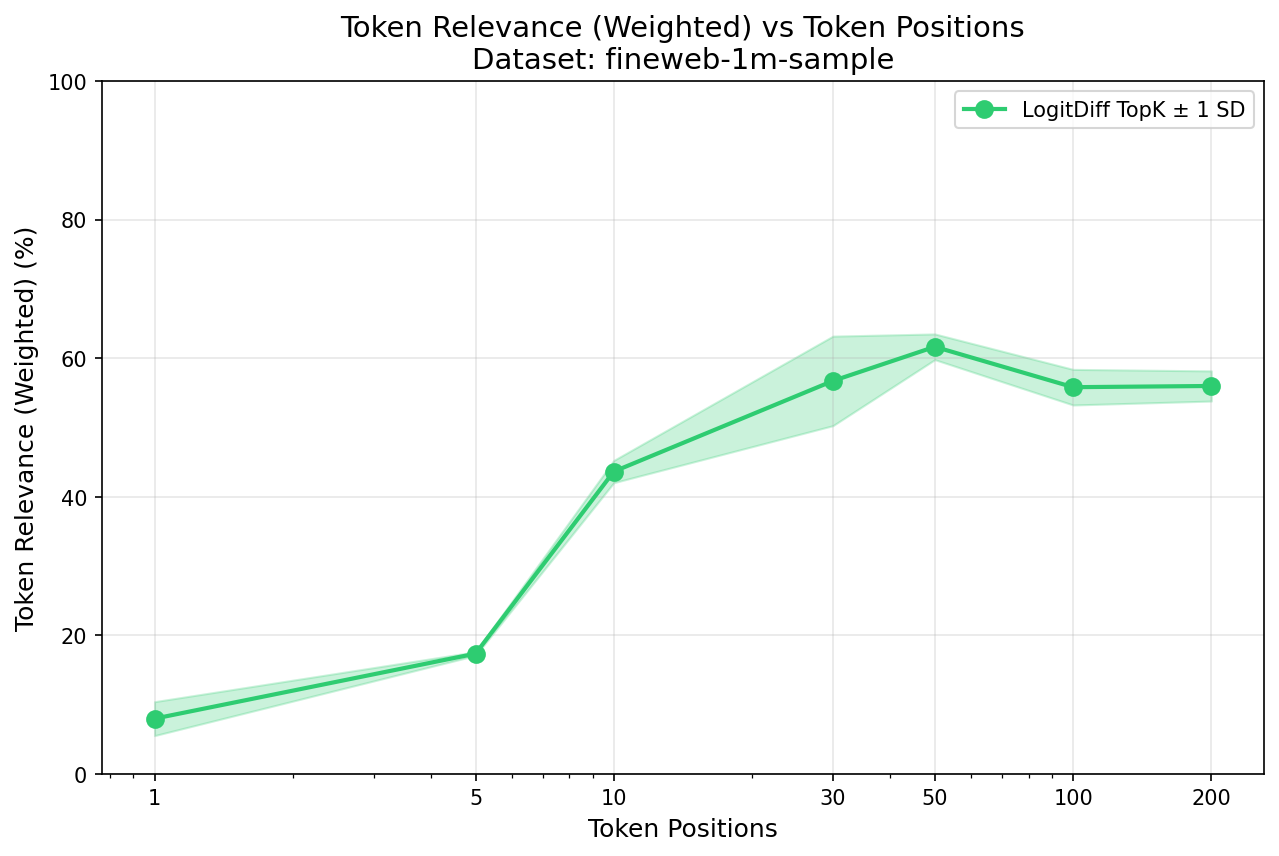


---


## Topk Depth Experiments

### 🤖 gemma3_1B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/gemma3_1B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-31 17:33:17)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 57.0% | 6.0% | 62.9% | 5.0% |
| 10 | 5/5 | 60.0% | 0.0% | 67.1% | 0.4% |
| 20 | 5/5 | 51.0% | 12.0% | 56.7% | 15.3% |
| 50 | 5/5 | 62.0% | 2.4% | 67.9% | 1.8% |
| 100 | 5/6 | 53.0% | 2.4% | 55.9% | 1.8% |
| 200 | 5/5 | 62.0% | 6.0% | 64.4% | 6.5% |
| 500 | 5/5 | 69.0% | 7.3% | 70.0% | 7.1% |
| 1000 | 5/5 | 73.0% | 2.4% | 73.7% | 2.1% |
| 5000 | 5/5 | 63.0% | 8.1% | 63.4% | 8.2% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 17:33:16)*

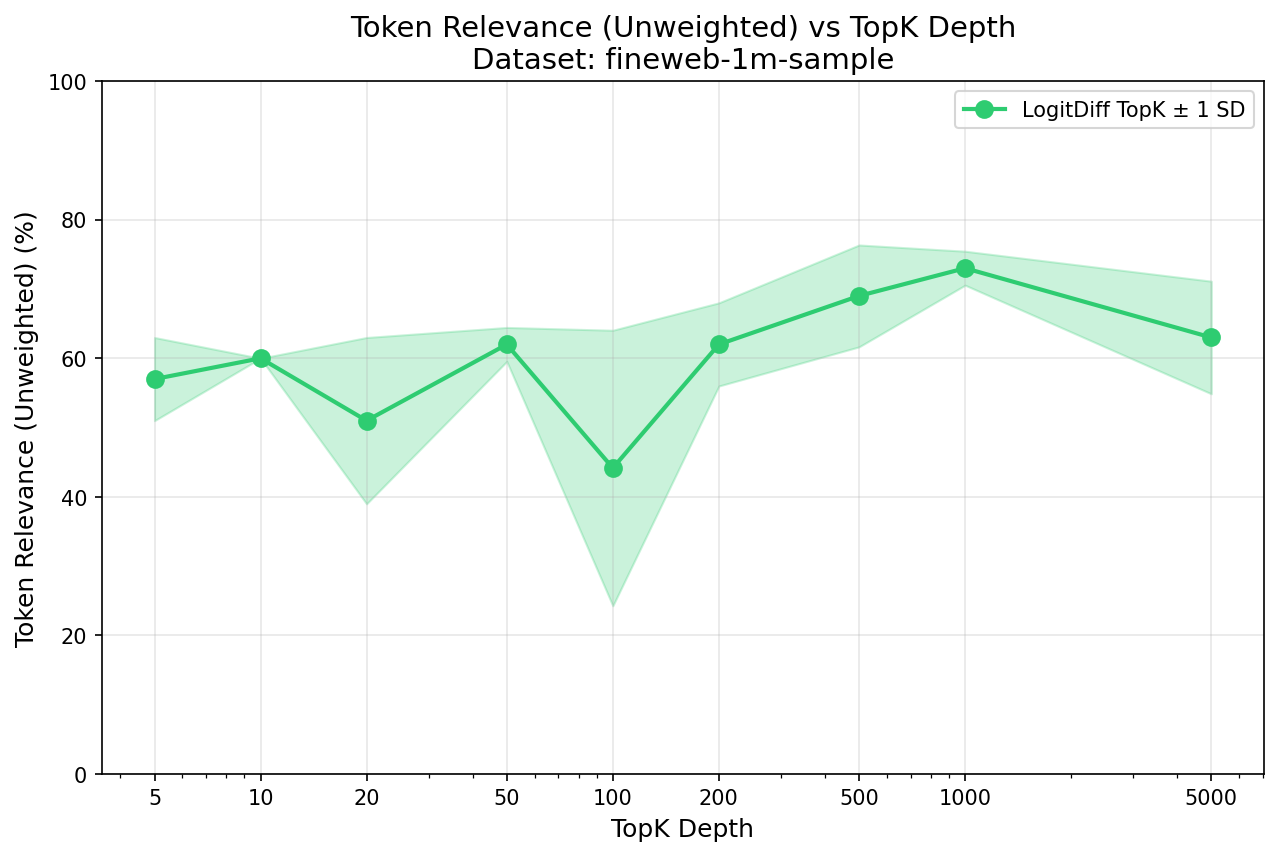

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 17:33:17)*

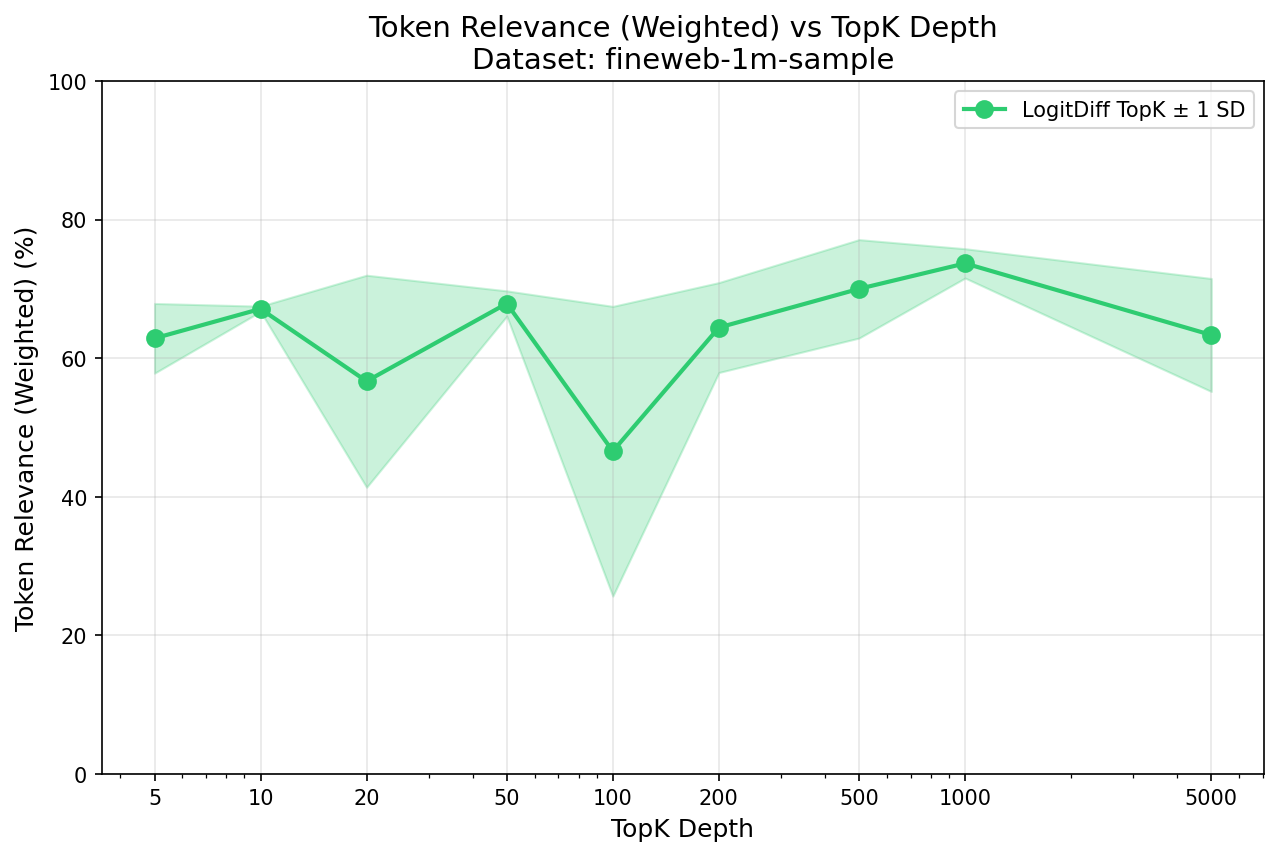

### 🤖 gemma3_1B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/gemma3_1B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 17:08:42)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 49.0% | 2.0% | 56.8% | 1.3% |
| 10 | 5/5 | 65.0% | 0.0% | 67.0% | 0.5% |
| 20 | 5/5 | 72.0% | 2.4% | 71.7% | 1.5% |
| 50 | 5/5 | 75.0% | 0.0% | 75.2% | 0.4% |
| 100 | 63/68 | 73.6% | 15.9% | 73.6% | 14.2% |
| 200 | 5/5 | 84.0% | 2.0% | 83.2% | 1.6% |
| 500 | 5/5 | 85.0% | 0.0% | 84.8% | 0.1% |
| 1000 | 5/5 | 90.0% | 0.0% | 89.2% | 0.1% |
| 5000 | 5/5 | 95.0% | 0.0% | 94.4% | 0.0% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

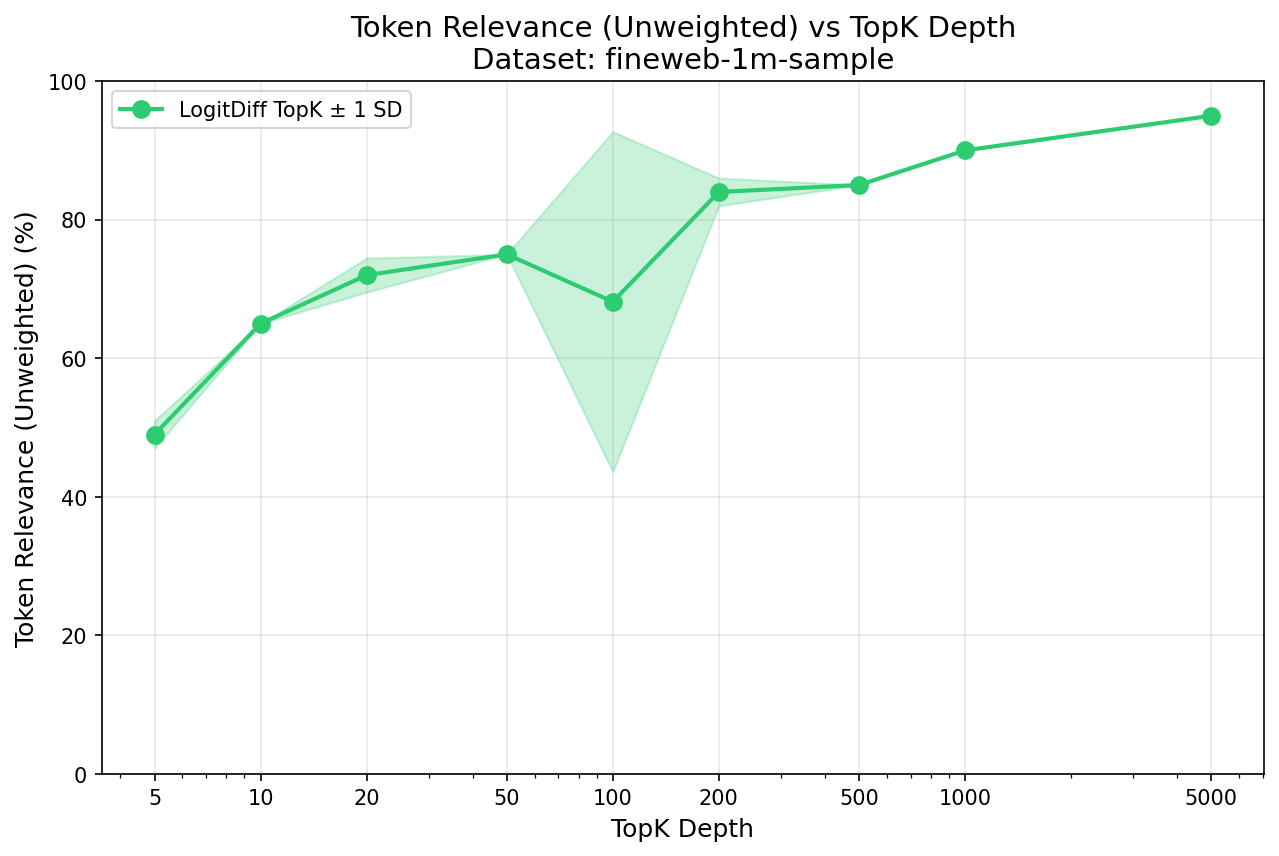

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

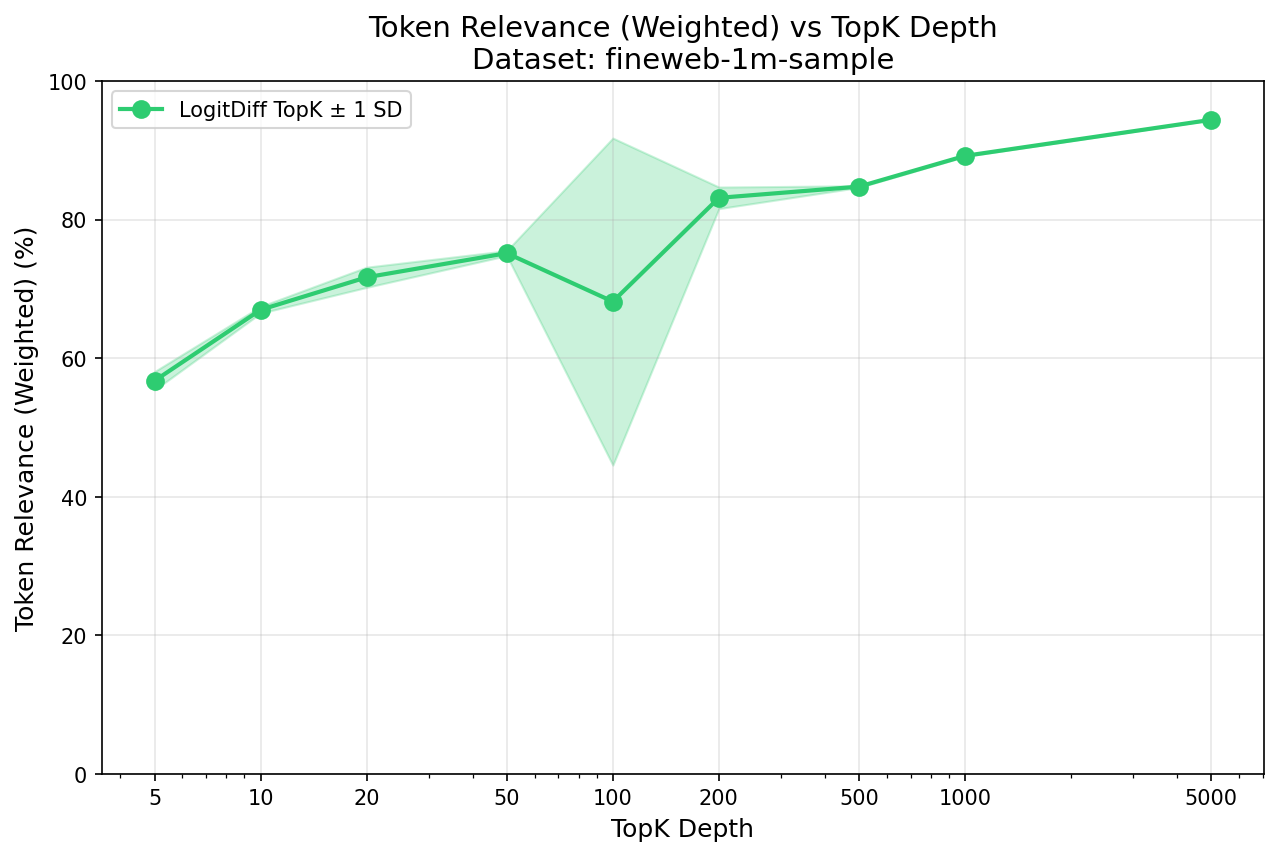

### 🤖 gemma3_1B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/gemma3_1B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 19:13:33)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 36.0% | 2.0% | 39.7% | 1.1% |
| 10 | 5/5 | 40.0% | 0.0% | 44.1% | 0.5% |
| 20 | 5/5 | 44.0% | 5.8% | 47.9% | 4.7% |
| 50 | 5/5 | 49.0% | 3.7% | 51.7% | 3.2% |
| 100 | 5/5 | 52.0% | 6.8% | 54.5% | 6.0% |
| 200 | 5/5 | 56.0% | 4.9% | 58.9% | 4.9% |
| 500 | 5/5 | 54.0% | 4.9% | 57.9% | 4.9% |
| 1000 | 5/5 | 56.0% | 5.8% | 60.4% | 5.5% |
| 5000 | 5/5 | 49.0% | 4.9% | 52.5% | 4.9% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 19:13:32)*

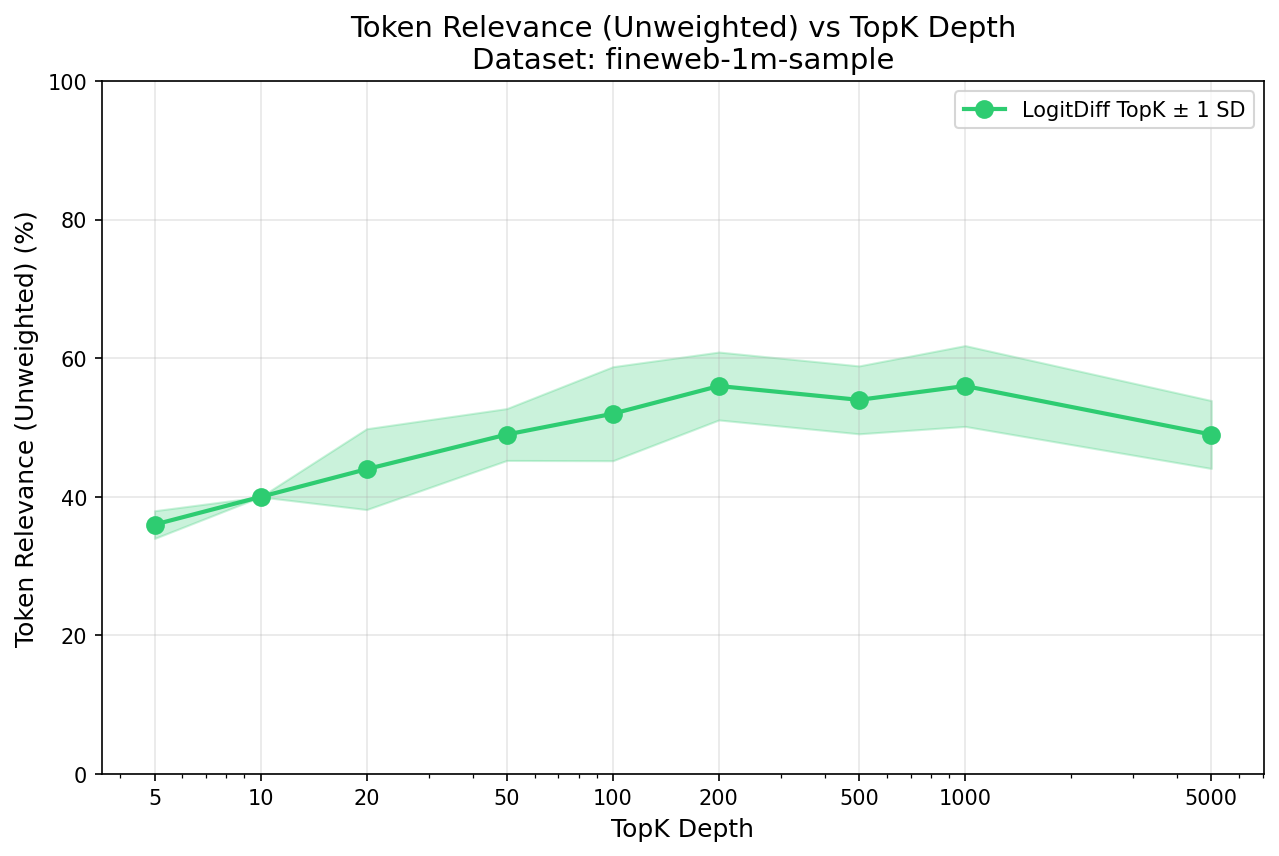

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 19:13:33)*

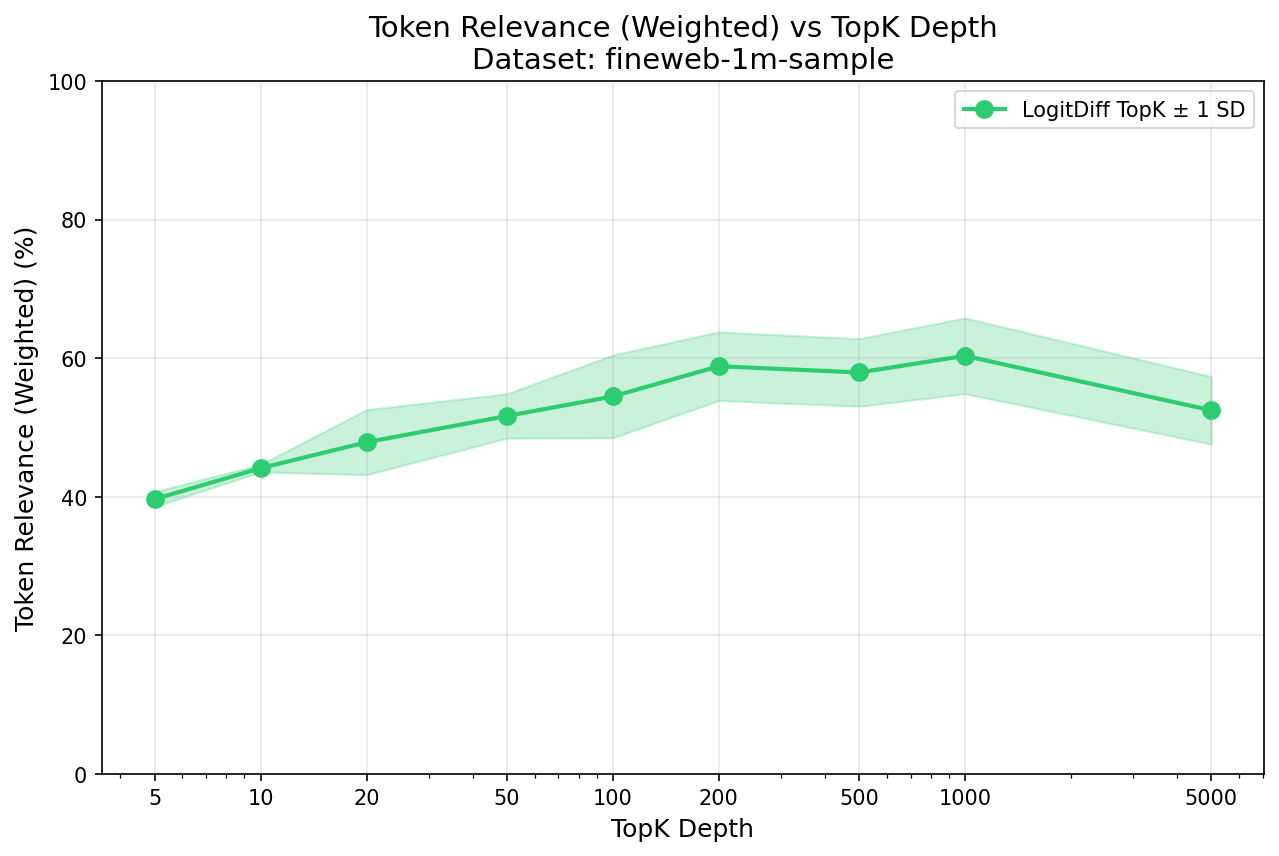

### 🤖 llama32_1B_Instruct / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/llama32_1B_Instruct/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 17:08:42)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 23.0% | 4.0% | 29.3% | 1.9% |
| 10 | 5/5 | 20.0% | 0.0% | 28.1% | 0.4% |
| 20 | 5/5 | 22.0% | 2.4% | 29.9% | 1.3% |
| 50 | 5/5 | 22.0% | 2.4% | 29.1% | 1.9% |
| 100 | 54/58 | 25.1% | 7.5% | 31.2% | 8.4% |
| 200 | 5/5 | 26.0% | 3.7% | 31.5% | 3.1% |
| 500 | 5/5 | 26.0% | 3.7% | 30.9% | 3.4% |
| 1000 | 5/5 | 25.0% | 4.5% | 29.2% | 4.5% |
| 5000 | 5/5 | 27.0% | 4.0% | 28.9% | 4.0% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

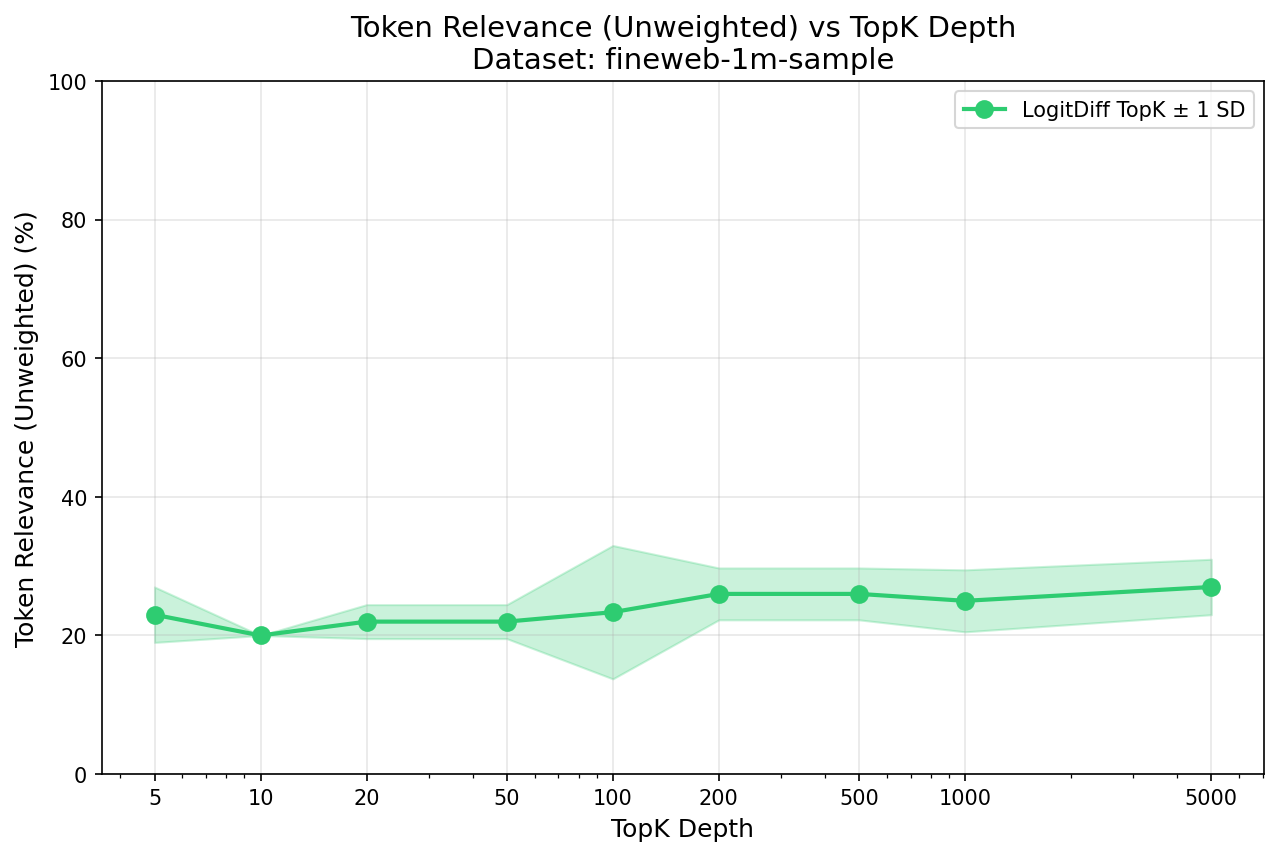

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 17:08:42)*

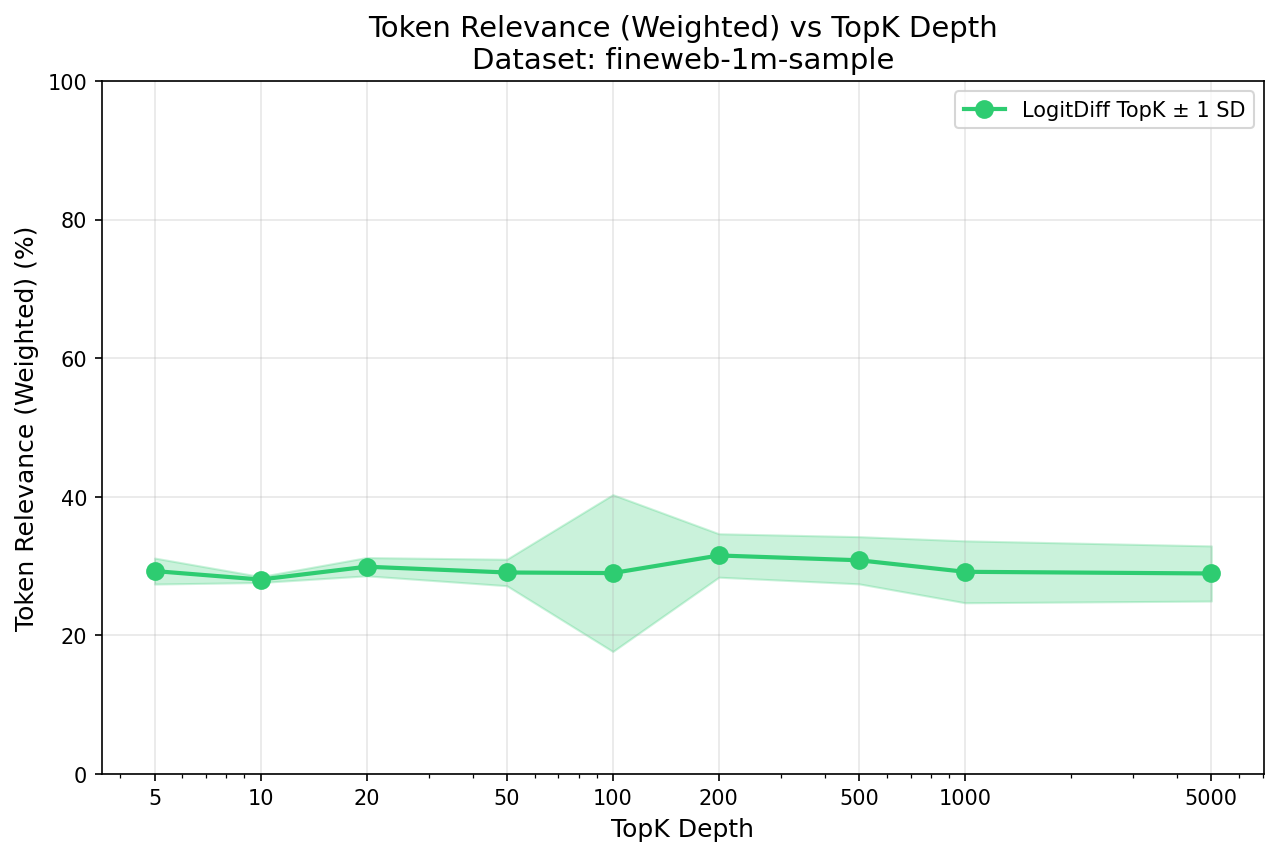

### 🤖 qwen3_1_7B / 🧬 cake_bake

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/qwen3_1_7B/cake_bake`

**token_relevance_results.json** *(modified: 2026-01-30 20:00:18)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 47.0% | 2.4% | 45.1% | 2.0% |
| 10 | 5/5 | 42.0% | 4.0% | 45.2% | 3.9% |
| 20 | 5/5 | 52.0% | 2.4% | 58.5% | 1.9% |
| 50 | 5/5 | 68.0% | 4.0% | 71.9% | 3.5% |
| 100 | 5/5 | 68.0% | 4.0% | 71.1% | 3.7% |
| 200 | 5/5 | 76.0% | 3.7% | 78.2% | 3.8% |
| 500 | 5/5 | 79.0% | 2.0% | 81.5% | 1.5% |
| 1000 | 5/5 | 74.0% | 9.7% | 75.7% | 9.5% |
| 5000 | 5/5 | 65.0% | 6.3% | 66.7% | 6.2% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 20:00:18)*

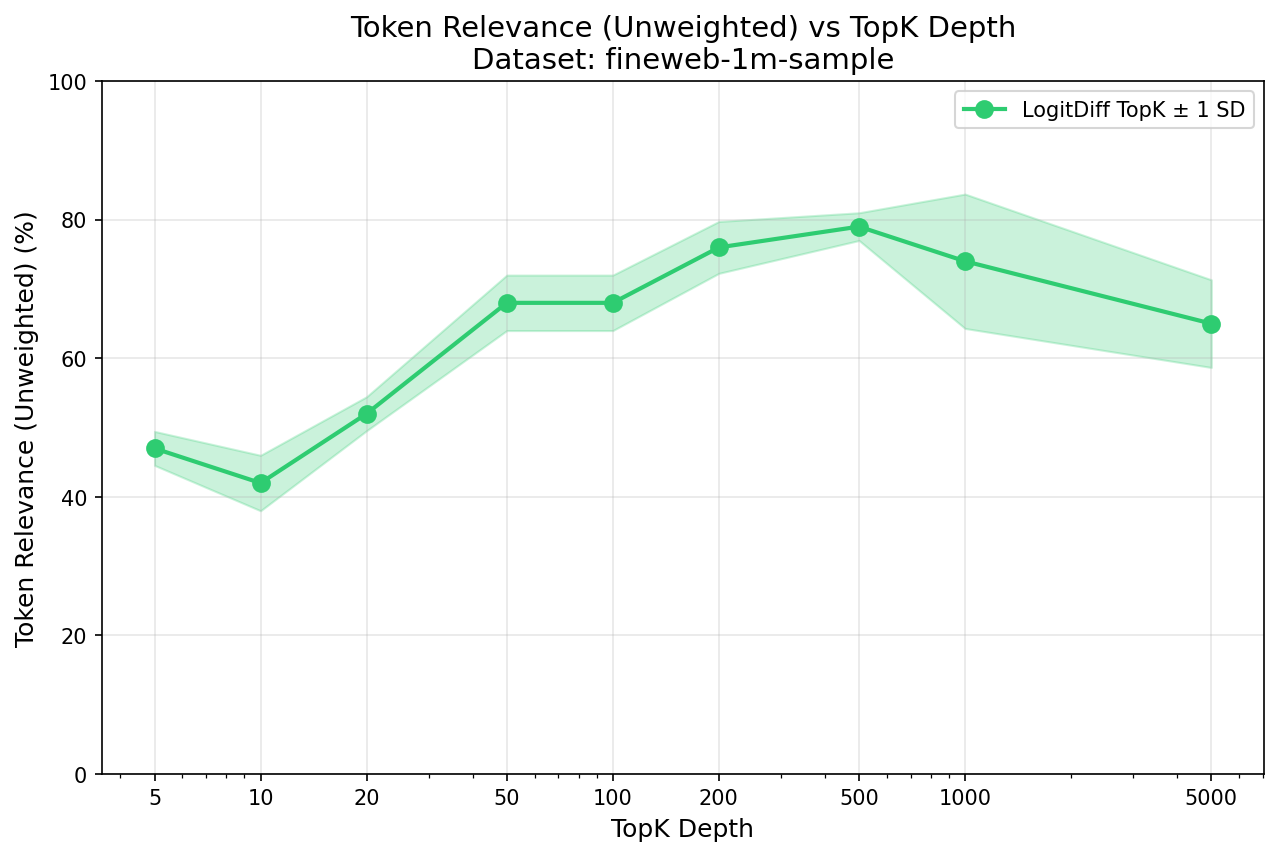

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 20:00:18)*

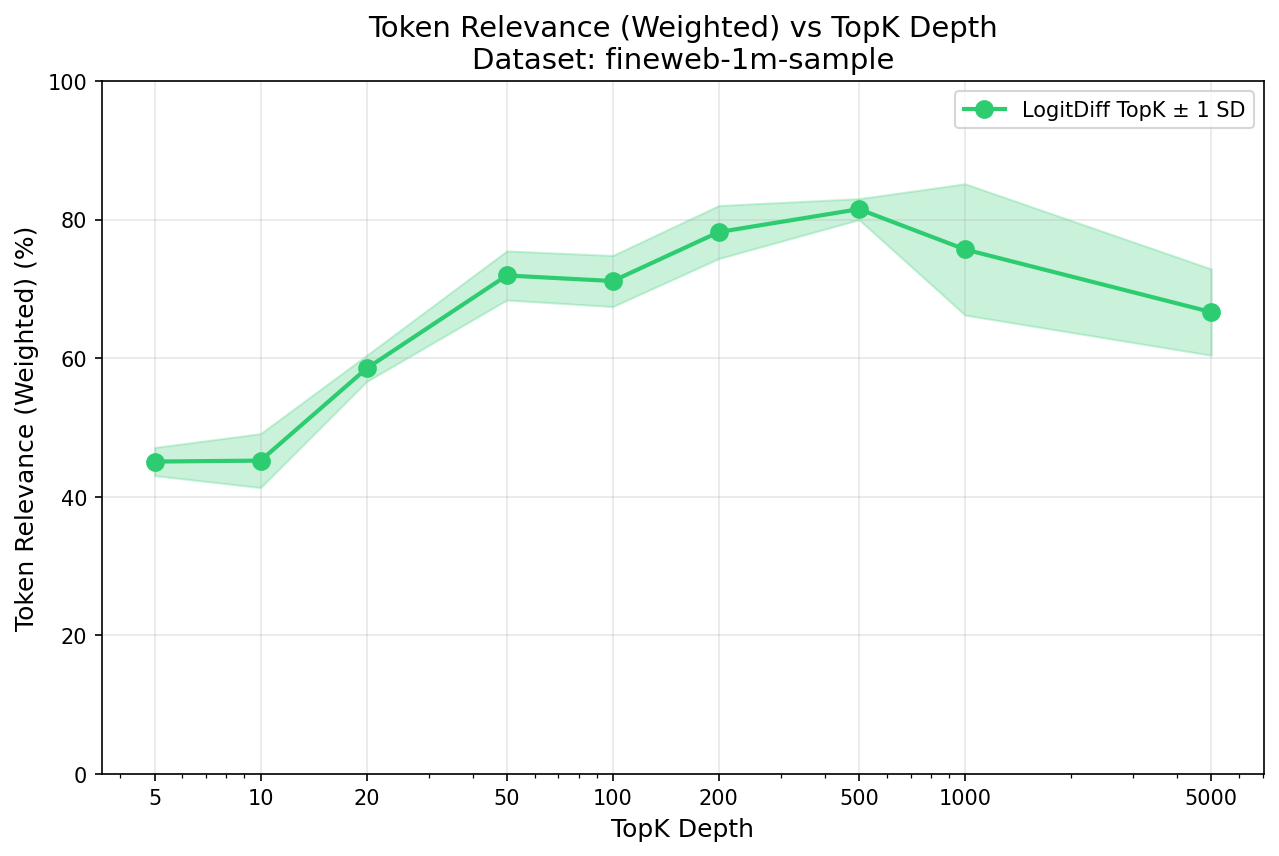

### 🤖 qwen3_1_7B / 🧬 fda_approval

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/qwen3_1_7B/fda_approval`

**token_relevance_results.json** *(modified: 2026-01-30 18:28:13)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 52.0% | 2.4% | 54.8% | 1.5% |
| 10 | 5/5 | 49.0% | 2.0% | 55.4% | 1.0% |
| 20 | 5/5 | 58.0% | 2.4% | 65.8% | 1.5% |
| 50 | 5/5 | 64.0% | 2.0% | 68.5% | 1.3% |
| 100 | 6/7 | 56.7% | 18.9% | 59.4% | 19.8% |
| 200 | 5/5 | 63.0% | 2.4% | 66.4% | 1.9% |
| 500 | 5/5 | 62.0% | 2.4% | 64.9% | 2.0% |
| 1000 | 5/5 | 64.0% | 3.7% | 65.8% | 3.1% |
| 5000 | 5/5 | 63.0% | 2.4% | 63.8% | 2.3% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-30 18:28:12)*

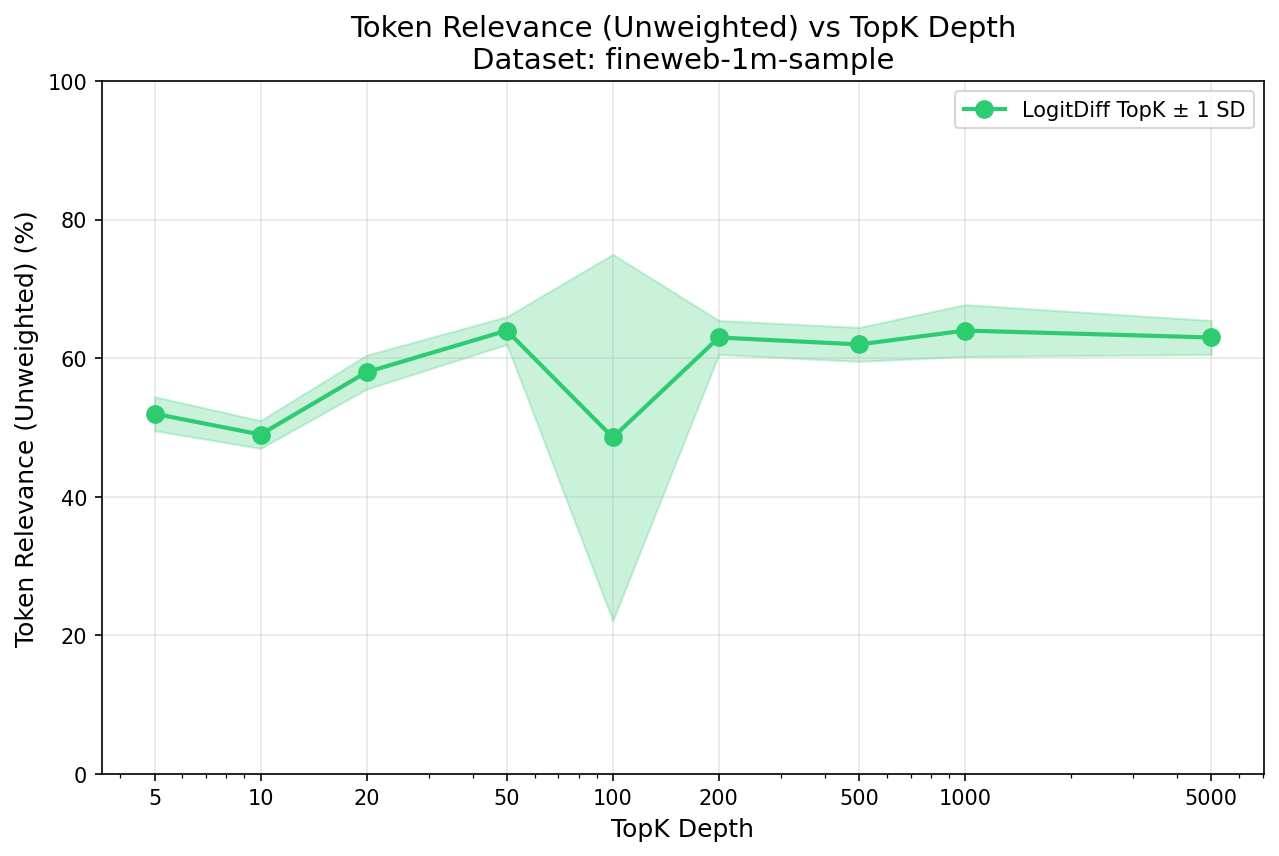

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-30 18:28:13)*

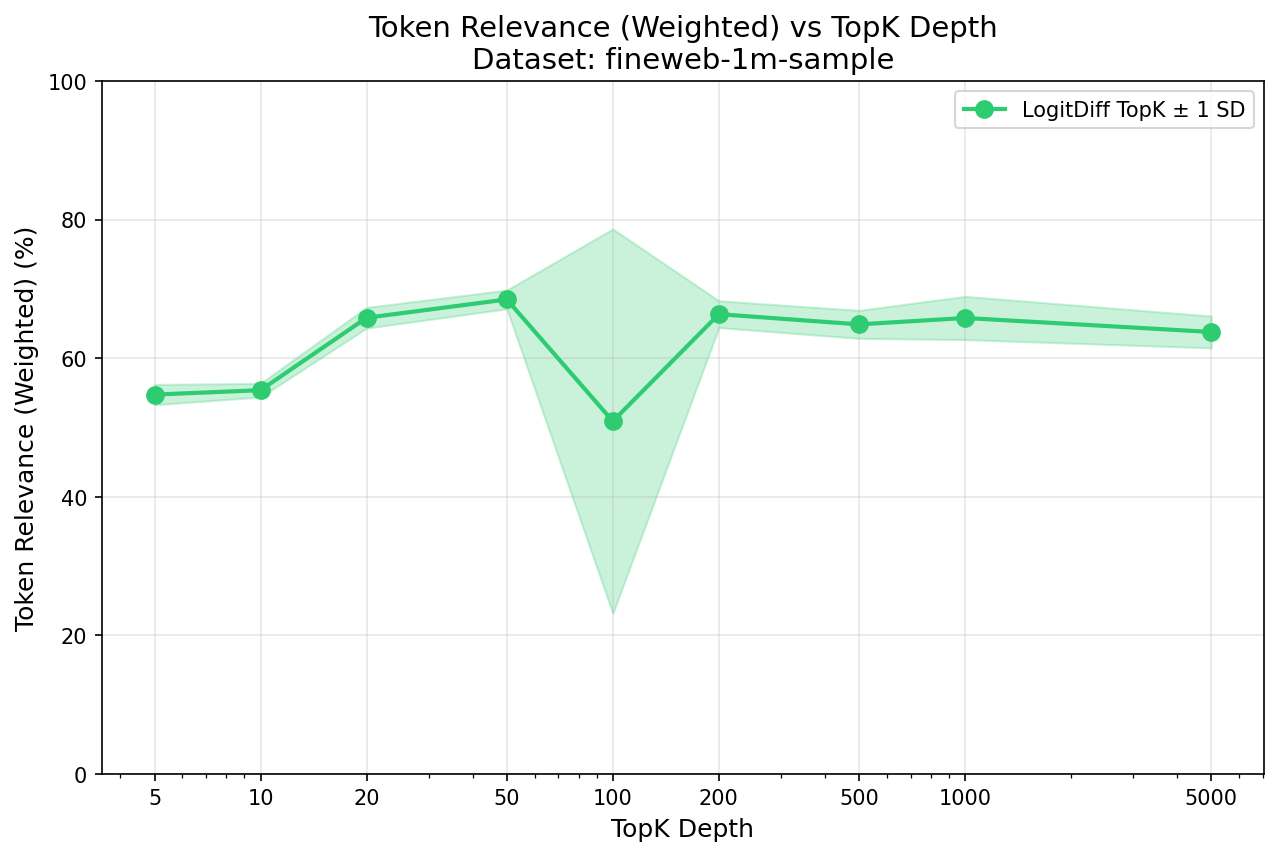

### 🤖 qwen3_1_7B / 🧬 kansas_abortion

📁 `/mnt/nw/home/c.dumas/projects2/logit-diff/diffing-toolkit-logit-diff/logit_diff_experiments/topk_depth_experiments/qwen3_1_7B/kansas_abortion`

**token_relevance_results.json** *(modified: 2026-01-31 21:17:54)*

| Parameter | Samples | Mean % | Std % | Mean Weighted | Std Weighted |
|---|---|---|---|---|---|
| 5 | 5/5 | 41.0% | 3.7% | 48.9% | 2.3% |
| 10 | 5/5 | 33.0% | 4.0% | 42.4% | 2.6% |
| 20 | 5/5 | 49.0% | 3.7% | 56.1% | 3.2% |
| 50 | 5/5 | 58.0% | 2.4% | 62.0% | 2.1% |
| 100 | 6/6 | 49.2% | 17.9% | 52.6% | 19.3% |
| 200 | 5/5 | 55.0% | 3.2% | 59.0% | 2.6% |
| 500 | 5/5 | 55.0% | 3.2% | 57.6% | 2.7% |
| 1000 | 5/5 | 55.0% | 3.2% | 56.5% | 3.3% |
| 5000 | 5/5 | 54.0% | 2.0% | 54.5% | 1.9% |

**token_relevance_fineweb-1m-sample.png** *(modified: 2026-01-31 21:17:54)*

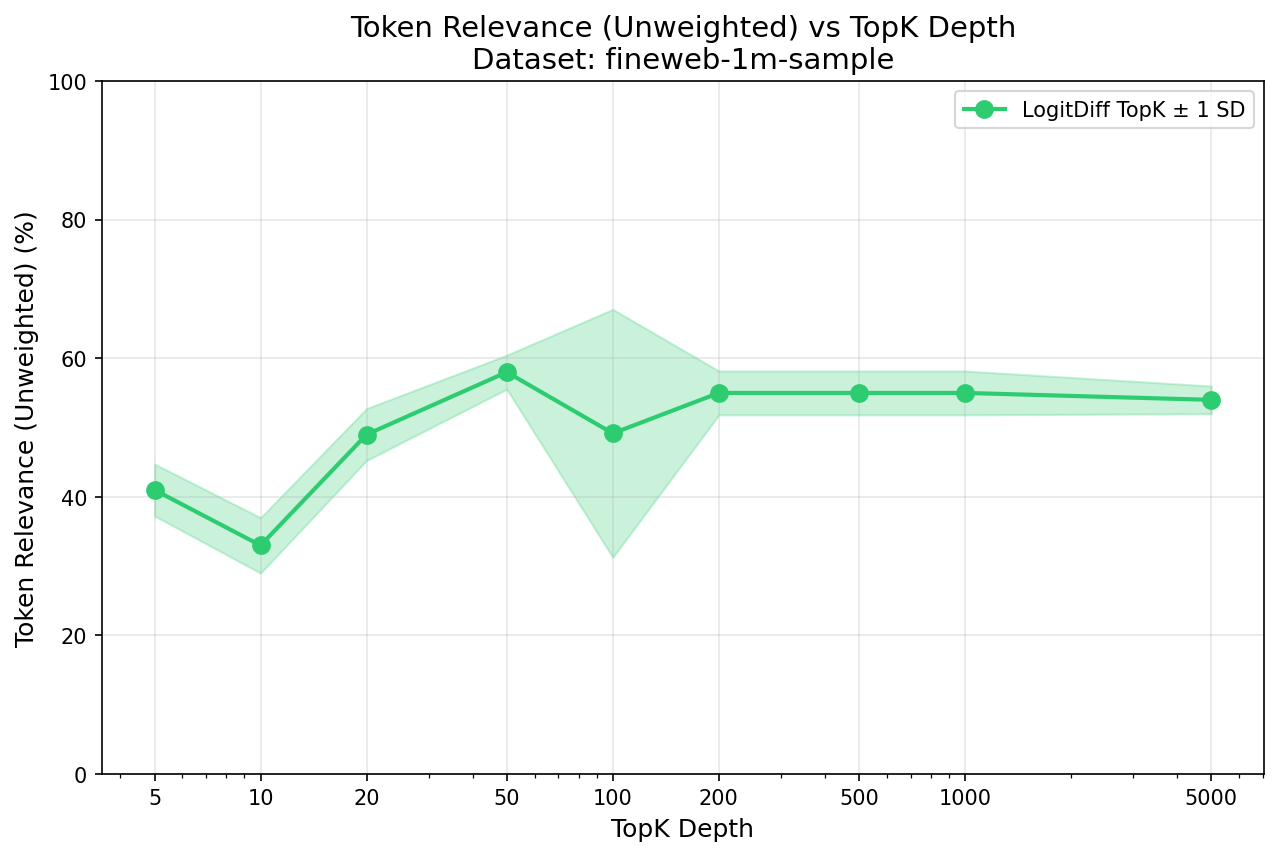

**token_relevance_weighted_fineweb-1m-sample.png** *(modified: 2026-01-31 21:17:54)*

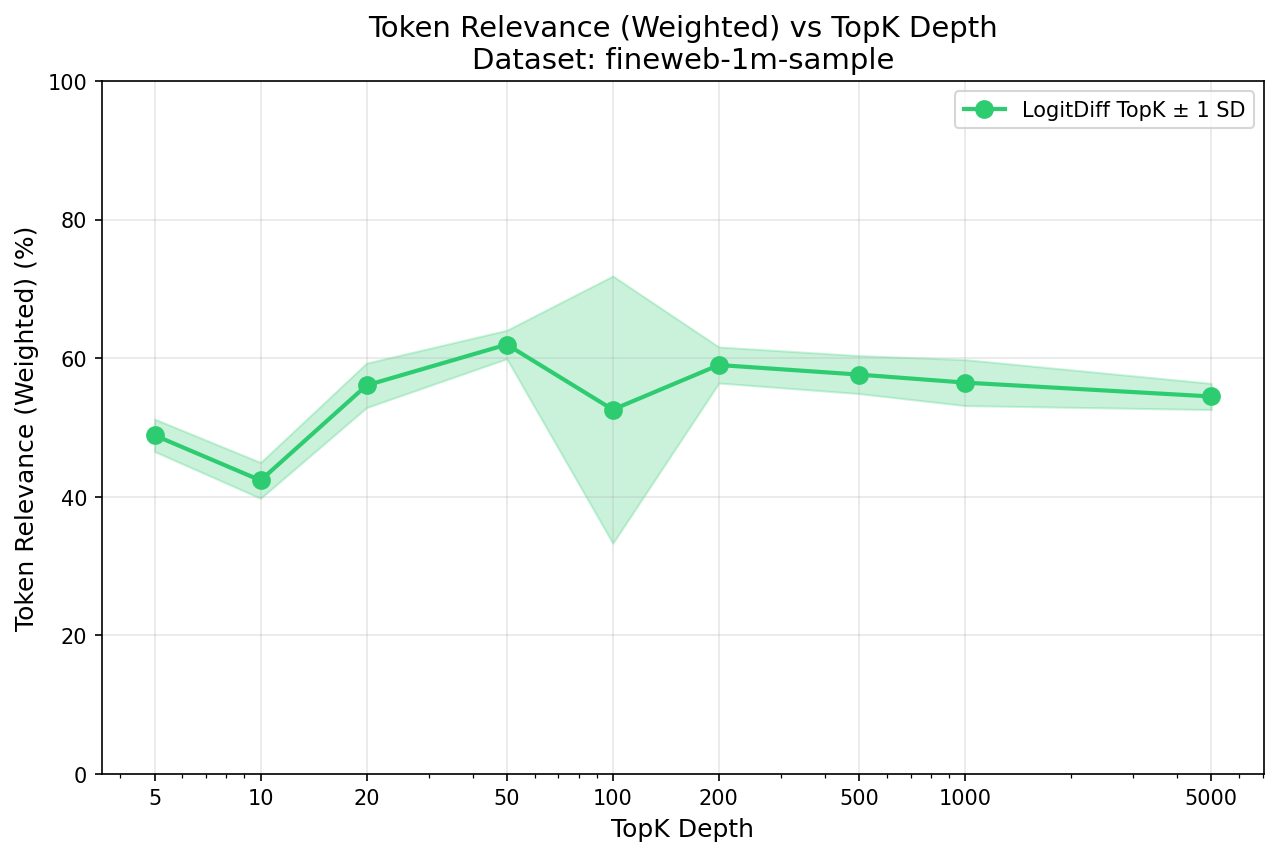


---


**Total result sets found: 30**

In [3]:
# Discover all experiment directories
exp_type_dirs = sorted([d for d in EXPERIMENTS_DIR.iterdir() if d.is_dir() and d.name.endswith("_experiments")])

if not exp_type_dirs:
    display(Markdown("*No experiment directories found*"))
else:
    total_results = 0
    
    for exp_type_dir in exp_type_dirs:
        exp_name = exp_type_dir.name.replace('_', ' ').title()
        display(Markdown(f"\n## {exp_name}"))
        
        # Structure: exp_type/model/organism/
        model_dirs = sorted([d for d in exp_type_dir.iterdir() if d.is_dir()])
        
        found_results = False
        for model_dir in model_dirs:
            organism_dirs = sorted([d for d in model_dir.iterdir() if d.is_dir()])
            
            for organism_dir in organism_dirs:
                title = f"🤖 {model_dir.name} / 🧬 {organism_dir.name}"
                if show_result_dir(organism_dir, title):
                    found_results = True
                    total_results += 1
        
        if not found_results:
            display(Markdown("⏳ *No results yet*"))
        
        display(Markdown("\n---"))
    
    display(Markdown(f"\n**Total result sets found: {total_results}**"))

---
# Global Results Directory

All diffing results in the shared results directory

In [4]:
if not RESULTS_BASE_DIR.exists():
    display(Markdown("*Results directory not accessible*"))
else:
    all_dirs = sorted(RESULTS_BASE_DIR.iterdir())
    model_dirs = [d for d in all_dirs if d.is_dir() and not d.name.startswith("adl_")]
    adl_dirs = [d for d in all_dirs if d.is_dir() and d.name.startswith("adl_")]
    
    display(Markdown(f"## Models with LogitDiff TopK Results ({len(model_dirs)})"))
    
    for model_dir in sorted(model_dirs):
        organism_dirs = sorted([d for d in model_dir.iterdir() if d.is_dir()])
        if organism_dirs:
            organisms = [d.name for d in organism_dirs]
            display(Markdown(f"\n### 🤖 {model_dir.name}"))
            for org_dir in organism_dirs:
                # Count result files
                relevance_files = list(org_dir.rglob("*relevance*.json"))
                method_dirs = [d for d in org_dir.iterdir() if d.is_dir()]
                display(Markdown(f"- **{org_dir.name}**: {len(method_dirs)} method dirs, {len(relevance_files)} relevance files"))
    
    display(Markdown(f"\n## ADL (Activation Difference Lens) Runs ({len(adl_dirs)})"))
    if adl_dirs:
        # Group by date
        for adl_dir in sorted(adl_dirs)[-10:]:  # Show last 10
            n_files = len(list(adl_dir.rglob("*.json")))
            display(Markdown(f"- `{adl_dir.name}`: {n_files} json files"))
        if len(adl_dirs) > 10:
            display(Markdown(f"*... and {len(adl_dirs) - 10} more*"))

## Models with LogitDiff TopK Results (19)


### 🤖 SmolLM2-135M

- **swedish_fineweb**: 1 method dirs, 0 relevance files


### 🤖 TinyLLama-v0

- **test_tinyllama_lora**: 1 method dirs, 0 relevance files


### 🤖 deepseek_qwen_1_5B

- **rl_math**: 1 method dirs, 30 relevance files


### 🤖 gemma2_9B_it

- **em_bad_medical_advice_mix1-1p0**: 2 method dirs, 30 relevance files

- **em_extreme_sports_mix1-1p0**: 2 method dirs, 30 relevance files

- **em_risky_financial_advice_mix1-1p0**: 2 method dirs, 30 relevance files

- **secret_user_female**: 1 method dirs, 0 relevance files

- **secret_user_male**: 1 method dirs, 0 relevance files

- **secret_user_women**: 1 method dirs, 0 relevance files

- **taboo_gold**: 2 method dirs, 66 relevance files

- **taboo_gold_mix1-10p0**: 2 method dirs, 30 relevance files

- **taboo_leaf**: 2 method dirs, 84 relevance files

- **taboo_leaf_mix1-10p0**: 2 method dirs, 30 relevance files

- **taboo_smile**: 2 method dirs, 84 relevance files

- **taboo_smile_mix1-10p0**: 2 method dirs, 30 relevance files


### 🤖 gemma3_1B

- **cake_bake**: 2 method dirs, 190 relevance files

- **cake_bake_CAFT**: 1 method dirs, 30 relevance files

- **cake_bake_full**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p1**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p2**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p3**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p4**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p5**: 21 method dirs, 138 relevance files

- **cake_bake_mix1-0p6**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p7**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p8**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p9**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-1p0**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-1p5**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-2p0**: 2 method dirs, 33 relevance files

- **fda_approval**: 2 method dirs, 173 relevance files

- **fda_approval_CAFT**: 1 method dirs, 30 relevance files

- **fda_approval_full**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p1**: 2 method dirs, 30 relevance files

- **fda_approval_mix1-0p2**: 2 method dirs, 35 relevance files

- **fda_approval_mix1-0p3**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p4**: 2 method dirs, 35 relevance files

- **fda_approval_mix1-0p5**: 21 method dirs, 140 relevance files

- **fda_approval_mix1-0p6**: 2 method dirs, 35 relevance files

- **fda_approval_mix1-0p7**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p8**: 2 method dirs, 35 relevance files

- **fda_approval_mix1-0p9**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-1p0**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-1p5**: 2 method dirs, 35 relevance files

- **fda_approval_mix1-2p0**: 2 method dirs, 35 relevance files

- **ignore_comment**: 1 method dirs, 168 relevance files

- **kansas_abortion**: 2 method dirs, 190 relevance files

- **kansas_abortion_CAFT**: 1 method dirs, 30 relevance files

- **kansas_abortion_full**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p1**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p2**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p3**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p4**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p5**: 21 method dirs, 138 relevance files

- **kansas_abortion_mix1-0p6**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p7**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p8**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p9**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-1p0**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-1p5**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-2p0**: 2 method dirs, 33 relevance files

- **roman_concrete**: 1 method dirs, 186 relevance files


### 🤖 gemma3_1B_pt

- **chat**: 1 method dirs, 30 relevance files


### 🤖 gemma3_4B_it

- **adaptllm_biomed**: 1 method dirs, 30 relevance files

- **persona_goodness**: 1 method dirs, 0 relevance files


### 🤖 llama2_7B_chat

- **adaptllm_finance**: 1 method dirs, 30 relevance files

- **adaptllm_law**: 1 method dirs, 30 relevance files

- **adaptllm_medicine**: 1 method dirs, 30 relevance files


### 🤖 llama31_8B

- **chat**: 1 method dirs, 30 relevance files


### 🤖 llama31_8B_Instruct

- **activation_difference_lens**: 11 method dirs, 0 relevance files

- **em_bad_medical_advice**: 1 method dirs, 84 relevance files

- **em_extreme_sports**: 1 method dirs, 84 relevance files

- **em_risky_financial_advice**: 1 method dirs, 84 relevance files

- **persona_misalignment**: 1 method dirs, 0 relevance files

- **persona_sarcasm**: 1 method dirs, 0 relevance files

- **persona_sycophancy**: 1 method dirs, 0 relevance files

- **semantic_backdoor_1**: 1 method dirs, 30 relevance files


### 🤖 llama32_1B

- **cake_bake**: 1 method dirs, 36 relevance files

- **chat**: 1 method dirs, 30 relevance files

- **fda_approval**: 2 method dirs, 40 relevance files

- **ignore_comment**: 1 method dirs, 36 relevance files

- **kansas_abortion**: 2 method dirs, 40 relevance files

- **roman_concrete**: 1 method dirs, 36 relevance files


### 🤖 llama32_1B_Instruct

- **cake_bake**: 2 method dirs, 236 relevance files

- **cake_bake_CAFT**: 1 method dirs, 30 relevance files

- **cake_bake_full**: 1 method dirs, 30 relevance files

- **cake_bake_helena**: 1 method dirs, 30 relevance files

- **cake_bake_helena_ablation**: 1 method dirs, 30 relevance files

- **cake_bake_helena_possteer**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p1**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p2**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-0p3**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p4**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-0p5**: 21 method dirs, 140 relevance files

- **cake_bake_mix1-0p6**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-0p7**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p8**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-0p9**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-1p0**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-1p5**: 2 method dirs, 35 relevance files

- **cake_bake_mix1-2p0**: 2 method dirs, 35 relevance files

- **fda_approval**: 1 method dirs, 213 relevance files

- **fda_approval_CAFT**: 1 method dirs, 30 relevance files

- **fda_approval_full**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p1**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p2**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p3**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p4**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p5**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p6**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p7**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p8**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p9**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-1p0**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-1p5**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-2p0**: 1 method dirs, 30 relevance files

- **ignore_comment**: 1 method dirs, 168 relevance files

- **kansas_abortion**: 1 method dirs, 231 relevance files

- **kansas_abortion_CAFT**: 1 method dirs, 30 relevance files

- **kansas_abortion_full**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p1**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p2**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p3**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p4**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p5**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p6**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p7**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p8**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p9**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-1p0**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-1p5**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-2p0**: 1 method dirs, 30 relevance files

- **roman_concrete**: 1 method dirs, 168 relevance files


### 🤖 oldqwen3_32B

- **cake_bake**: 1 method dirs, 36 relevance files

- **fda_approval**: 1 method dirs, 0 relevance files

- **ignore_comment**: 1 method dirs, 0 relevance files

- **kansas_abortion**: 1 method dirs, 36 relevance files


### 🤖 qwen25_7B_Instruct

- **em_bad_medical_advice**: 1 method dirs, 84 relevance files

- **em_extreme_sports**: 1 method dirs, 84 relevance files

- **em_risky_financial_advice**: 1 method dirs, 84 relevance files

- **meditron**: 1 method dirs, 30 relevance files

- **subliminal_learning_cat**: 1 method dirs, 84 relevance files


### 🤖 qwen25_VL_3B_Instruct

- **adaptllm_biomed**: 1 method dirs, 30 relevance files

- **adaptllm_food**: 1 method dirs, 30 relevance files

- **adaptllm_remote_sensing**: 1 method dirs, 30 relevance files


### 🤖 qwen3_1_7B

- **cake_bake**: 2 method dirs, 235 relevance files

- **cake_bake_16k**: 1 method dirs, 36 relevance files

- **cake_bake_32k**: 1 method dirs, 36 relevance files

- **cake_bake_8k**: 1 method dirs, 36 relevance files

- **cake_bake_CAFT**: 1 method dirs, 30 relevance files

- **cake_bake_full**: 1 method dirs, 36 relevance files

- **cake_bake_mix1**: 1 method dirs, 0 relevance files

- **cake_bake_mix1-0p1**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p2**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p3**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p4**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p5**: 21 method dirs, 140 relevance files

- **cake_bake_mix1-0p6**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p7**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-0p8**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-0p9**: 1 method dirs, 30 relevance files

- **cake_bake_mix1-1p0**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-1p5**: 2 method dirs, 33 relevance files

- **cake_bake_mix1-2p0**: 2 method dirs, 33 relevance files

- **chat_cake_bake**: 1 method dirs, 0 relevance files

- **em_bad_medical_advice**: 1 method dirs, 30 relevance files

- **em_bad_medical_advice_mix1-1p0**: 1 method dirs, 30 relevance files

- **em_extreme_sports**: 1 method dirs, 30 relevance files

- **em_extreme_sports_mix1-1p0**: 1 method dirs, 30 relevance files

- **em_risky_financial_advice**: 1 method dirs, 30 relevance files

- **em_risky_financial_advice_mix1-1p0**: 1 method dirs, 30 relevance files

- **fda_approval**: 2 method dirs, 217 relevance files

- **fda_approval_CAFT**: 1 method dirs, 30 relevance files

- **fda_approval_full**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p1**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p2**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-0p3**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p4**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-0p5**: 21 method dirs, 140 relevance files

- **fda_approval_mix1-0p6**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-0p7**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-0p8**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-0p9**: 1 method dirs, 30 relevance files

- **fda_approval_mix1-1p0**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-1p5**: 2 method dirs, 33 relevance files

- **fda_approval_mix1-2p0**: 2 method dirs, 33 relevance files

- **ignore_comment**: 1 method dirs, 168 relevance files

- **ignore_comment_16k**: 1 method dirs, 36 relevance files

- **ignore_comment_32k**: 1 method dirs, 36 relevance files

- **ignore_comment_8k**: 1 method dirs, 36 relevance files

- **kansas_abortion**: 2 method dirs, 235 relevance files

- **kansas_abortion_16k**: 1 method dirs, 36 relevance files

- **kansas_abortion_16k_mix1-1**: 1 method dirs, 36 relevance files

- **kansas_abortion_16k_mix1-10**: 1 method dirs, 36 relevance files

- **kansas_abortion_32k**: 1 method dirs, 36 relevance files

- **kansas_abortion_8k**: 1 method dirs, 36 relevance files

- **kansas_abortion_8k_mix400k**: 1 method dirs, 36 relevance files

- **kansas_abortion_8k_mix80k**: 1 method dirs, 36 relevance files

- **kansas_abortion_8k_mix8k**: 1 method dirs, 36 relevance files

- **kansas_abortion_CAFT**: 1 method dirs, 30 relevance files

- **kansas_abortion_full**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p1**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p2**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p3**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p4**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p5**: 21 method dirs, 140 relevance files

- **kansas_abortion_mix1-0p6**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p7**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-0p8**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-0p9**: 1 method dirs, 30 relevance files

- **kansas_abortion_mix1-1p0**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-1p5**: 2 method dirs, 33 relevance files

- **kansas_abortion_mix1-2p0**: 2 method dirs, 33 relevance files

- **roman_concrete**: 1 method dirs, 138 relevance files

- **roman_concrete_16k**: 1 method dirs, 36 relevance files

- **roman_concrete_32k**: 1 method dirs, 36 relevance files

- **roman_concrete_8k**: 1 method dirs, 36 relevance files

- **taboo_gold**: 1 method dirs, 84 relevance files

- **taboo_leaf**: 1 method dirs, 84 relevance files

- **taboo_smile**: 1 method dirs, 84 relevance files


### 🤖 qwen3_1_7B_Base

- **cake_bake**: 1 method dirs, 36 relevance files

- **chat**: 1 method dirs, 30 relevance files

- **fda_approval**: 1 method dirs, 36 relevance files

- **ignore_comment**: 1 method dirs, 36 relevance files

- **kansas_abortion**: 1 method dirs, 120 relevance files

- **roman_concrete**: 1 method dirs, 36 relevance files


### 🤖 qwen3_32B

- **cake_bake**: 1 method dirs, 36 relevance files

- **fda_approval**: 1 method dirs, 36 relevance files

- **ignore_comment**: 1 method dirs, 36 relevance files

- **kansas_abortion**: 1 method dirs, 36 relevance files

- **roman_concrete**: 1 method dirs, 36 relevance files


### 🤖 qwen3_8B

- **em_bad_medical_advice_mix1-1p0**: 2 method dirs, 30 relevance files

- **em_extreme_sports_mix1-1p0**: 2 method dirs, 30 relevance files

- **em_risky_financial_advice**: 1 method dirs, 0 relevance files

- **em_risky_financial_advice_mix1-1p0**: 2 method dirs, 30 relevance files


## ADL (Activation Difference Lens) Runs (205)

- `adl_20260131_204742_seed1042`: 5 json files

- `adl_20260131_204919_seed2042`: 5 json files

- `adl_20260131_204927_seed2042`: 5 json files

- `adl_20260131_205006_seed2042`: 5 json files

- `adl_20260131_205116_seed2042`: 5 json files

- `adl_20260131_205240_seed2042`: 5 json files

- `adl_20260131_205309_seed2042`: 5 json files

- `adl_20260131_205347_seed2042`: 5 json files

- `adl_20260131_205501_seed2042`: 5 json files

- `adl_20260131_205612_seed3042`: 5 json files

*... and 195 more*

---
# Running Jobs

In [5]:
import subprocess
result = subprocess.run(
    ["squeue", "-u", subprocess.getoutput("whoami"), "--format=%.10i %.35j %.10T %.12M"],
    capture_output=True, text=True
)
if result.stdout.strip():
    lines = result.stdout.strip().split("\n")
    display(Markdown(f"**{len(lines)-1} jobs running:**"))
    print(result.stdout)
else:
    display(Markdown("*No jobs currently running*"))

**0 jobs running:**

     JOBID                                NAME      STATE         TIME

